# **Project Name**    - Air BnB EDA



##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Project Summary -**

This EDA uses Python to perform an in-depth comparative analysis of Airbnb activity in Chicago and New Orleans, revealing important similarities, differences, and distinctive patterns to inform strategic host and stakeholder decision-making. Based on the Airbnb Listings Data, the research analyzes neighborhood popularity, property and room type distribution, price trends, geographic trends, and host attribute, review, and price correlations.

In Chicago, Cambridge was the most active neighborhood with close to 600 listings, followed by others with 400 or less. Price analysis indicated that whole homes/apartments in Gilchrist, West Loop, and East Liberty averaged over USD 1,000, while some private rooms such as Gateway District and Clearwater Beach hit extremely high averages above USD 40,000. Shared and hotel rooms typically had relatively lower averages, apart from particular luxury hotspots. Distribution analysis showed whole homes/apartments leading the way at 52% of offerings, with room type analysis confirming 75% of them were whole homes/apartments. Map views unveiled tight high-price clusters a bit west of the city center for whole homes/apartments and northeast for shared rooms. Box plots uncovered median prices reaching their highs in rooms in aparthotels (~USD 500) and falling to below USD 50 for shared rooms. Scatter plots demonstrated a trend consistently lower prices received more reviews, indicative of price-sensitive demand. Correlation heatmaps for regular hosts and superhosts indicated strong positive correlation between counts of listings and occupancy, whereas price was weakly negatively correlated with reviews.

In New Orleans, the Central Business District was the standout with almost 1,200 listings, significantly ahead of other districts. Luxury concentrations were found through pricing analysis in Kernar (USD 5,000 average for whole houses) and hotel rooms up to USD 50,000 in some locations. The majority of private rooms cost less than USD 600, and shared rooms were an exception. Whole houses/apartments comprised more than 85% of listings, asserting their hold in the domestic market. Geographic patterns indicated whole houses/apartments grouping in the southwest, while hotel rooms were grouped in the south with specific high-price locations. Median prices reached USD 1,000 for castles and fell below USD 50 for group rooms in hotels. As in Chicago, scatter plots reaffirmed that lower prices were associated with greater review numbers. Correlation analysis for normal and superhosts once more found high positive associations between host listing totals and fill rates, but minimum nights had weak negative correlations with review metrics.

The contrastive insights point to definite operational differences. Chicago displays a more varied distribution of moderately priced offerings with small clusters of very high-priced rooms, whereas New Orleans displays a higher concentration of listings in a single area and greater dominance of entire apartments/houses. Both cities illustrate how price sensitivity fuels guest behavior, and price optimisation is an essential tactic. Dominance of room type and property type implies potential for differentiation in overcrowded categories or unexplored niches. Geographic mapping identifies high-competition areas where competitive pricing or offerings that are distinctive may bring benefit. Correlation findings are data-driven recommendations for normal hosts and superhosts to optimize listing strategies, enhance occupancy, and modify minimum night policies.

Overall, the application of Python has made it possible to have a more richer, visually intensive comparison of Chicago and New Orleans, making it possible for stakeholders to spot market saturation points, pricing potential, and geographic patterns, eventually driving more informed and effective business choices.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


In the context of Airbnb operations, how can the utilisation of Tableau Desktop/Tableau Public/PowerBI facilitate a comprehensive comparative examination between Chicago and New Orleans, two diverse urban environments?
This inquiry seeks to leverage Tableau Desktop/Tableau Public/PowerBI's visual analytics capabilities to uncover and illustrate the shared attributes, disparities, and distinctive patterns inherent to Airbnb's presence in these cities, thus elevating the depth and insightfulness of the study.


Dataset Selection:
For this EDA project, we have chosen the "Airbnb Listings Data" dataset from 2 major cities: Chicago and New Orleans. This dataset provides a comprehensive snapshot of various attributes related to Airbnb listings, such as property type, neighbourhood, pricing, availability, and more. The dataset is ideal for conducting an in-depth exploration of the local Airbnb market and deriving actionable insights.
Why Airbnb:
Airbnb, a prominent online platform, enables individuals to reserve accommodations spanning a spectrum from beds and rooms to apartments and entire homes across global locales. This user- centric platform serves as a conduit for seamless property rentals, negating the need for intricate intermediaries or substantial capital outlays. Notably, users can secure lodgings at significantly competitive rates relative to traditional hotels. Distinctively, Airbnb extends its reach to regions where convectional hotel presence might be limited, offering an avenue for lodging acquisition in underserved locales. Moreover, the inclination towards immersive local experiences often steers individuals towards selecting accommodations embedded within native communities, fostering a distinctive preference for authenticity and cultural engagement.
Airbnb Statistics. Over 4 million listings worldwide⚫ 150 million users in 191 countries ⚫ Worldwide value is $32 billion⚫ Global growth rate since 2009 - 153%


#### **Define Your Business Objective?**

Objectives:-

1) Which are the popular neighbourhoods, their average prices and no. of listings?

2) What is the percent share of different property types and room types?

3) How the pricing is varying with location, property type, and reviews?

4) What are the different correlations between type of hosts and factors like- reviews & price?

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [786]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
from datetime import datetime as dt
from sklearn.linear_model import LinearRegression
from scipy.spatial.distance import euclidean

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [787]:
file_path_anb_1_chic = '/content/drive/My Drive/Labmentix Projects/Project 1 : Air BnB/Chicago airbnb listings Dataset.csv'
file_path_anb_1_nwor = '/content/drive/My Drive/Labmentix Projects/Project 1 : Air BnB/New Orleans airbnb listings Dataset.csv'

In [788]:
pd.set_option('display.max_columns', 200)

### Dataset Loading

In [789]:
# Load Dataset
# Chicago Listings

anb_df_chic_raw = pd.read_csv(file_path_anb_1_chic)

In [790]:
# New Orleans Listings

anb_df_nwor_raw = pd.read_csv(file_path_anb_1_nwor)

### Dataset First View

In [791]:
# Dataset First Look
# Chicago Listings

anb_df_chic_raw

id                                       listing_url  \
0                    2384                 https://www.airbnb.com/rooms/2384   
1                    7126                 https://www.airbnb.com/rooms/7126   
2                   10945                https://www.airbnb.com/rooms/10945   
3                   12140                https://www.airbnb.com/rooms/12140   
4                   28749                https://www.airbnb.com/rooms/28749   
...                   ...                                               ...   
8599  1442999473408985878  https://www.airbnb.com/rooms/1442999473408985878   
8600  1443049112706179371  https://www.airbnb.com/rooms/1443049112706179371   
8601  1443390371737395805  https://www.airbnb.com/rooms/1443390371737395805   
8602  1443553474639916674  https://www.airbnb.com/rooms/1443553474639916674   
8603  1444414413460064139  https://www.airbnb.com/rooms/1444414413460064139   

           scrape_id last_scraped       source  \
0     20250617145442   2025-06-17  city scrape   
1     20250617145442   2025-06-18  city scrape   
2     20250617145442   2025-06-17  city scrape   
3     20250617145442   2025-06-18  city scrape   
4     20250617145442   2025-06-18  city scrape   
...              ...          ...          ...   
8599  20250617145442   2025-06-17  city scrape   
8600  20250617145442   2025-06-17  city scrape   
8601  20250617145442   2025-06-17  city scrape   
8602  20250617145442   2025-06-17  city scrape   
8603  20250617145442   2025-06-17  city scrape   

                                                   name  \
0             Hyde Park - Walk to University of Chicago   
1                   Tiny Studio Apartment 94 Walk Score   
2                                 The Biddle House (#1)   
3                              Lincoln Park Guest House   
4            Quirky Bucktown Loft w/ Parking No Parties   
...                                                 ...   
8599      Beverly Garden Guest Suite w/Private Entrance   
8600                            Pilsen Cozy Coach House   
8601  Best summer house 2B amazing location free par...   
8602                                            Room h8   
8603          MTR~Patio~PetFriendly~FreeParking~KingBed   

                                            description  \
0     Solo Hyde Park visitors are welcome to book th...   
1      A very small studio in a wonderful neighborhood.   
2     Beautiful first floor apartment in Historic Ol...   
3     Bed and Breakfast license issued by the City o...   
4     Located on a peaceful treelined street in ener...   
...                                                 ...   
8599  Great location, easy access to nearby restaura...   
8600  Stylish, newly renovated bi-level coach house ...   
8601  Ukrainian village, Relax with the whole family...   
8602         This unique place has a style all its own.   
8603  Welcome to our stylish three-bedroom apartment...   

                                  neighborhood_overview  \
0     The apartment is less than one block from beau...   
1     Ukrainian Village was just named "Hottest Neig...   
2                                                   NaN   
3     The Guest House is in the heart of Chicago's m...   
4     Bucktown is a thriving community on the Northw...   
...                                                 ...   
8599                                                NaN   
8600                                                NaN   
8601                                                NaN   
8602                                                NaN   
8603                                                NaN   

                                            picture_url    host_id  \
0     https://a0.muscache.com/pictures/hosting/Hosti...       2613   
1     https://a0.muscache.com/pictures/51073/16c81c7...      17928   
2     https://a0.muscache.com/pictures/58d1a420-a24b...      33004   
3     https://a0.muscache.com/pictures/miso/Hosting-...      46734

In [792]:
# New Orleans Listings

anb_df_nwor_raw

id                                       listing_url  \
0                   19091                https://www.airbnb.com/rooms/19091   
1                   71624                https://www.airbnb.com/rooms/71624   
2                   79536                https://www.airbnb.com/rooms/79536   
3                   79609                https://www.airbnb.com/rooms/79609   
4                   80869                https://www.airbnb.com/rooms/80869   
...                   ...                                               ...   
7517  1437001697822994540  https://www.airbnb.com/rooms/1437001697822994540   
7518  1437105091795736568  https://www.airbnb.com/rooms/1437105091795736568   
7519  1437122945389321569  https://www.airbnb.com/rooms/1437122945389321569   
7520  1437125024759901546  https://www.airbnb.com/rooms/1437125024759901546   
7521  1438449438056689667  https://www.airbnb.com/rooms/1438449438056689667   

           scrape_id last_scraped           source  \
0     20250609011815   2025-06-17      city scrape   
1     20250609011815   2025-06-17      city scrape   
2     20250609011815   2025-06-17  previous scrape   
3     20250609011815   2025-06-17      city scrape   
4     20250609011815   2025-06-17      city scrape   
...              ...          ...              ...   
7517  20250609011815   2025-06-17      city scrape   
7518  20250609011815   2025-06-17      city scrape   
7519  20250609011815   2025-06-17      city scrape   
7520  20250609011815   2025-06-17      city scrape   
7521  20250609011815   2025-06-17      city scrape   

                                                  name  \
0                       Fully Furnished Cozy Apartment   
1                   Ravenwood Manor (Historic Bywater)   
2                    FeelAtHomeInNewOrleans-PrivateApt   
3                          Bywater's Original & Finest   
4                           Frenchmen House "Red Room"   
...                                                ...   
7517         Serenity in the city - monthly stays only   
7518                         Heart of New Orleans Stay   
7519              Historic 8BR Inn with Pool | Hot Tub   
7520  Peaceful Bywater Home | Heated Pool | Quiet Stay   
7521          Incredible Historic 1br in 1800s Mansion   

                                            description  \
0     This cozy space is a wonder of post-Katrina re...   
1     You are in for a very unique stay in a neighbo...   
2     Safe, clean & functional! Front porch and gate...   
3                                The Art of Hospitality   
4     Victorian-style 100+ year old house on Frenchm...   
...                                                 ...   
7517  A serene, compact refuge yet close to all that...   
7518  Spacious & modern 3BD/2BA duplex with 4 beds i...   
7519  This premium and gorgeously renovated inn righ...   
7520  This upscale home in the quiet residential Byw...   
7521  Escape to a charming 1-bedroom apartment nestl...   

                                  neighborhood_overview  \
0     NorthWest Carrollton, where this apartment is ...   
1     Ours is a neighborhood made up of artists, mus...   
2     I love that it's down to earth, welcoming, his...   
3     First settled in 1806, Bywater is known for it...   
4     I love that my neighborhood is just far enough...   
...                                                 ...   
7517                                                NaN   
7518                                                NaN   
7519  Our home is located steps from the French Quar...   
7520  The Bywater is a peaceful, friendly, and laid-...   
7521  The apartment is located in a great area, offe...   

                                            picture_url    host_id  \
0     https://a0.muscache.com/pictures/a5fdfd3b-5d81...      72880   
1     https://a0.muscache.com/pictures/37488608/8cc1...     367223   
2     https://a0.muscache.com/pictures/f1037ebf-1573...     428362   
3     https://a0.muscache.com/

### Dataset Rows & Columns count

In [793]:
# Dataset Rows & Columns count
# Chicago Listings

print(f"FedEx Data Rows & Columns: {anb_df_chic_raw.shape}")

FedEx Data Rows & Columns: (8604, 79)


In [794]:
# New Orleans Listings

print(f"FedEx Data Rows & Columns: {anb_df_nwor_raw.shape}")

FedEx Data Rows & Columns: (7522, 79)


### Dataset Information

In [795]:
# Dataset Info
# Chicago Listings

anb_df_chic_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8604 entries, 0 to 8603
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            8604 non-null   int64  
 1   listing_url                                   8604 non-null   object 
 2   scrape_id                                     8604 non-null   int64  
 3   last_scraped                                  8604 non-null   object 
 4   source                                        8604 non-null   object 
 5   name                                          8604 non-null   object 
 6   description                                   8431 non-null   object 
 7   neighborhood_overview                         4707 non-null   object 
 8   picture_url                                   8604 non-null   object 
 9   host_id                                       8604 non-null   i

In [796]:
# New Orleans Listings

anb_df_nwor_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7522 entries, 0 to 7521
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7522 non-null   int64  
 1   listing_url                                   7522 non-null   object 
 2   scrape_id                                     7522 non-null   int64  
 3   last_scraped                                  7522 non-null   object 
 4   source                                        7522 non-null   object 
 5   name                                          7522 non-null   object 
 6   description                                   7441 non-null   object 
 7   neighborhood_overview                         4414 non-null   object 
 8   picture_url                                   7522 non-null   object 
 9   host_id                                       7522 non-null   i

#### Duplicate Values

In [797]:
# Dataset Duplicate Value Count
# Chicago Listings

dup_count_anb_chic = anb_df_chic_raw.duplicated().sum()
print('The number of Duplicates in the dataset is', dup_count_anb_chic)

The number of Duplicates in the dataset is 0


In [798]:
# New Orleans Listings

dup_count_anb_nwor = anb_df_nwor_raw.duplicated().sum()
print('The number of Duplicates in the dataset is', dup_count_anb_nwor)

The number of Duplicates in the dataset is 0


#### Missing Values/Null Values

In [799]:
# Missing Values/Null Values Count
# Chicago Listings

null_count_chic = anb_df_chic_raw.isnull().sum()
print(f'The Counts of null values in the dataset is \n\n{null_count_chic}')

The Counts of null values in the dataset is 

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               1782
Length: 79, dtype: int64


<Axes: >

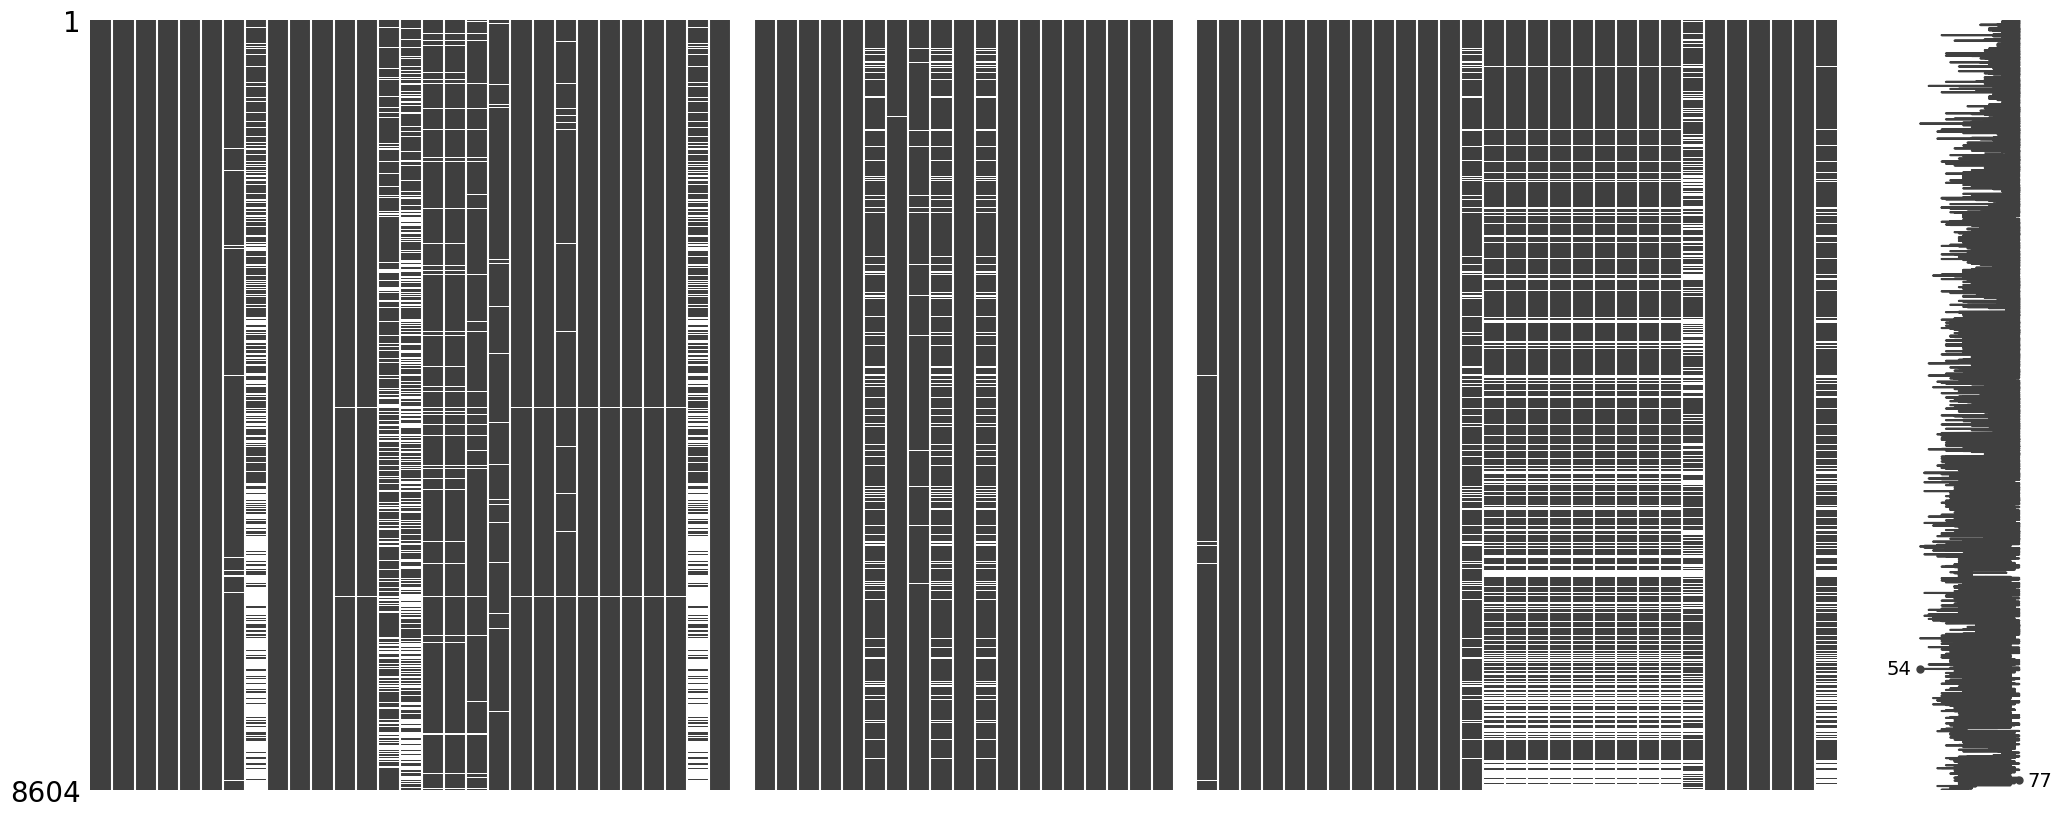

In [800]:
# Visualizing the missing values
# Chicago Listings

import missingno as msno

msno.matrix(anb_df_chic_raw)

In [801]:
# New Orleans Listings

null_count_nwor = anb_df_nwor_raw.isnull().sum()
print(f'The Counts of null values in the dataset is \n\n{null_count_nwor}')

The Counts of null values in the dataset is 

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               1215
Length: 79, dtype: int64


<Axes: >

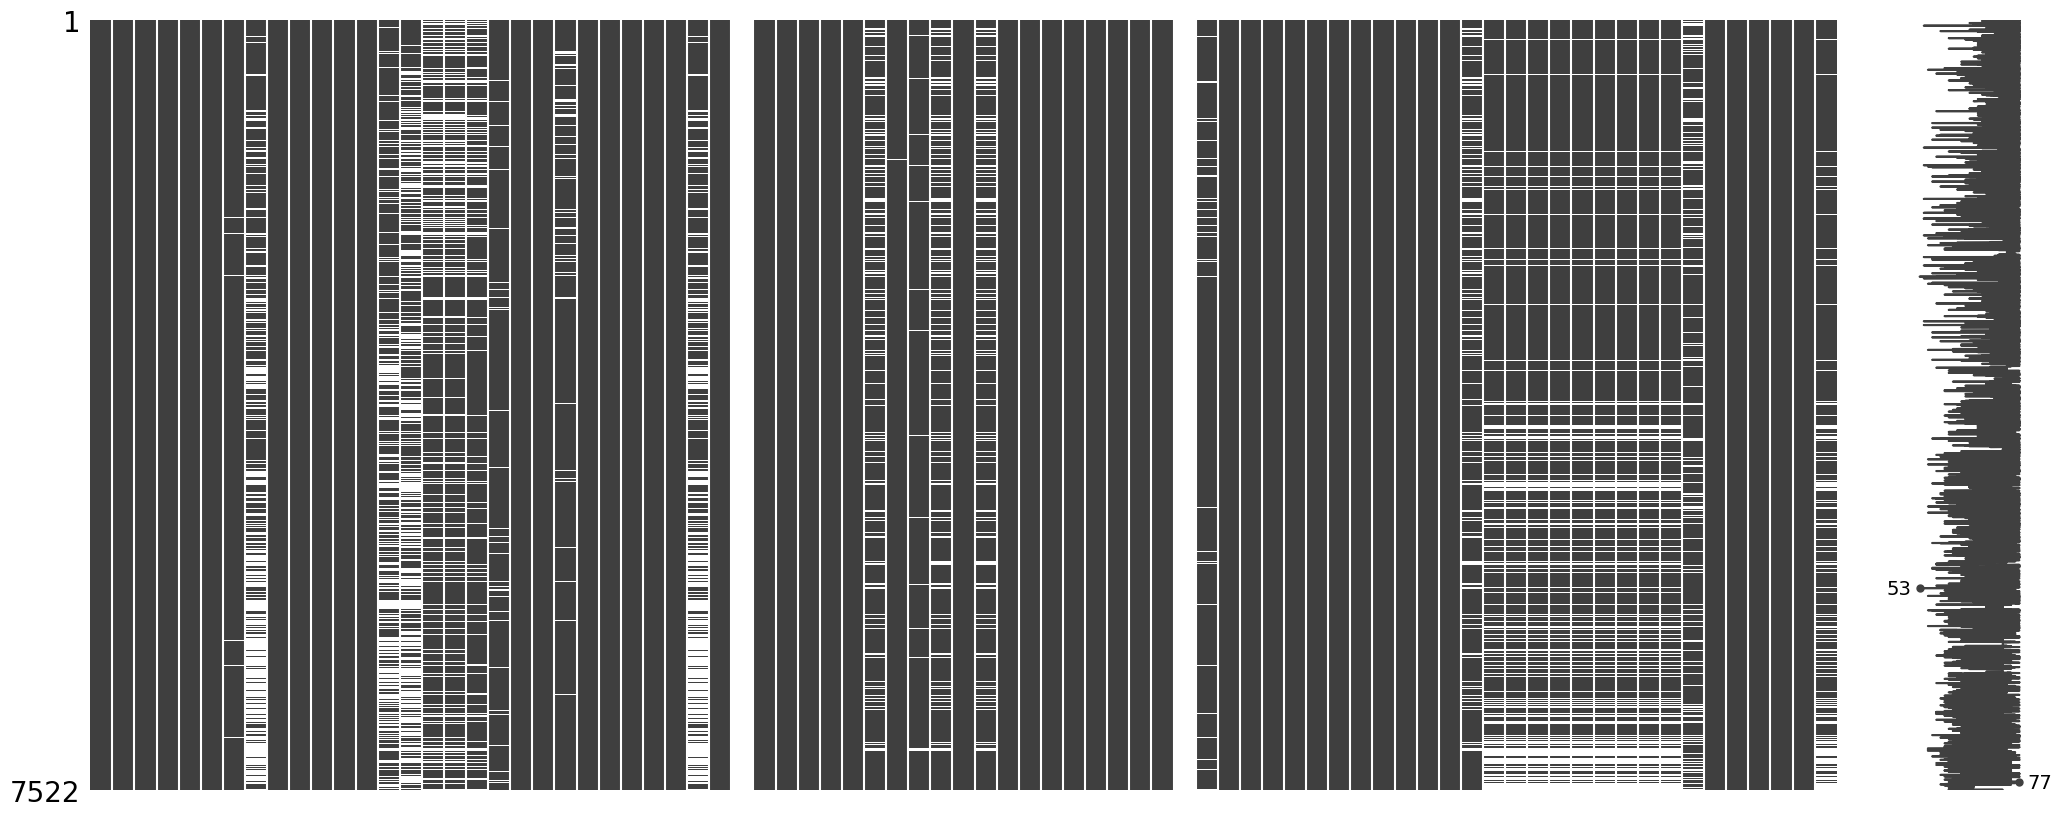

In [802]:
import missingno as msno

msno.matrix(anb_df_nwor_raw)

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [803]:
# Dataset Columns
# Chicago Listings

anb_df_chic_raw.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [804]:
# New Orleans Listings

anb_df_nwor_raw.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [805]:
# Dataset Describe
# Chicago Listings

anb_df_chic_raw.describe()

id     scrape_id       host_id  host_listings_count  \
count  8.604000e+03  8.604000e+03  8.604000e+03          8599.000000   
mean   7.095551e+17  2.025062e+13  2.284102e+08           452.980812   
std    5.456941e+17  1.793073e+00  2.045267e+08          1365.499154   
min    2.384000e+03  2.025062e+13  2.613000e+03             1.000000   
25%    4.811300e+07  2.025062e+13  4.732429e+07             1.000000   
50%    8.531934e+17  2.025062e+13  1.467262e+08             5.000000   
75%    1.199181e+18  2.025062e+13  4.243834e+08            26.000000   
max    1.444414e+18  2.025062e+13  6.979399e+08          4927.000000   

       host_total_listings_count  neighbourhood_group_cleansed     latitude  \
count                8599.000000                           0.0  8604.000000   
mean                  583.660658                           NaN    41.890350   
std                  1710.350833                           NaN     0.062084   
min                     1.000000                           NaN    41.650640   
25%                     2.000000                           NaN    41.858589   
50%                     7.000000                           NaN    41.894553   
75%                    33.000000                           NaN    41.933679   
max                  9109.000000                           NaN    42.022200   

         longitude  accommodates    bathrooms     bedrooms         beds  \
count  8604.000000   8604.000000  7722.000000  8418.000000  7708.000000   
mean    -87.661660      4.448629     1.441077     1.855072     2.362999   
std       0.043893      3.149576     0.831068     1.275107     1.943350   
min     -87.846720      1.000000     0.000000     0.000000     0.000000   
25%     -87.685917      2.000000     1.000000     1.000000     1.000000   
50%     -87.657233      4.000000     1.000000     2.000000     2.000000   
75%     -87.629698      6.000000     2.000000     2.000000     3.000000   
max     -87.528420     16.000000    15.000000    20.000000    20.000000   

       minimum_nights  maximum_nights  minimum_minimum_nights  \
count     8604.000000     8604.000000             8604.000000   
mean        13.745932      478.432706               13.592166   
std         24.802441      410.876925               24.702507   
min          1.000000        2.000000                1.000000   
25%          2.000000       95.000000                2.000000   
50%          2.000000      365.000000                2.000000   
75%         32.000000     1125.000000               32.000000   
max        365.000000     1125.000000              365.000000   

       maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  \
count             8604.000000             8604.000000            8.604000e+03   
mean                33.838099              661.735588            1.248662e+06   
std                 81.691153              462.275208            5.175634e+07   
min                  1.000000                1.000000            2.000000e+00   
25%                  2.000000              365.000000            3.650000e+02   
50%                  4.000000              365.000000            1.125000e+03   
75%                 32.000000             1125.000000            1.125000e+03   
max                365.000000             1125.000000            2.147484e+09   

       minimum_nights_avg_ntm  maximum_nights_avg_ntm  calendar_updated  \
count             8604.000000            8.604000e+03               0.0   
mean                14.682589            3.083972e+05               NaN   
std                 25.418681            1.276184e+07               NaN   
min                  1.000000            2.000000e+00               NaN   
25%                  2.000000            3.650000e+02               NaN   
50%                  2.900000            7.300000e+02               NaN   
75%                 32.000000            1.125000e+03               NaN   
max                365.000000            5.295174e+08           

In [806]:
# New Orleans Listings

anb_df_nwor_raw.describe()

id     scrape_id       host_id  host_listings_count  \
count  7.522000e+03  7.522000e+03  7.522000e+03          7522.000000   
mean   5.746214e+17  2.025061e+13  2.367405e+08            99.752194   
std    5.455218e+17  3.273655e+00  2.119379e+08           453.619828   
min    1.909100e+04  2.025061e+13  1.515700e+04             1.000000   
25%    3.300945e+07  2.025061e+13  4.503036e+07             1.000000   
50%    6.446824e+17  2.025061e+13  1.579213e+08             4.000000   
75%    1.101541e+18  2.025061e+13  4.429208e+08            19.000000   
max    1.438449e+18  2.025061e+13  6.971625e+08          3687.000000   

       host_total_listings_count  neighbourhood_group_cleansed     latitude  \
count                7522.000000                           0.0  7522.000000   
mean                  158.348445                           NaN    29.958382   
std                   717.342037                           NaN     0.024120   
min                     1.000000                           NaN    29.897042   
25%                     2.000000                           NaN    29.942830   
50%                     6.000000                           NaN    29.955947   
75%                    27.000000                           NaN    29.969140   
max                  9105.000000                           NaN    30.161040   

         longitude  accommodates    bathrooms     bedrooms         beds  \
count  7522.000000   7522.000000  6385.000000  7359.000000  6365.000000   
mean    -90.072884      5.020739     1.797572     2.224759     3.014611   
std       0.031135      3.073162     1.326105     1.612850     2.427763   
min     -90.135521      1.000000     0.000000     0.000000     0.000000   
25%     -90.087735      2.000000     1.000000     1.000000     2.000000   
50%     -90.073067      4.000000     1.000000     2.000000     2.000000   
75%     -90.062472      6.000000     2.000000     3.000000     4.000000   
max     -89.737090     16.000000    44.000000    41.000000    55.000000   

       minimum_nights  maximum_nights  minimum_minimum_nights  \
count     7522.000000     7522.000000             7522.000000   
mean        14.557166      449.601835               13.414517   
std         25.037889      401.130879               24.783846   
min          1.000000        3.000000                1.000000   
25%          1.000000       90.000000                1.000000   
50%          3.000000      365.000000                2.000000   
75%         30.000000      700.000000               30.000000   
max       1125.000000     5000.000000             1125.000000   

       maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  \
count             7522.000000            7.522000e+03            7.522000e+03   
mean                14.994549            3.141034e+06            3.141083e+06   
std                 24.631961            8.206737e+07            8.206737e+07   
min                  1.000000            1.000000e+00            3.000000e+00   
25%                  3.000000            3.602500e+02            3.650000e+02   
50%                  4.000000            3.650000e+02            3.650000e+02   
75%                 30.000000            1.125000e+03            1.125000e+03   
max               1125.000000            2.147484e+09            2.147484e+09   

       minimum_nights_avg_ntm  maximum_nights_avg_ntm  calendar_updated  \
count             7522.000000            7.522000e+03               0.0   
mean                13.971191            3.141059e+06               NaN   
std                 24.691634            8.206737e+07               NaN   
min                  1.000000            1.600000e+00               NaN   
25%                  2.000000            3.650000e+02               NaN   
50%                  3.000000            3.650000e+02               NaN   
75%                 30.000000            1.125000e+03               NaN   
max               1125.000000            2.147484e+09           

### Variables Description

1) **id**: A unique identifier for each listing in the dataset.

2) **name**: The name of the property listing as provided by the host.

3) **host_id**: A unique identifier for the host of the listing.

4) **host_url**: The URL link to the host's profile on the Airbnb platform.

5) **host_name**: The name of the host associated with the property listing.

6) **host_since**: The date when the host joined the Airbnb platform.

7) **host_response_time**: The typical time taken by the host to respond to inquiries from potential guests.

8) **host_response_rate**: The percentage of inquiries that the host responds to.

9) **host_acceptance_rate**: The percentage of booking requests that the host accepts.

10) **host_is_superhost**: Indicates whether the host is recognized as a Superhost based on their performance metrics.

11) **host_neighbourhood**: The neighborhood where the host is located.

12) **host_listings_count**: The number of listings that the host currently has.

13) **host_total_listings_count**: The total number of listings the host has ever had.

14) **latitude**: The geographical latitude of the property listing's location.

15) **longitude**: The geographical longitude of the property listing's location.

16) **property_type**: The type of property (e.g., apartment, house, etc.) being listed.

17) **room_type**: The type of room being rented (e.g., entire home, private room, shared room).

18) **price**: The price per night for renting the listing.

19) **minimum_nights**: The minimum number of nights required for a stay at the listing.

20) **maximum_nights**: The maximum number of nights allowed for a stay at the listing.

21) **availability_365**: The number of days the listing is available for booking in a year.

22) **number_of_reviews**: The total number of reviews the listing has received from guests.

23) **number_of_reviews_ly**: The number of reviews received in the last year.

24) **estimated_occupancy_l365d**: The estimated occupancy rate of the listing over the last 365 days.

### Check Unique Values for each variable.

In [807]:
# Check Unique Values for each variable.
# Chicago Listings

anb_df_chic_sample = anb_df_chic_raw[['id',
#                                     'listing_url', 'scrape_id', 'last_scraped', 'source',
                                     'name',
#       'description', 'neighborhood_overview', 'picture_url',
                                     'host_id',
       'host_url', 'host_name', 'host_since',
#                                      'host_location',
#                                     'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
#       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count',
#                                     'host_verifications',
#       'host_has_profile_pic', 'host_identity_verified',
#                                     'neighbourhood',
#       'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
                                     'latitude', 'longitude',
                                     'property_type', 'room_type',
#                                     'accommodates', 'bathrooms',
#       'bathrooms_text', 'bedrooms', 'beds', 'amenities',
                                     'price',
       'minimum_nights', 'maximum_nights',
#                                     'minimum_minimum_nights',
#       'maximum_minimum_nights', 'minimum_maximum_nights',
#      'maximum_maximum_nights', 'minimum_nights_avg_ntm',
#       'maximum_nights_avg_ntm', 'calendar_updated',
#                                     'has_availability',
#       'availability_30', 'availability_60', 'availability_90',
       'availability_365',
#                                     'calendar_last_scraped',
                                     'number_of_reviews',
#       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'availability_eoy',
       'number_of_reviews_ly', 'estimated_occupancy_l365d',
#       'estimated_revenue_l365d',
#                                      'first_review', 'last_review',
#       'review_scores_rating', 'review_scores_accuracy',
#       'review_scores_cleanliness', 'review_scores_checkin',
#       'review_scores_communication', 'review_scores_location',
#       'review_scores_value', 'license', 'instant_bookable',
#       'calculated_host_listings_count',
#       'calculated_host_listings_count_entire_homes',
#       'calculated_host_listings_count_private_rooms',
#       'calculated_host_listings_count_shared_rooms',
#                                      'reviews_per_month'
                                      ]]
anb_df_chic_sample.nunique()

id                           8604
name                         8137
host_id                      3635
host_url                     3635
host_name                    2084
host_since                   2493
host_response_time              4
host_response_rate             46
host_acceptance_rate           85
host_is_superhost               2
host_neighbourhood            229
host_listings_count            79
host_total_listings_count     106
latitude                     6903
longitude                    6723
property_type                  45
room_type                       4
price                         875
minimum_nights                 52
maximum_nights                138
availability_365              366
number_of_reviews             468
number_of_reviews_ly          111
estimated_occupancy_l365d      83
dtype: int64

In [808]:
anb_df_chic_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8604 entries, 0 to 8603
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         8604 non-null   int64  
 1   name                       8604 non-null   object 
 2   host_id                    8604 non-null   int64  
 3   host_url                   8604 non-null   object 
 4   host_name                  8599 non-null   object 
 5   host_since                 8599 non-null   object 
 6   host_response_time         8127 non-null   object 
 7   host_response_rate         8127 non-null   object 
 8   host_acceptance_rate       8204 non-null   object 
 9   host_is_superhost          8325 non-null   object 
 10  host_neighbourhood         8393 non-null   object 
 11  host_listings_count        8599 non-null   float64
 12  host_total_listings_count  8599 non-null   float64
 13  latitude                   8604 non-null   float

<Axes: >

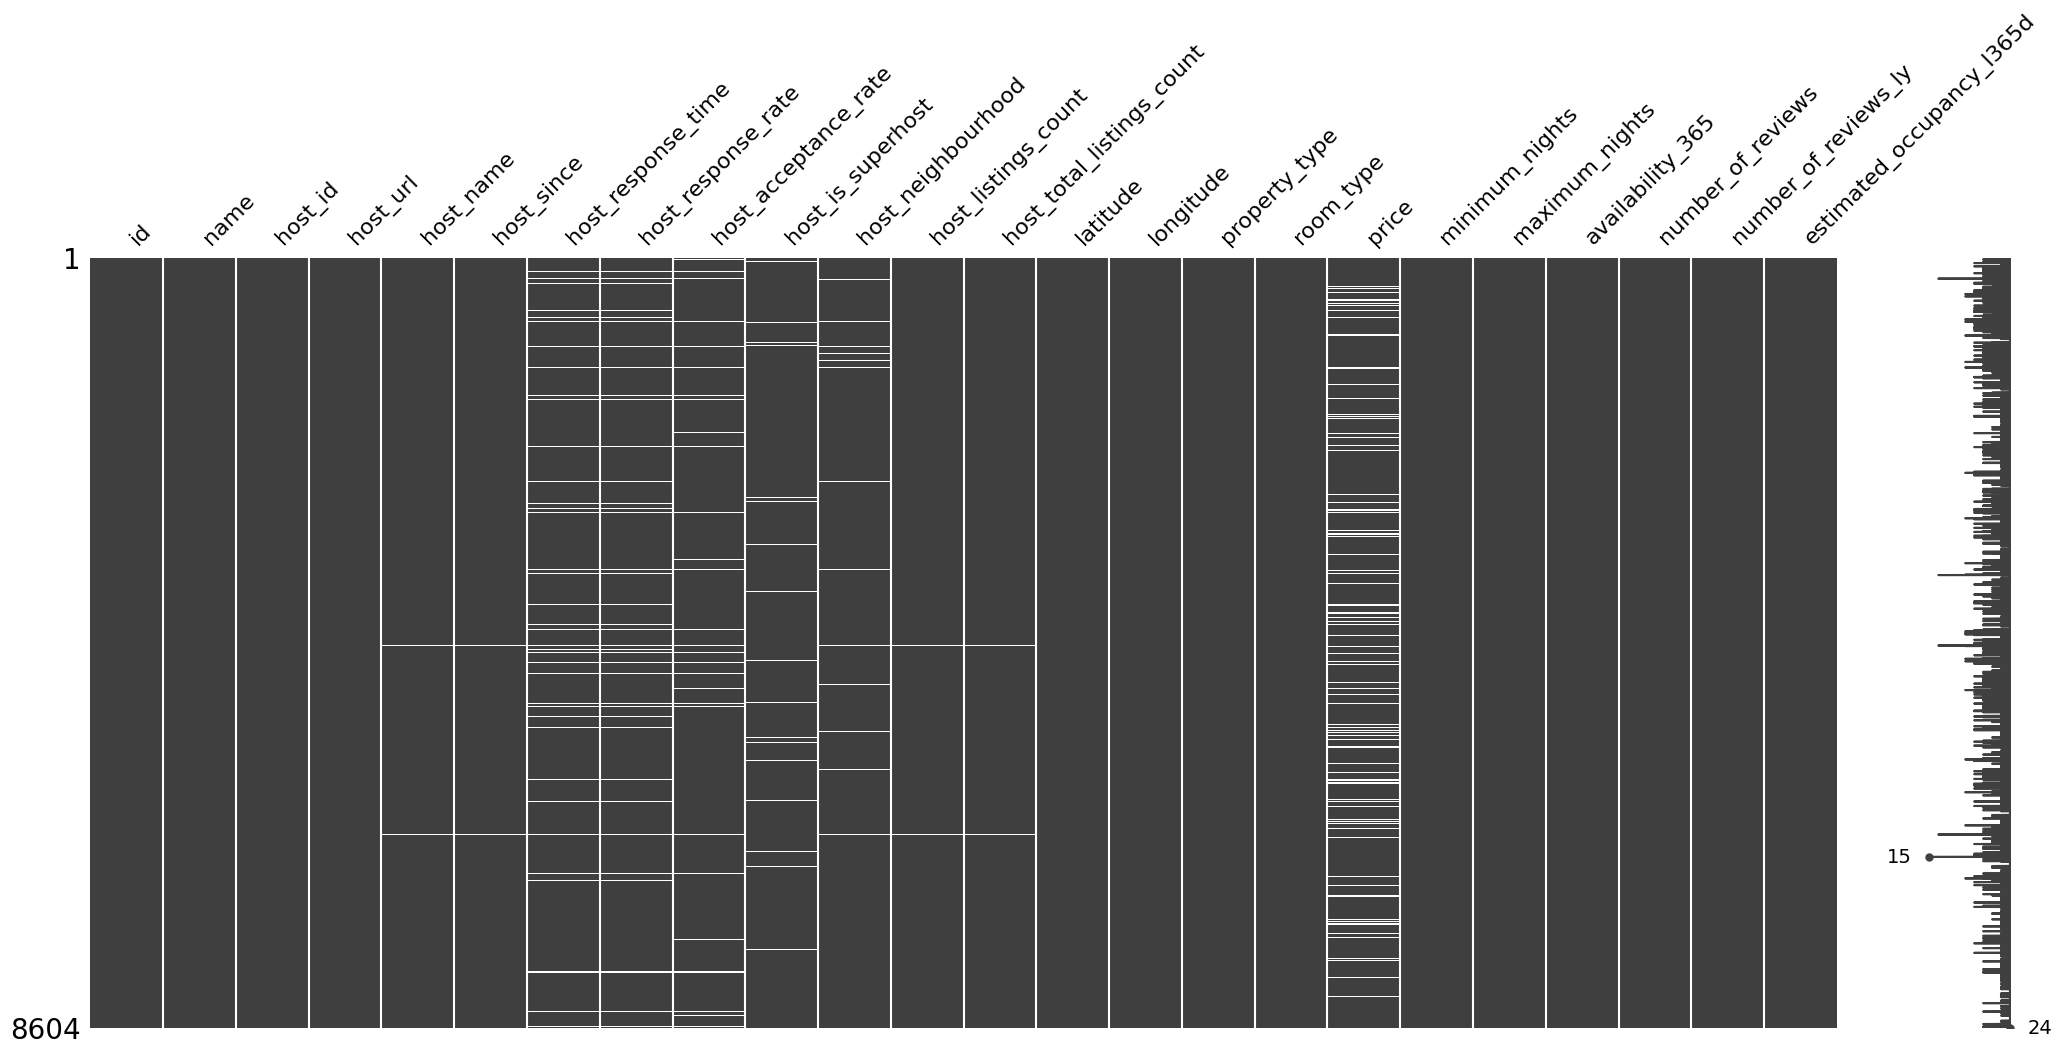

In [809]:
import missingno as msno

msno.matrix(anb_df_chic_sample)

In [810]:
# Filling Null Values for Chicago

# 'host_neighbourhood' nulls using the 'latitude' and 'longitude' values
anb_df_chic_sample_ngb_loc = anb_df_chic_sample[anb_df_chic_sample['host_neighbourhood'].notnull()].groupby(['host_neighbourhood'])[['latitude', 'longitude']].mean().reset_index()
anb_df_chic_sample_ngb_loc['vector_magnitude'] = np.sqrt(anb_df_chic_sample_ngb_loc['latitude'] ** 2 + anb_df_chic_sample_ngb_loc['longitude'] ** 2)
anb_df_chic_sample_ngb_loc

host_neighbourhood   latitude  longitude  vector_magnitude
0                Acres Home  41.803140 -87.595300         97.058947
1               Albany Park  41.962498 -87.717994         97.238355
2                  Alhambra  41.941830 -87.665950         97.182488
3             Andersonville  41.980880 -87.669521         97.202568
4           Arcadia Terrace  41.988507 -87.693821         97.227779
..                      ...        ...        ...               ...
224  West Town/Noble Square  41.896355 -87.670342         97.166833
225                Westover  41.782853 -87.607471         97.061196
226             Wicker Park  41.901496 -87.672479         97.170978
227                Woodlawn  41.785948 -87.606198         97.061379
228            Wrigleyville  41.947701 -87.658163         97.177997

[229 rows x 4 columns]

In [811]:
# Creating a dictionary of neighborhood centroids from the previously calculated data
neighborhood_centroids = dict(zip(anb_df_chic_sample_ngb_loc['host_neighbourhood'], zip(anb_df_chic_sample_ngb_loc['latitude'], anb_df_chic_sample_ngb_loc['longitude'])))

# Function to find the nearest neighborhood for a given latitude and longitude
def find_nearest_neighborhood(lat, lon, centroids):

    min_distance = float('inf')
    nearest_neighborhood = None

    for neighborhood, (centroid_lat, centroid_lon) in centroids.items():

        distance = euclidean((lat, lon), (centroid_lat, centroid_lon))

        if distance < min_distance:

            min_distance = distance
            nearest_neighborhood = neighborhood

    return nearest_neighborhood

# Filling missing 'host_neighbourhood' values
for index, row in anb_df_chic_sample[anb_df_chic_sample['host_neighbourhood'].isnull()].iterrows():

    lat = row['latitude']
    lon = row['longitude']
    nearest_neighborhood = find_nearest_neighborhood(lat, lon, neighborhood_centroids)
    anb_df_chic_sample.loc[index, 'host_neighbourhood'] = nearest_neighborhood

# Verifying that null values in 'host_neighbourhood' are filled
print("Missing values in 'host_neighbourhood' after imputation:")
print(anb_df_chic_sample['host_neighbourhood'].isnull().sum())

Missing values in 'host_neighbourhood' after imputation:
0


In [812]:
# Converting 'price' to numeric
anb_df_chic_sample['price'] = anb_df_chic_sample['price'].astype(str).str.replace('[$,]', '', regex = True)
anb_df_chic_sample['price'] = pd.to_numeric(anb_df_chic_sample['price'], errors = 'coerce')

# Calculating medians for the numeric columns
anb_df_chic_sample_ngb_rmt_num_medians = anb_df_chic_sample.groupby(['host_neighbourhood', 'room_type'])[['price']].median().reset_index()
anb_df_chic_sample_ngb_rmt_num_medians

/tmp/ipython-input-449719018.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anb_df_chic_sample['price'] = anb_df_chic_sample['price'].astype(str).str.replace('[$,]', '', regex = True)
/tmp/ipython-input-449719018.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anb_df_chic_sample['price'] = pd.to_numeric(anb_df_chic_sample['price'], errors = 'coerce')


host_neighbourhood        room_type  price
0           Acres Home  Entire home/apt   87.0
1          Albany Park  Entire home/apt  171.0
2          Albany Park     Private room   72.5
3             Alhambra  Entire home/apt  253.0
4        Andersonville  Entire home/apt  195.0
..                 ...              ...    ...
372           Woodlawn     Private room   49.0
373           Woodlawn      Shared room    NaN
374       Wrigleyville  Entire home/apt  288.5
375       Wrigleyville     Private room   62.0
376       Wrigleyville      Shared room    NaN

[377 rows x 3 columns]

In [813]:
# Merging the median prices back to the main DataFrame
anb_df_chic_sample = pd.merge(anb_df_chic_sample, anb_df_chic_sample_ngb_rmt_num_medians[['host_neighbourhood', 'room_type', 'price']], on = ['host_neighbourhood', 'room_type'], how = 'left', suffixes = ('', '_median'))

# Filling null 'price' values with the merged median prices
anb_df_chic_sample['price'].fillna(anb_df_chic_sample['price_median'], inplace = True)

# Dropping the redundant median price column
anb_df_chic_sample.drop('price_median', axis = 1, inplace = True)

# Verifying that null values in 'price' are filled
print("Missing values in 'price' after imputation:")
print(anb_df_chic_sample['price'].isnull().sum())

Missing values in 'price' after imputation:
33


/tmp/ipython-input-1966283292.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  anb_df_chic_sample['price'].fillna(anb_df_chic_sample['price_median'], inplace = True)


In [814]:
# Calculating medians for the numeric columns
anb_df_chic_sample_rmt_num_medians = anb_df_chic_sample_ngb_rmt_num_medians.groupby(['room_type'])['price'].median().reset_index()
anb_df_chic_sample_rmt_num_medians

room_type     price
0  Entire home/apt    169.75
1       Hotel room  20292.00
2     Private room     75.00
3      Shared room     56.50

In [815]:
# Merging the median prices back to the main DataFrame
anb_df_chic_sample = pd.merge(anb_df_chic_sample, anb_df_chic_sample_rmt_num_medians[['room_type', 'price']], on = ['room_type'], how = 'left', suffixes = ('', '_median'))

# Filling null 'price' values with the merged median prices
anb_df_chic_sample['price'].fillna(anb_df_chic_sample['price_median'], inplace = True)

# Dropping the redundant median price column
anb_df_chic_sample.drop('price_median', axis = 1, inplace = True)

# Verifying that null values in 'price' are filled
print("Missing values in 'price' after imputation:")
print(anb_df_chic_sample['price'].isnull().sum())

Missing values in 'price' after imputation:
0


/tmp/ipython-input-3583391699.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  anb_df_chic_sample['price'].fillna(anb_df_chic_sample['price_median'], inplace = True)


In [816]:
# Forward Filling the Null Values

anb_df_chic_sample['host_is_superhost'].fillna('f', inplace = True)
anb_df_chic_sample['host_response_time'].ffill(inplace = True)
anb_df_chic_sample['host_response_rate'].ffill(inplace = True)
anb_df_chic_sample['host_acceptance_rate'].ffill(inplace = True)

/tmp/ipython-input-4221071779.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  anb_df_chic_sample['host_is_superhost'].fillna('f', inplace = True)
/tmp/ipython-input-4221071779.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

In [817]:
# Dropping rows with null values from the Chicago sample DataFrame
anb_df_chic_sample.dropna(inplace = True)

# Displaying the shape of the DataFrame after dropping nulls
print(f"Shape of Chicago sample DataFrame after dropping null rows: {anb_df_chic_sample.shape}")

Shape of Chicago sample DataFrame after dropping null rows: (8599, 24)


<Axes: >

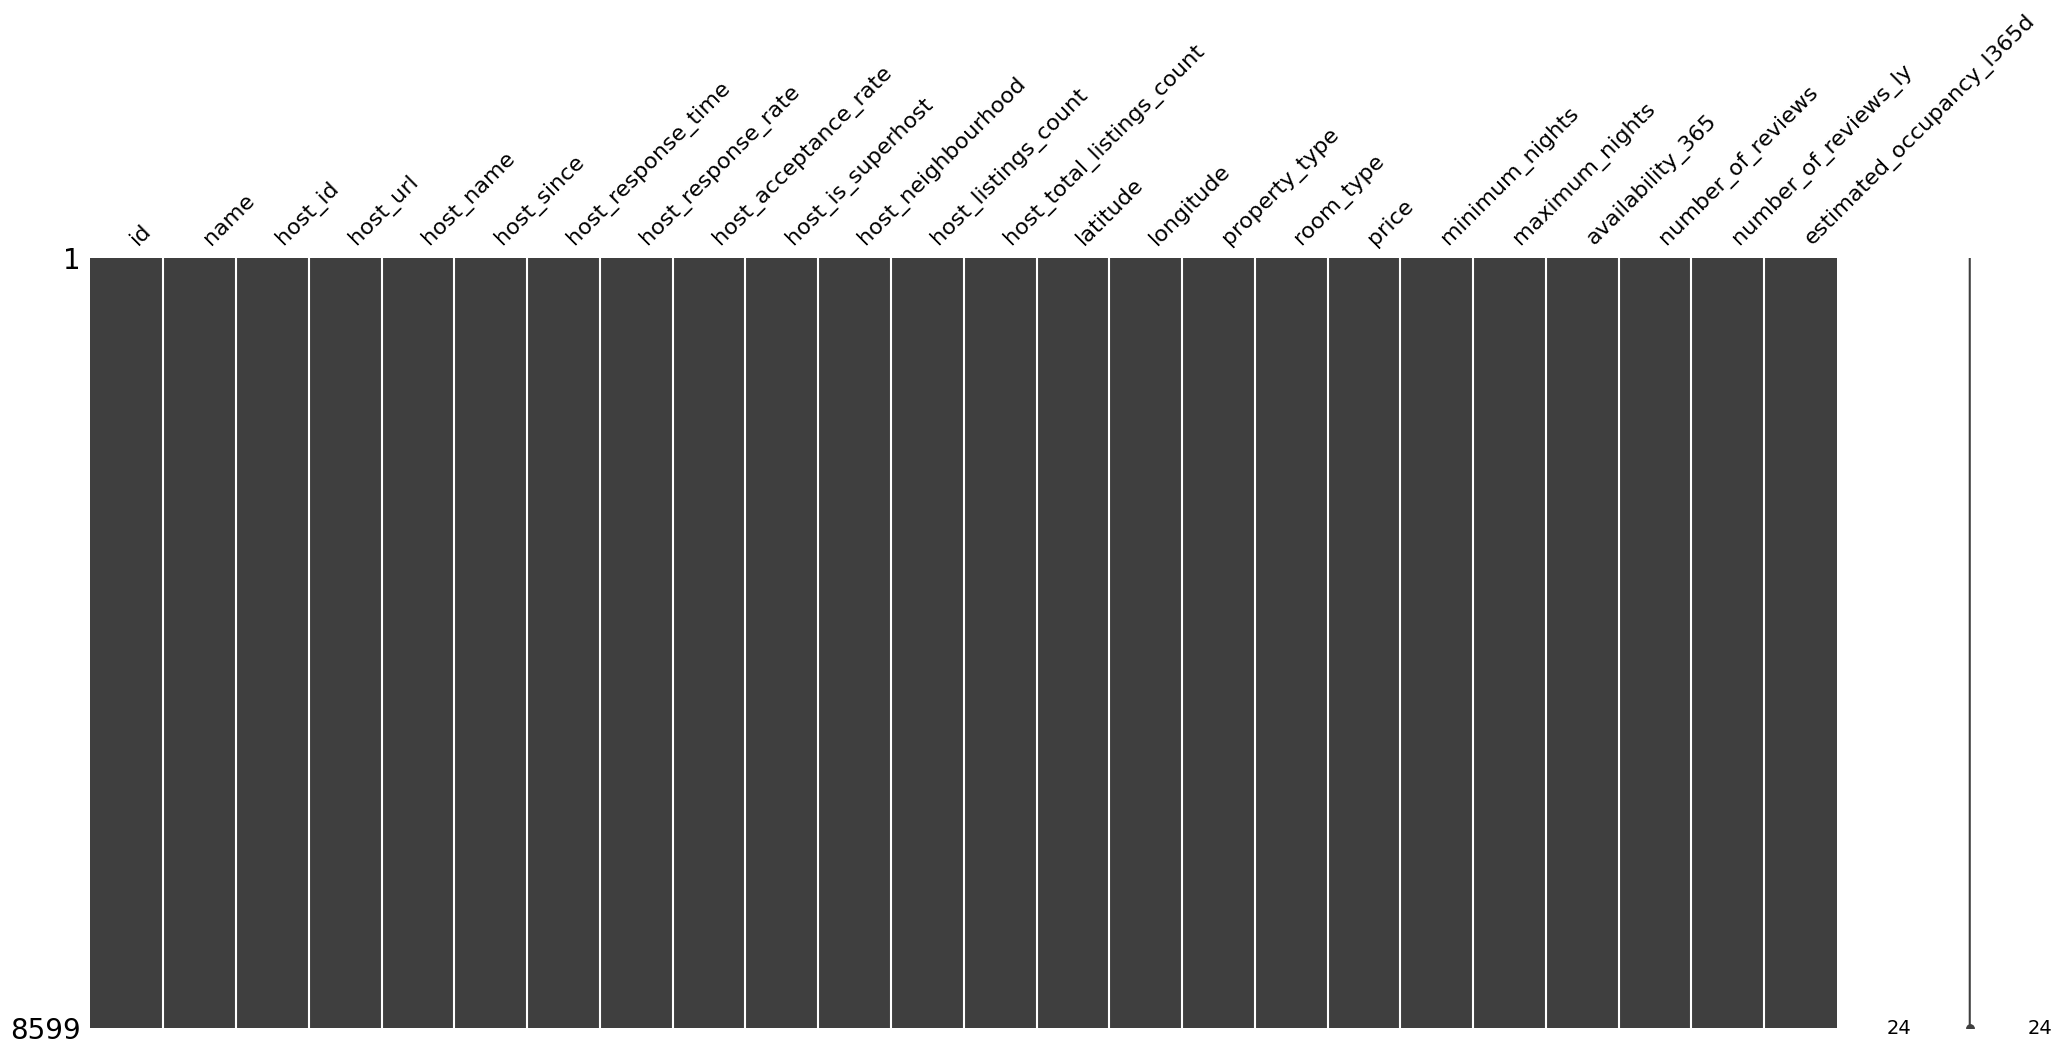

In [818]:
import missingno as msno

msno.matrix(anb_df_chic_sample)

In [819]:
# New Orleans Listings

anb_df_nwor_sample = anb_df_nwor_raw
anb_df_nwor_sample.nunique()

id                                              7522
listing_url                                     7522
scrape_id                                          1
last_scraped                                       1
source                                             2
                                                ... 
calculated_host_listings_count                    45
calculated_host_listings_count_entire_homes       44
calculated_host_listings_count_private_rooms      17
calculated_host_listings_count_shared_rooms        3
reviews_per_month                                611
Length: 79, dtype: int64

In [820]:
# Check Unique Values for each variable.
# New Orleans Listings

anb_df_nwor_sample = anb_df_nwor_raw[['id',
#                                     'listing_url', 'scrape_id', 'last_scraped', 'source',
                                     'name',
#       'description', 'neighborhood_overview', 'picture_url',
                                     'host_id',
       'host_url', 'host_name', 'host_since',
#                                      'host_location',
#                                     'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
#       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count',
#                                     'host_verifications',
#       'host_has_profile_pic', 'host_identity_verified',
#                                     'neighbourhood',
#       'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
                                     'latitude', 'longitude',
                                     'property_type', 'room_type',
#                                     'accommodates', 'bathrooms',
#       'bathrooms_text', 'bedrooms', 'beds', 'amenities',
                                     'price',
       'minimum_nights', 'maximum_nights',
#                                     'minimum_minimum_nights',
#       'maximum_minimum_nights', 'minimum_maximum_nights',
#      'maximum_maximum_nights', 'minimum_nights_avg_ntm',
#       'maximum_nights_avg_ntm', 'calendar_updated',
#                                     'has_availability',
#       'availability_30', 'availability_60', 'availability_90',
       'availability_365',
#                                     'calendar_last_scraped',
                                     'number_of_reviews',
#       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'availability_eoy',
       'number_of_reviews_ly', 'estimated_occupancy_l365d',
#       'estimated_revenue_l365d',
#                                      'first_review', 'last_review',
#       'review_scores_rating', 'review_scores_accuracy',
#       'review_scores_cleanliness', 'review_scores_checkin',
#       'review_scores_communication', 'review_scores_location',
#       'review_scores_value', 'license', 'instant_bookable',
#       'calculated_host_listings_count',
#       'calculated_host_listings_count_entire_homes',
#       'calculated_host_listings_count_private_rooms',
#       'calculated_host_listings_count_shared_rooms',
#                                      'reviews_per_month'
                                      ]]
anb_df_nwor_sample.nunique()

id                           7522
name                         7317
host_id                      3573
host_url                     3573
host_name                    1859
host_since                   2415
host_response_time              4
host_response_rate             31
host_acceptance_rate           77
host_is_superhost               2
host_neighbourhood            162
host_listings_count            87
host_total_listings_count     102
latitude                     5310
longitude                    5455
property_type                  47
room_type                       4
price                         712
minimum_nights                 39
maximum_nights                139
availability_365              366
number_of_reviews             466
number_of_reviews_ly          111
estimated_occupancy_l365d      33
dtype: int64

In [821]:
anb_df_nwor_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7522 entries, 0 to 7521
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         7522 non-null   int64  
 1   name                       7522 non-null   object 
 2   host_id                    7522 non-null   int64  
 3   host_url                   7522 non-null   object 
 4   host_name                  7522 non-null   object 
 5   host_since                 7522 non-null   object 
 6   host_response_time         5841 non-null   object 
 7   host_response_rate         5841 non-null   object 
 8   host_acceptance_rate       6308 non-null   object 
 9   host_is_superhost          7257 non-null   object 
 10  host_neighbourhood         7120 non-null   object 
 11  host_listings_count        7522 non-null   int64  
 12  host_total_listings_count  7522 non-null   int64  
 13  latitude                   7522 non-null   float

<Axes: >

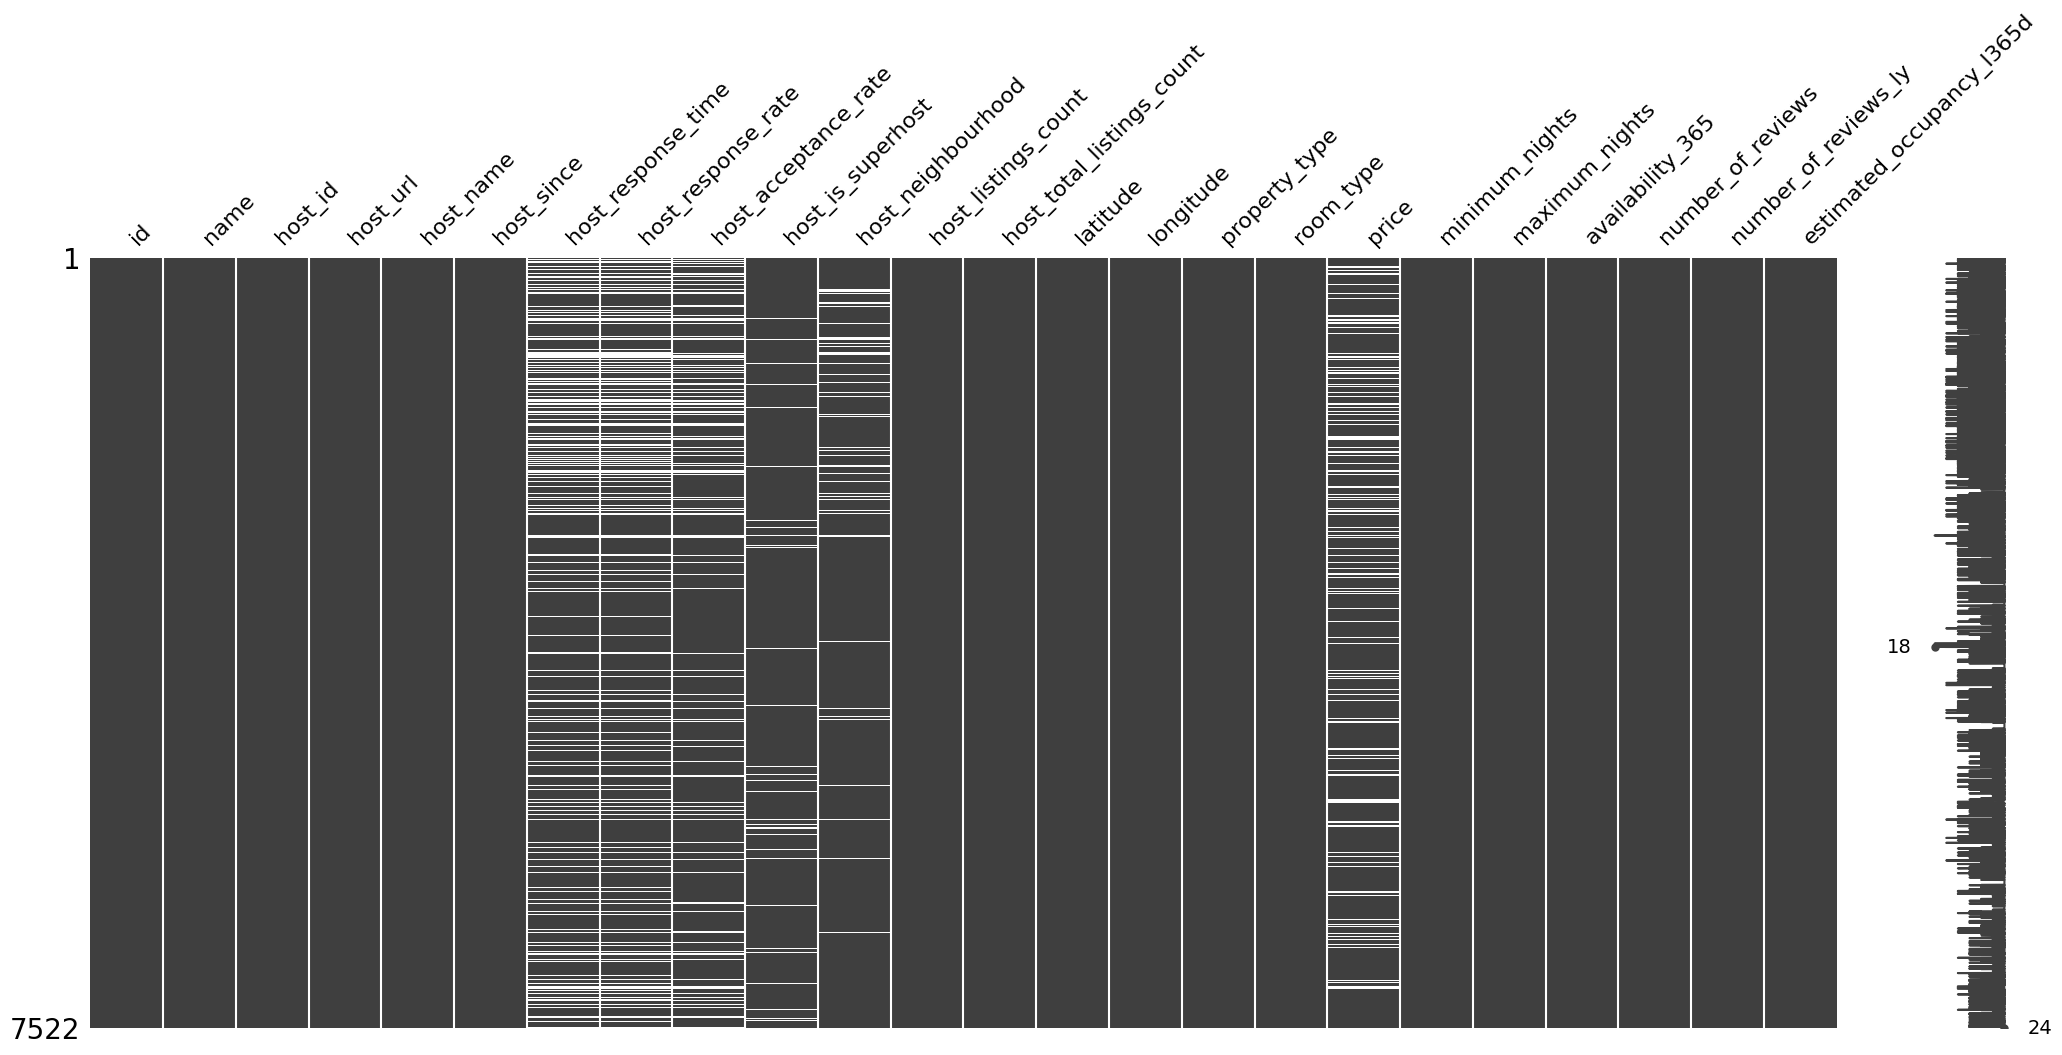

In [822]:
import missingno as msno

msno.matrix(anb_df_nwor_sample)

In [823]:
# Filling Null Values for New Orleans

# 'host_neighbourhood' nulls using the 'latitude' and 'longitude' values
anb_df_nwor_sample_ngb_loc = anb_df_nwor_sample[anb_df_nwor_sample['host_neighbourhood'].notnull()].groupby(['host_neighbourhood'])[['latitude', 'longitude']].mean().reset_index()
anb_df_nwor_sample_ngb_loc['vector_magnitude'] = np.sqrt(anb_df_nwor_sample_ngb_loc['latitude'] ** 2 + anb_df_nwor_sample_ngb_loc['longitude'] ** 2)
anb_df_nwor_sample_ngb_loc

host_neighbourhood   latitude  longitude  vector_magnitude
0            11th Ward  29.931948 -90.085666         94.928124
1           Adams Park  29.948580 -90.101510         94.948405
2              Algiers  29.944975 -90.042553         94.891322
3              Anaheim  29.934140 -90.081230         94.924606
4       Anaheim Resort  29.945953 -90.071290         94.918899
..                 ...        ...        ...               ...
157       West Village  29.964859 -90.043993         94.898964
158            Whitney  29.949163 -90.041994         94.892112
159      Yarmouth Port  29.922463 -90.099903         94.938644
160        Zephyr Cove  29.933980 -90.079925         94.923317
161       داماك هيلز 2  29.916210 -90.008240         94.849686

[162 rows x 4 columns]

In [824]:
# Creating a dictionary of neighborhood centroids from the previously calculated data
neighborhood_centroids = dict(zip(anb_df_nwor_sample_ngb_loc['host_neighbourhood'], zip(anb_df_nwor_sample_ngb_loc['latitude'], anb_df_nwor_sample_ngb_loc['longitude'])))

# Function to find the nearest neighborhood for a given latitude and longitude
def find_nearest_neighborhood(lat, lon, centroids):

    min_distance = float('inf')
    nearest_neighborhood = None

    for neighborhood, (centroid_lat, centroid_lon) in centroids.items():

        distance = euclidean((lat, lon), (centroid_lat, centroid_lon))

        if distance < min_distance:

            min_distance = distance
            nearest_neighborhood = neighborhood

    return nearest_neighborhood

# Filling missing 'host_neighbourhood' values
for index, row in anb_df_nwor_sample[anb_df_nwor_sample['host_neighbourhood'].isnull()].iterrows():

    lat = row['latitude']
    lon = row['longitude']
    nearest_neighborhood = find_nearest_neighborhood(lat, lon, neighborhood_centroids)
    anb_df_nwor_sample.loc[index, 'host_neighbourhood'] = nearest_neighborhood

# Verifying that null values in 'host_neighbourhood' are filled
print("Missing values in 'host_neighbourhood' after imputation:")
print(anb_df_nwor_sample['host_neighbourhood'].isnull().sum())

Missing values in 'host_neighbourhood' after imputation:
0


In [825]:
# Converting 'price' to numeric
anb_df_nwor_sample['price'] = anb_df_nwor_sample['price'].astype(str).str.replace('[$,]', '', regex = True)
anb_df_nwor_sample['price'] = pd.to_numeric(anb_df_nwor_sample['price'], errors = 'coerce')

# Calculating medians for the numeric columns
anb_df_nwor_sample_ngb_rmt_num_medians = anb_df_nwor_sample.groupby(['host_neighbourhood', 'room_type'])[['price']].median().reset_index()
anb_df_nwor_sample_ngb_rmt_num_medians

/tmp/ipython-input-4214376928.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anb_df_nwor_sample['price'] = anb_df_nwor_sample['price'].astype(str).str.replace('[$,]', '', regex = True)
/tmp/ipython-input-4214376928.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anb_df_nwor_sample['price'] = pd.to_numeric(anb_df_nwor_sample['price'], errors = 'coerce')


host_neighbourhood        room_type  price
0            11th Ward  Entire home/apt  115.0
1            11th Ward     Private room   65.0
2           Adams Park  Entire home/apt   92.0
3              Algiers  Entire home/apt  128.0
4              Algiers     Private room   67.0
..                 ...              ...    ...
267            Whitney  Entire home/apt  107.0
268            Whitney     Private room  124.0
269      Yarmouth Port  Entire home/apt  525.5
270        Zephyr Cove  Entire home/apt  275.0
271       داماك هيلز 2  Entire home/apt  499.0

[272 rows x 3 columns]

In [826]:
# Merging the median prices back to the main DataFrame
anb_df_nwor_sample = pd.merge(anb_df_nwor_sample, anb_df_nwor_sample_ngb_rmt_num_medians[['host_neighbourhood', 'room_type', 'price']], on = ['host_neighbourhood', 'room_type'], how = 'left', suffixes = ('', '_median'))

# Filling null 'price' values with the merged median prices
anb_df_nwor_sample['price'].fillna(anb_df_nwor_sample['price_median'], inplace = True)

# Dropping the redundant median price column
anb_df_nwor_sample.drop('price_median', axis = 1, inplace = True)

# Verifying that null values in 'price' are filled
print("Missing values in 'price' after imputation:")
print(anb_df_nwor_sample['price'].isnull().sum())

Missing values in 'price' after imputation:
48


/tmp/ipython-input-2382137299.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  anb_df_nwor_sample['price'].fillna(anb_df_nwor_sample['price_median'], inplace = True)


In [827]:
# Calculating medians for the numeric columns
anb_df_nwor_sample_rmt_num_medians = anb_df_nwor_sample_ngb_rmt_num_medians.groupby(['room_type'])['price'].median().reset_index()
anb_df_nwor_sample_rmt_num_medians

room_type  price
0  Entire home/apt  136.5
1       Hotel room  267.5
2     Private room   91.5
3      Shared room  117.5

In [828]:
# Merging the median prices back to the main DataFrame
anb_df_nwor_sample = pd.merge(anb_df_nwor_sample, anb_df_nwor_sample_rmt_num_medians[['room_type', 'price']], on = ['room_type'], how = 'left', suffixes = ('', '_median'))

# Filling null 'price' values with the merged median prices
anb_df_nwor_sample['price'].fillna(anb_df_nwor_sample['price_median'], inplace = True)

# Dropping the redundant median price column
anb_df_nwor_sample.drop('price_median', axis = 1, inplace = True)

# Verifying that null values in 'price' are filled
print("Missing values in 'price' after imputation:")
print(anb_df_nwor_sample['price'].isnull().sum())

Missing values in 'price' after imputation:
0


/tmp/ipython-input-3281205343.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  anb_df_nwor_sample['price'].fillna(anb_df_nwor_sample['price_median'], inplace = True)


In [829]:
# Forward Filling the Null Values

anb_df_nwor_sample['host_is_superhost'].fillna('f', inplace = True)
anb_df_nwor_sample['host_response_time'].ffill(inplace = True)
anb_df_nwor_sample['host_response_rate'].ffill(inplace = True)
anb_df_nwor_sample['host_acceptance_rate'].ffill(inplace = True)

/tmp/ipython-input-1757626118.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  anb_df_nwor_sample['host_is_superhost'].fillna('f', inplace = True)
/tmp/ipython-input-1757626118.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

In [830]:
# Dropping rows with null values from the New Orleans sample DataFrame
anb_df_nwor_sample.dropna(inplace = True)

# Displaying the shape of the DataFrame after dropping nulls
print(f"Shape of New Orleans sample DataFrame after dropping null rows: {anb_df_nwor_sample.shape}")

Shape of New Orleans sample DataFrame after dropping null rows: (7522, 24)


<Axes: >

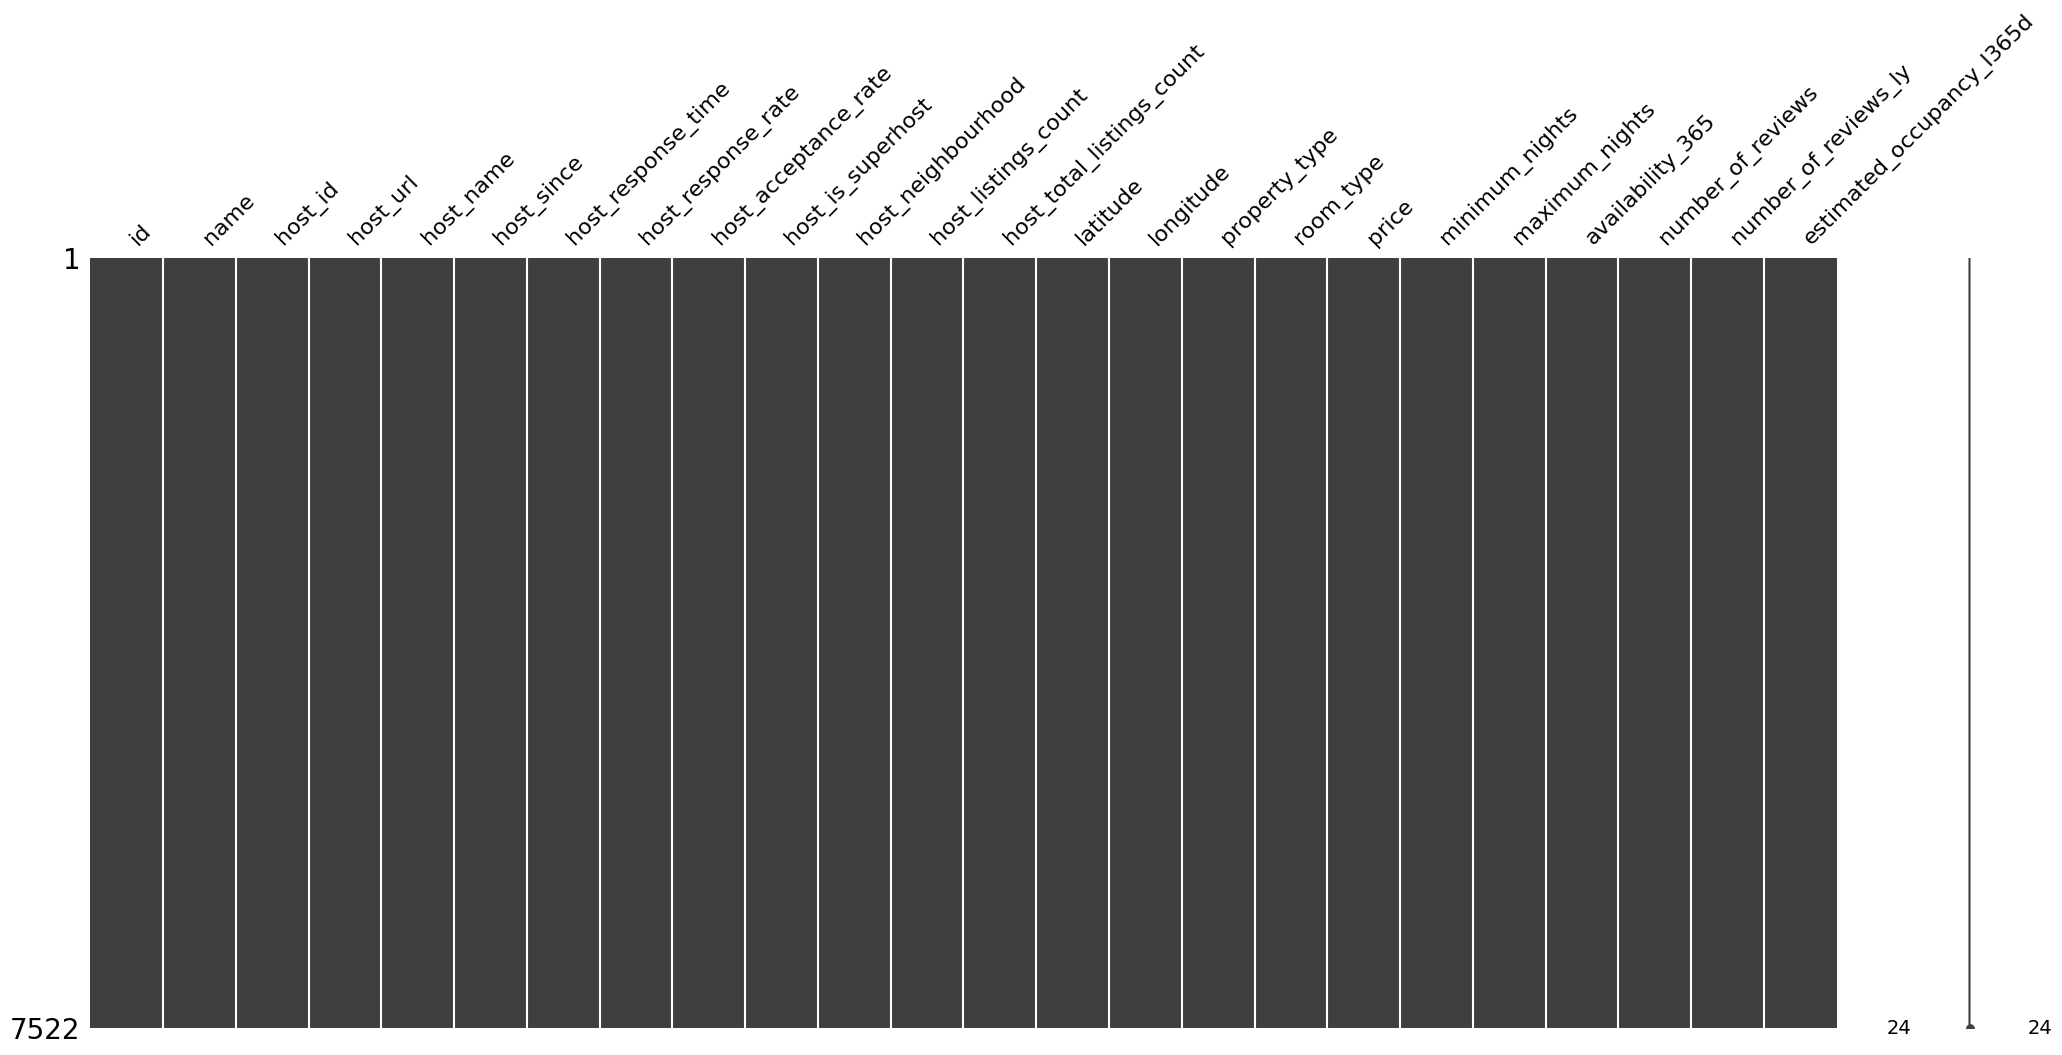

In [831]:
import missingno as msno

msno.matrix(anb_df_nwor_sample)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [832]:
# Write your code to make your dataset analysis ready.
# Cleaned Sample Datasets are now Copied into fresh Dataframes for Further Analysis

anb_df_chic_1 = anb_df_chic_sample
anb_df_nwor_1 = anb_df_nwor_sample

#### **Chicago**

##### 1) Overview of Airbnb

1) Popular Neighbourhoods

In [833]:
anb_df_chic_1_ngb_pop = anb_df_chic_1.groupby(['host_neighbourhood'])['host_neighbourhood'].count().reset_index(name = 'Count').sort_values('Count', ascending = False)
anb_df_chic_1_ngb_pop.head(10)

host_neighbourhood  Count
31           Cambridge    595
223          West Town    461
171        River North    390
120       Logan Square    382
36        Chicago Loop    251
227           Woodlawn    233
113       Lincoln Park    195
137    Near South Side    193
206             Uptown    179
22          Bridgeport    179

2) Average Price

In [834]:
anb_df_chic_1_ngb_rmt_avgprice = anb_df_chic_1.groupby(['host_neighbourhood', 'room_type'])['price'].mean().reset_index(name = 'Average Price')
anb_df_chic_1_ngb_rmt_avgprice

host_neighbourhood        room_type  Average Price
0           Acres Home  Entire home/apt      87.000000
1          Albany Park  Entire home/apt     209.642857
2          Albany Park     Private room      71.318182
3             Alhambra  Entire home/apt     253.000000
4        Andersonville  Entire home/apt     206.347826
..                 ...              ...            ...
372           Woodlawn     Private room      56.632000
373           Woodlawn      Shared room      56.500000
374       Wrigleyville  Entire home/apt     344.075758
375       Wrigleyville     Private room      62.000000
376       Wrigleyville      Shared room      56.500000

[377 rows x 3 columns]

In [835]:
anb_df_chic_1_rmt_cnt = anb_df_chic_1_ngb_rmt_avgprice.groupby(['room_type'])['room_type'].count().reset_index(name = 'Count')
anb_df_chic_1_rmt_cnt

room_type  Count
0  Entire home/apt    220
1       Hotel room     11
2     Private room    133
3      Shared room     13

In [836]:
# Entire home/apt

anb_df_chic_1_ngb_apt_avgprice = anb_df_chic_1_ngb_rmt_avgprice[anb_df_chic_1_ngb_rmt_avgprice['room_type'] == 'Entire home/apt'].sort_values('Average Price', ascending = False)
anb_df_chic_1_ngb_apt_avgprice.head(10)

host_neighbourhood        room_type  Average Price
123                 Gilchrist  Entire home/apt    1120.000000
356       West Loop/Greektown  Entire home/apt    1085.312500
88               East Liberty  Entire home/apt    1001.600000
236          Northwest Dallas  Entire home/apt     900.000000
80            Downtown Austin  Entire home/apt     796.000000
24              Ballast Point  Entire home/apt     696.000000
256                  Pangrati  Entire home/apt     684.666667
162  Jumeirah Beach Residence  Entire home/apt     613.150407
38        Bridgewater Corners  Entire home/apt     608.000000
36                 Bridgeport  Entire home/apt     575.987500

In [837]:
# Private room

anb_df_chic_1_ngb_pvt_avgprice = anb_df_chic_1_ngb_rmt_avgprice[anb_df_chic_1_ngb_rmt_avgprice['room_type'] == 'Private room'].sort_values('Average Price', ascending = False)
anb_df_chic_1_ngb_pvt_avgprice.head(10)

host_neighbourhood     room_type  Average Price
122    Gateway District  Private room   44760.133333
67     Clearwater Beach  Private room   37194.500000
125            Glenwood  Private room     618.000000
355           West Loop  Private room     475.000000
340  Washington Heights  Private room     460.000000
243              O'Hare  Private room     318.200000
289     Rush & Division  Private room     297.000000
322       Streeterville  Private room     265.538462
172      Lake View East  Private room     260.657895
296  Sheffield & DePaul  Private room     256.307692

In [838]:
# Shared room

anb_df_chic_1_ngb_shr_avgprice = anb_df_chic_1_ngb_rmt_avgprice[anb_df_chic_1_ngb_rmt_avgprice['room_type'] == 'Shared room'].sort_values('Average Price', ascending = False)
anb_df_chic_1_ngb_shr_avgprice.head(10)

host_neighbourhood    room_type  Average Price
131     Grand Crossing  Shared room     215.000000
201    Lower West Side  Shared room      72.000000
269       Pulaski Park  Shared room      65.500000
96           Edgewater  Shared room      65.000000
278        River North  Shared room      56.766667
373           Woodlawn  Shared room      56.500000
175           Lakeview  Shared room      56.500000
376       Wrigleyville  Shared room      56.500000
282        Rogers Park  Shared room      55.000000
155        Irving Park  Shared room      40.000000

In [839]:
# Hotel room

anb_df_chic_1_ngb_hot_avgprice = anb_df_chic_1_ngb_rmt_avgprice[anb_df_chic_1_ngb_rmt_avgprice['room_type'] == 'Hotel room'].sort_values('Average Price', ascending = False)
anb_df_chic_1_ngb_hot_avgprice.head(10)

host_neighbourhood   room_type  Average Price
66                       Clearwater Beach  Hotel room   41913.000000
54                             Central LA  Hotel room   40002.875000
293  Scottsdale Villa Mirage Resort Condo  Hotel room   40000.000000
121                      Gateway District  Hotel room   35168.250000
52              Central Business District  Hotel room   33659.107143
59                           Chicago Loop  Hotel room   20292.000000
43                       Brush / Stewarts  Hotel room     588.111111
276                           River North  Hotel room     503.208333
334                                Uptown  Hotel room     421.500000
364                             West Town  Hotel room     236.333333

3) Number of Listings

In [840]:
anb_df_chic_1_ngb_rmt_listcnt = anb_df_chic_1.groupby(['host_neighbourhood', 'room_type'])['room_type'].count().reset_index(name = 'Number of Listings')
anb_df_chic_1_ngb_rmt_listcnt

host_neighbourhood        room_type  Number of Listings
0           Acres Home  Entire home/apt                   1
1          Albany Park  Entire home/apt                  28
2          Albany Park     Private room                  22
3             Alhambra  Entire home/apt                   1
4        Andersonville  Entire home/apt                  46
..                 ...              ...                 ...
372           Woodlawn     Private room                 125
373           Woodlawn      Shared room                   1
374       Wrigleyville  Entire home/apt                  33
375       Wrigleyville     Private room                   2
376       Wrigleyville      Shared room                   1

[377 rows x 3 columns]

In [841]:
# Entire home/apt

anb_df_chic_1_ngb_apt_listcnt = anb_df_chic_1_ngb_rmt_listcnt[anb_df_chic_1_ngb_rmt_listcnt['room_type'] == 'Entire home/apt'].sort_values('Number of Listings', ascending = False)
anb_df_chic_1_ngb_apt_listcnt.head(10)

host_neighbourhood        room_type  Number of Listings
51           Cambridge  Entire home/apt                 595
363          West Town  Entire home/apt                 418
192       Logan Square  Entire home/apt                 313
275        River North  Entire home/apt                 276
221    Near South Side  Entire home/apt                 183
180       Lincoln Park  Entire home/apt                 177
58        Chicago Loop  Entire home/apt                 170
20            Avondale  Entire home/apt                 158
333             Uptown  Entire home/apt                 145
41         Bronzeville  Entire home/apt                 135

In [842]:
# Private room

anb_df_chic_1_ngb_pvt_listcnt = anb_df_chic_1_ngb_rmt_listcnt[anb_df_chic_1_ngb_rmt_listcnt['room_type'] == 'Private room'].sort_values('Number of Listings', ascending = False)
anb_df_chic_1_ngb_pvt_listcnt.head(10)

host_neighbourhood     room_type  Number of Listings
372              Woodlawn  Private room                 125
37             Bridgeport  Private room                  99
60           Chicago Loop  Private room                  78
118         Garfield Park  Private room                  65
194          Logan Square  Private room                  64
277           River North  Private room                  60
200       Lower West Side  Private room                  55
239  Northwest Washington  Private room                  47
187          Little Italy  Private room                  45
10          Armour Square  Private room                  43

In [843]:
# Shared room

anb_df_chic_1_ngb_shr_listcnt = anb_df_chic_1_ngb_rmt_listcnt[anb_df_chic_1_ngb_rmt_listcnt['room_type'] == 'Shared room'].sort_values('Number of Listings', ascending = False)
anb_df_chic_1_ngb_shr_listcnt.head(10)

host_neighbourhood    room_type  Number of Listings
278        River North  Shared room                  30
362         West Ridge  Shared room                  10
315         South Side  Shared room                   3
312        South Shore  Shared room                   3
269       Pulaski Park  Shared room                   2
201    Lower West Side  Shared room                   1
175           Lakeview  Shared room                   1
155        Irving Park  Shared room                   1
131     Grand Crossing  Shared room                   1
96           Edgewater  Shared room                   1

In [844]:
# Hotel room

anb_df_chic_1_ngb_hot_listcnt = anb_df_chic_1_ngb_rmt_listcnt[anb_df_chic_1_ngb_rmt_listcnt['room_type'] == 'Hotel room'].sort_values('Number of Listings', ascending = False)
anb_df_chic_1_ngb_hot_listcnt.head(10)

host_neighbourhood   room_type  Number of Listings
52              Central Business District  Hotel room                  28
276                           River North  Hotel room                  24
66                       Clearwater Beach  Hotel room                  16
364                             West Town  Hotel room                   9
43                       Brush / Stewarts  Hotel room                   9
54                             Central LA  Hotel room                   8
121                      Gateway District  Hotel room                   8
293  Scottsdale Villa Mirage Resort Condo  Hotel room                   6
193                          Logan Square  Hotel room                   5
59                           Chicago Loop  Hotel room                   3

##### 2) Property Analysis

1) Share of Property Types

In [845]:
anb_df_chic_1_propt_pop = anb_df_chic_1.groupby(['property_type'])['property_type'].count().reset_index(name = 'Count').sort_values('Count', ascending = False)
anb_df_chic_1_propt_pop.head(10)

property_type  Count
10           Entire rental unit   4487
27  Private room in rental unit    808
7                   Entire home    734
3                  Entire condo    694
24         Private room in home    543
34                Room in hotel    294
11    Entire serviced apartment    224
5            Entire guest suite    138
19        Private room in condo    131
12             Entire townhouse     94

2) Share of Room Types

In [846]:
anb_df_chic_1_rmt_pop = anb_df_chic_1.groupby(['room_type'])['room_type'].count().reset_index(name = 'Count').sort_values('Count', ascending = False)
anb_df_chic_1_rmt_pop.head(10)

room_type  Count
0  Entire home/apt   6525
2     Private room   1899
1       Hotel room    119
3      Shared room     56

##### 3) Pricing Analysis

1) Price vs Location for each Room Type

In [847]:
anb_df_chic_1_rmt_loc_price = anb_df_chic_1[['room_type', 'latitude', 'longitude', 'price']]
anb_df_chic_1_rmt_loc_price

room_type   latitude  longitude  price
0        Private room  41.787900 -87.587800  113.0
1     Entire home/apt  41.901660 -87.680210  100.0
2     Entire home/apt  41.911960 -87.639810  203.0
3        Private room  41.923570 -87.649470  288.0
4     Entire home/apt  41.919550 -87.700690  250.0
...               ...        ...        ...    ...
8599  Entire home/apt  41.708583 -87.666018   91.0
8600      Shared room  41.857508 -87.650075   72.0
8601  Entire home/apt  41.893531 -87.680907  246.0
8602     Private room  41.740820 -87.551220   13.0
8603  Entire home/apt  41.936135 -87.684047  148.0

[8599 rows x 4 columns]

2) Price vs Property Type

In [848]:
anb_df_chic_1_propt_price = anb_df_chic_1[['property_type', 'price']]
anb_df_chic_1_propt_price

property_type  price
0         Private room in condo  113.0
1            Entire rental unit  100.0
2            Entire rental unit  203.0
3        Room in boutique hotel  288.0
4                   Entire loft  250.0
...                         ...    ...
8599         Entire guest suite   91.0
8600  Shared room in guesthouse   72.0
8601                Entire home  246.0
8602       Private room in home   13.0
8603         Entire rental unit  148.0

[8599 rows x 2 columns]

3) Price vs Reviews

In [849]:
anb_df_chic_1_rmt_revs_price = anb_df_chic_1[['property_type', 'number_of_reviews', 'price']]
anb_df_chic_1_rmt_revs_price

property_type  number_of_reviews  price
0         Private room in condo                253  113.0
1            Entire rental unit                580  100.0
2            Entire rental unit                121  203.0
3        Room in boutique hotel                 18  288.0
4                   Entire loft                253  250.0
...                         ...                ...    ...
8599         Entire guest suite                  0   91.0
8600  Shared room in guesthouse                  0   72.0
8601                Entire home                  0  246.0
8602       Private room in home                  0   13.0
8603         Entire rental unit                  0  148.0

[8599 rows x 3 columns]

##### 4) Host Analysis

1) Correlation Between Numerics for Normal Host

In [850]:
anb_df_chic_1_norm_host = anb_df_chic_1[anb_df_chic_1['host_is_superhost'] == 'f']
anb_df_chic_1_norm_host

id                                               name  \
0                    2384          Hyde Park - Walk to University of Chicago   
3                   12140                           Lincoln Park Guest House   
13                 225314  Cozy & comfy with AC close to California Blue ...   
15                 250354                    Close to Michigan Ave and parks   
16                 264547                 Steps From the Best Chicago Offers   
...                   ...                                                ...   
8598  1442819197612864726                                           Room h10   
8599  1442999473408985878      Beverly Garden Guest Suite w/Private Entrance   
8600  1443049112706179371                            Pilsen Cozy Coach House   
8601  1443390371737395805  Best summer house 2B amazing location free par...   
8602  1443553474639916674                                            Room h8   

        host_id                                     host_url        host_name  \
0          2613       https://www.airbnb.com/users/show/2613          Rebecca   
3         46734      https://www.airbnb.com/users/show/46734  Shay And Robert   
13      1173654    https://www.airbnb.com/users/show/1173654          Jillian   
15      1311953    https://www.airbnb.com/users/show/1311953           Ronald   
16      1387948    https://www.airbnb.com/users/show/1387948          Dominic   
...         ...                                          ...              ...   
8598  327103193  https://www.airbnb.com/users/show/327103193            Jorge   
8599  173728310  https://www.airbnb.com/users/show/173728310              Ray   
8600  681633386  https://www.airbnb.com/users/show/681633386            Paula   
8601  238767044  https://www.airbnb.com/users/show/238767044             Haim   
8602  327103193  https://www.airbnb.com/users/show/327103193            Jorge   

      host_since  host_response_time host_response_rate host_acceptance_rate  \
0     2008-08-29      within an hour               100%                  76%   
3     2009-10-18  within a few hours               100%                  67%   
13    2011-09-17  within a few hours               100%                  80%   
15    2011-10-19  within a few hours               100%                  97%   
16    2011-11-09  within a few hours               100%                  97%   
...          ...                 ...                ...                  ...   
8598  2020-01-13      within an hour                98%                  66%   
8599  2018-02-16      within an hour               100%                 100%   
8600  2025-02-28      within an hour               100%                 100%   
8601  2019-01-24      within an hour                88%                 100%   
8602  2020-01-13      within an hour                98%                  66%   

     host_is_superhost       host_neighbourhood  host_listings_count  \
0                    f                Hyde Park                  1.0   
3                    f             Lincoln Park                  1.0   
13                   f             Logan Square                  1.0   
15                   f  South Loop/Printers Row                  1.0   
16                   f      West Loop/Greektown                  1.0   
...                ...                      ...                  ...   
8598                 f            South Chicago                 19.0   
8599                 f             East Beverly                  2.0   
8600                 f          Lower West Side                  2.0   
8601                 f   West Town/Noble Square                  5.0   
8602                 f            South Chicago                 19.0   

      host_total_listings_count   latitude  longitude  \
0                           1.0  41.787900 -87.587800   
3                           1.0  41.923570 -87.649470   
13                          2.0  41.925890 -87.697370   
15                          2.0  41

1) Correlation Between Numerics for Super Host

In [851]:
anb_df_chic_1_sup_host = anb_df_chic_1[anb_df_chic_1['host_is_superhost'] == 't']
anb_df_chic_1_sup_host

id                                               name  \
1                    7126                Tiny Studio Apartment 94 Walk Score   
2                   10945                              The Biddle House (#1)   
4                   28749         Quirky Bucktown Loft w/ Parking No Parties   
5                   71930                            Rest, Relax and Explore   
6                   94450                Comfy Garden Suite in Andersonville   
...                   ...                                                ...   
8588  1440846677673841805       Theater, Game Room AND Gym! Firepit 4BR Home   
8589  1441377109837464533     Chic & Cozy Boho Vibe in Heart of Logan Square   
8590  1441481632693900669  Hyde Park A+ Location Brand New w Private Bath...   
8594  1442379269172941422                       Chicago Getaway - Upper Deck   
8603  1444414413460064139          MTR~Patio~PetFriendly~FreeParking~KingBed   

        host_id                                     host_url  \
1         17928      https://www.airbnb.com/users/show/17928   
2         33004      https://www.airbnb.com/users/show/33004   
4         27506      https://www.airbnb.com/users/show/27506   
5        334241     https://www.airbnb.com/users/show/334241   
6        504470     https://www.airbnb.com/users/show/504470   
...         ...                                          ...   
8588  514620802  https://www.airbnb.com/users/show/514620802   
8589   88547320   https://www.airbnb.com/users/show/88547320   
8590   31378386   https://www.airbnb.com/users/show/31378386   
8594  351692215  https://www.airbnb.com/users/show/351692215   
8603  535948736  https://www.airbnb.com/users/show/535948736   

                 host_name  host_since host_response_time host_response_rate  \
1                    Sarah  2009-05-19     within an hour               100%   
2              At Home Inn  2009-08-21       within a day                94%   
4                    Lauri  2009-07-25       within a day               100%   
5     Michael And Veronica  2011-01-03     within an hour               100%   
6                     Mark  2011-04-12     within an hour               100%   
...                    ...         ...                ...                ...   
8588                   Bre  2023-05-13     within an hour               100%   
8589                 Laura  2016-08-07     within an hour               100%   
8590             Brendan T  2015-04-17     within an hour               100%   
8594                Damien  2020-06-24     within an hour               100%   
8603              Santonio  2023-09-07     within an hour               100%   

     host_acceptance_rate host_is_superhost host_neighbourhood  \
1                    100%                 t  Ukrainian Village   
2                     94%                 t           Old Town   
4                     86%                 t           Bucktown   
5                    100%                 t  Ukrainian Village   
6                     91%                 t      Andersonville   
...                   ...               ...                ...   
8588                  99%                 t          Gulf Cove   
8589                  99%                 t    Lower West Side   
8590                  48%                 t          Hyde Park   
8594                  90%                 t        Irving Park   
8603                  93%                 t      West Lakeview   

      host_listings_count  host_total_listings_count   latitude  longitude  \
1                     1.0                        2.0  41.901660 -87.680210   
2                    10.0                       87.0  41.911960 -87.639810   
4                     1.0                        7.0  41.919550 -87.700690   
5                     1.0                        3.0  41.896150 -87.679340   
6                     1.0                        3.0  41.979600 -87.665120   
...                   ...                        ...        ...        

#### **New Orleans**

##### 1) Overview of Airbnb

1) Popular Neighbourhoods

In [852]:
anb_df_nwor_1_ngb_pop = anb_df_nwor_1.groupby(['host_neighbourhood'])['host_neighbourhood'].count().reset_index(name = 'Count').sort_values('Count', ascending = False)
anb_df_nwor_1_ngb_pop.head(10)

host_neighbourhood  Count
14   Central Business District   1262
15                Central City    468
91                    Mid-City    318
120               Seventh Ward    313
82       Lower Garden District    284
85             Marigny/Bywater    284
142                      Treme    223
143            Tremé / Lafitte    211
134                 St. Claude    173
144           Tulane - Gravier    164

2) Average Price

In [853]:
anb_df_nwor_1_ngb_rmt_avgprice = anb_df_nwor_1.groupby(['host_neighbourhood', 'room_type'])['price'].mean().reset_index(name = 'Average Price')
anb_df_nwor_1_ngb_rmt_avgprice

host_neighbourhood        room_type  Average Price
0            11th Ward  Entire home/apt     169.813953
1            11th Ward     Private room     103.666667
2           Adams Park  Entire home/apt      92.000000
3              Algiers  Entire home/apt     161.071429
4              Algiers     Private room     105.842105
..                 ...              ...            ...
267            Whitney  Entire home/apt     112.333333
268            Whitney     Private room     124.000000
269      Yarmouth Port  Entire home/apt     525.500000
270        Zephyr Cove  Entire home/apt     275.000000
271       داماك هيلز 2  Entire home/apt     499.000000

[272 rows x 3 columns]

In [854]:
anb_df_nwor_1_rmt_cnt = anb_df_nwor_1_ngb_rmt_avgprice.groupby(['room_type'])['room_type'].count().reset_index(name = 'Count')
anb_df_nwor_1_rmt_cnt

room_type  Count
0  Entire home/apt    155
1       Hotel room     11
2     Private room    101
3      Shared room      5

In [855]:
# Entire home/apt

anb_df_nwor_1_ngb_apt_avgprice = anb_df_nwor_1_ngb_rmt_avgprice[anb_df_nwor_1_ngb_rmt_avgprice['room_type'] == 'Entire home/apt'].sort_values('Average Price', ascending = False)
anb_df_nwor_1_ngb_apt_avgprice.head(10)

host_neighbourhood        room_type  Average Price
125                     Kenner  Entire home/apt    5124.000000
50            Downtown Houston  Entire home/apt    1264.000000
105  Historic District - North  Entire home/apt     663.065217
162                    Midtown  Entire home/apt     656.428571
254                Valley View  Entire home/apt     582.416667
269              Yarmouth Port  Entire home/apt     525.500000
131                   Lakeview  Entire home/apt     512.840000
271               داماك هيلز 2  Entire home/apt     499.000000
172           New Orleans East  Entire home/apt     432.000000
169            National Harbor  Entire home/apt     360.000000

In [856]:
# Private room

anb_df_nwor_1_ngb_pvt_avgprice = anb_df_nwor_1_ngb_rmt_avgprice[anb_df_nwor_1_ngb_rmt_avgprice['room_type'] == 'Private room'].sort_values('Average Price', ascending = False)
anb_df_nwor_1_ngb_pvt_avgprice.head(10)

host_neighbourhood     room_type  Average Price
49         Downtown Austin  Private room     783.083333
166                  Milan  Private room     595.000000
69      Faubourg Livaudais  Private room     590.000000
13          Bayou St. John  Private room     519.357143
141  Lower Garden District  Private room     425.333333
211            South Beach  Private room     410.000000
43                 Dillard  Private room     350.000000
171                Navarre  Private room     342.000000
124            Kailua/Kona  Private room     317.000000
245       Tulane - Gravier  Private room     294.428571

In [857]:
# Shared room

anb_df_nwor_1_ngb_shr_avgprice = anb_df_nwor_1_ngb_rmt_avgprice[anb_df_nwor_1_ngb_rmt_avgprice['room_type'] == 'Shared room'].sort_values('Average Price', ascending = False)
anb_df_nwor_1_ngb_shr_avgprice.head(10)

host_neighbourhood    room_type  Average Price
133                   Lakeview  Shared room          250.0
95            Gentilly Terrace  Shared room          185.0
74                     Filmore  Shared room          117.5
30                Central City  Shared room           50.0
27   Central Business District  Shared room           19.0

In [858]:
# Hotel room

anb_df_nwor_1_ngb_hot_avgprice = anb_df_nwor_1_ngb_rmt_avgprice[anb_df_nwor_1_ngb_rmt_avgprice['room_type'] == 'Hotel room'].sort_values('Average Price', ascending = False)
anb_df_nwor_1_ngb_hot_avgprice.head(10)

host_neighbourhood   room_type  Average Price
21                       Brush / Stewarts  Hotel room   50000.000000
34                       Clearwater Beach  Hotel room   42000.000000
201  Scottsdale Villa Mirage Resort Condo  Hotel room   41666.666667
25              Central Business District  Hotel room   19431.333333
210                           South Beach  Hotel room     320.166667
90                       Gateway District  Hotel room     267.500000
175                 New Orleans East Area  Hotel room     238.000000
157                              Mid-City  Hotel room     214.500000
226                            St. Claude  Hotel room     189.000000
81                         French Quarter  Hotel room     142.833333

3) Number of Listings

In [859]:
anb_df_nwor_1_ngb_rmt_listcnt = anb_df_nwor_1.groupby(['host_neighbourhood', 'room_type'])['room_type'].count().reset_index(name = 'Number of Listings')
anb_df_nwor_1_ngb_rmt_listcnt

host_neighbourhood        room_type  Number of Listings
0            11th Ward  Entire home/apt                  43
1            11th Ward     Private room                   3
2           Adams Park  Entire home/apt                   3
3              Algiers  Entire home/apt                 126
4              Algiers     Private room                  19
..                 ...              ...                 ...
267            Whitney  Entire home/apt                  12
268            Whitney     Private room                   1
269      Yarmouth Port  Entire home/apt                   2
270        Zephyr Cove  Entire home/apt                   2
271       داماك هيلز 2  Entire home/apt                   1

[272 rows x 3 columns]

In [860]:
# Entire home/apt

anb_df_nwor_1_ngb_apt_listcnt = anb_df_nwor_1_ngb_rmt_listcnt[anb_df_nwor_1_ngb_rmt_listcnt['room_type'] == 'Entire home/apt'].sort_values('Number of Listings', ascending = False)
anb_df_nwor_1_ngb_apt_listcnt.head(10)

host_neighbourhood        room_type  Number of Listings
24   Central Business District  Entire home/apt                1081
28                Central City  Entire home/apt                 387
156                   Mid-City  Entire home/apt                 273
202               Seventh Ward  Entire home/apt                 272
140      Lower Garden District  Entire home/apt                 263
146            Marigny/Bywater  Entire home/apt                 240
240                      Treme  Entire home/apt                 186
242            Tremé / Lafitte  Entire home/apt                 179
244           Tulane - Gravier  Entire home/apt                 136
225                 St. Claude  Entire home/apt                 133

In [861]:
# Private room

anb_df_nwor_1_ngb_pvt_listcnt = anb_df_nwor_1_ngb_rmt_listcnt[anb_df_nwor_1_ngb_rmt_listcnt['room_type'] == 'Private room'].sort_values('Number of Listings', ascending = False)
anb_df_nwor_1_ngb_pvt_listcnt.head(10)

host_neighbourhood     room_type  Number of Listings
26   Central Business District  Private room                 129
29                Central City  Private room                  78
147            Marigny/Bywater  Private room                  44
203               Seventh Ward  Private room                  41
158                   Mid-City  Private room                  39
241                      Treme  Private room                  37
227                 St. Claude  Private room                  34
243            Tremé / Lafitte  Private room                  32
245           Tulane - Gravier  Private room                  28
145                    Marigny  Private room                  26

In [862]:
# Shared room

anb_df_nwor_1_ngb_shr_listcnt = anb_df_nwor_1_ngb_rmt_listcnt[anb_df_nwor_1_ngb_rmt_listcnt['room_type'] == 'Shared room'].sort_values('Number of Listings', ascending = False)
anb_df_nwor_1_ngb_shr_listcnt.head(10)

host_neighbourhood    room_type  Number of Listings
30                Central City  Shared room                   3
27   Central Business District  Shared room                   1
74                     Filmore  Shared room                   1
95            Gentilly Terrace  Shared room                   1
133                   Lakeview  Shared room                   1

In [863]:
# Hotel room

anb_df_nwor_1_ngb_hot_listcnt = anb_df_nwor_1_ngb_rmt_listcnt[anb_df_nwor_1_ngb_rmt_listcnt['room_type'] == 'Hotel room'].sort_values('Number of Listings', ascending = False)
anb_df_nwor_1_ngb_hot_listcnt.head(10)

host_neighbourhood   room_type  Number of Listings
25              Central Business District  Hotel room                  51
90                       Gateway District  Hotel room                  15
201  Scottsdale Villa Mirage Resort Condo  Hotel room                  12
34                       Clearwater Beach  Hotel room                  10
226                            St. Claude  Hotel room                   6
157                              Mid-City  Hotel room                   6
81                         French Quarter  Hotel room                   6
210                           South Beach  Hotel room                   6
102                         Highland Park  Hotel room                   3
21                       Brush / Stewarts  Hotel room                   1

##### 2) Property Analysis

1) Share of Property Types

In [864]:
anb_df_nwor_1_propt_pop = anb_df_nwor_1.groupby(['property_type'])['property_type'].count().reset_index(name = 'Count').sort_values('Count', ascending = False)
anb_df_nwor_1_propt_pop.head(10)

property_type  Count
10                        Entire home   2759
13                 Entire rental unit   1929
6                        Entire condo    983
29               Private room in home    319
41                      Room in hotel    315
16                   Entire townhouse    181
8                  Entire guest suite    174
9                   Entire guesthouse    150
21  Private room in bed and breakfast    110
15          Entire serviced apartment    100

2) Share of Room Types

In [865]:
anb_df_nwor_1_rmt_pop = anb_df_nwor_1.groupby(['room_type'])['room_type'].count().reset_index(name = 'Count').sort_values('Count', ascending = False)
anb_df_nwor_1_rmt_pop.head(10)

room_type  Count
0  Entire home/apt   6474
2     Private room    924
1       Hotel room    117
3      Shared room      7

##### 3) Pricing Analysis

1) Price vs Location for each Room Type

In [866]:
anb_df_nwor_1_rmt_loc_price = anb_df_nwor_1[['room_type', 'latitude', 'longitude', 'price']]
anb_df_nwor_1_rmt_loc_price

room_type   latitude  longitude  price
0     Entire home/apt  29.961000 -90.119500   62.0
1     Entire home/apt  29.961530 -90.043640  150.0
2     Entire home/apt  29.978030 -90.074500  128.0
3     Entire home/apt  29.964480 -90.036670  121.0
4        Private room  29.968110 -90.059050   80.0
...               ...        ...        ...    ...
7517  Entire home/apt  29.975010 -90.052740  106.0
7518  Entire home/apt  29.943146 -90.083162   89.0
7519  Entire home/apt  29.966019 -90.067761  789.0
7520  Entire home/apt  29.961450 -90.040630  477.0
7521  Entire home/apt  29.970654 -90.069775   81.0

[7522 rows x 4 columns]

2) Price vs Property Type

In [867]:
anb_df_nwor_1_propt_price = anb_df_nwor_1[['property_type', 'price']]
anb_df_nwor_1_propt_price

property_type  price
0       Entire rental unit   62.0
1       Entire rental unit  150.0
2       Entire rental unit  128.0
3       Entire guest suite  121.0
4     Private room in home   80.0
...                    ...    ...
7517           Entire home  106.0
7518           Entire home   89.0
7519           Entire home  789.0
7520      Entire townhouse  477.0
7521    Entire rental unit   81.0

[7522 rows x 2 columns]

3) Price vs Reviews

In [868]:
anb_df_nwor_1_rmt_revs_price = anb_df_nwor_1[['property_type', 'number_of_reviews', 'price']]
anb_df_nwor_1_rmt_revs_price

property_type  number_of_reviews  price
0       Entire rental unit                504   62.0
1       Entire rental unit                316  150.0
2       Entire rental unit                781  128.0
3       Entire guest suite                506  121.0
4     Private room in home                989   80.0
...                    ...                ...    ...
7517           Entire home                  0  106.0
7518           Entire home                  1   89.0
7519           Entire home                  0  789.0
7520      Entire townhouse                  0  477.0
7521    Entire rental unit                  0   81.0

[7522 rows x 3 columns]

##### 4) Host Analysis

1) Correlation Between Numerics for Normal Host

In [869]:
anb_df_nwor_1_norm_host = anb_df_nwor_1[anb_df_nwor_1['host_is_superhost'] == 'f']
anb_df_nwor_1_norm_host

id                                               name  \
0                   19091                     Fully Furnished Cozy Apartment   
5                   84725                 Historic UPTOWN NEW ORLEANS Resort   
6                   90806                Mid-city.  The heart of New Orleans   
8                  184478                           Northside Bayou Quarters   
9                  204998  Hilaire Suite - 2 Bed 2.5 Bath near French Qua...   
...                   ...                                                ...   
7514  1436469633680922919  Amazing Stay In The Business District | Restau...   
7515  1436556906565678527           2BD Shotgun House - Affordable and Quiet   
7516  1436999105665762091         Spacious 3BR Condo Close to French Quarter   
7517  1437001697822994540          Serenity in the city - monthly stays only   
7518  1437105091795736568                          Heart of New Orleans Stay   

        host_id                                     host_url  \
0         72880      https://www.airbnb.com/users/show/72880   
5         85132      https://www.airbnb.com/users/show/85132   
6        485705     https://www.airbnb.com/users/show/485705   
8        884946     https://www.airbnb.com/users/show/884946   
9       1006034    https://www.airbnb.com/users/show/1006034   
...         ...                                          ...   
7514  599144508  https://www.airbnb.com/users/show/599144508   
7515  482286586  https://www.airbnb.com/users/show/482286586   
7516  442924771  https://www.airbnb.com/users/show/442924771   
7517     533632     https://www.airbnb.com/users/show/533632   
7518  573332412  https://www.airbnb.com/users/show/573332412   

                            host_name  host_since host_response_time  \
0                                John  2010-01-23     within an hour   
5                       Sanford Sandy  2010-02-24     within an hour   
6                            Thomas J  2011-04-05     within an hour   
8                             DJoseph  2011-07-28     within an hour   
9                           Gwendolyn  2011-08-22     within an hour   
...                               ...         ...                ...   
7514                          Lovelyn  2024-08-30     within an hour   
7515                  Gravier Village  2022-10-04     within an hour   
7516  Hosteeva Carondelet Luxe Condos  2022-01-31     within an hour   
7517                            Hywel  2011-04-25     within an hour   
7518                            Chevy  2024-04-20     within an hour   

     host_response_rate host_acceptance_rate host_is_superhost  \
0                  100%                 100%                 f   
5                   94%                   7%                 f   
6                   94%                 100%                 f   
8                  100%                  99%                 f   
9                  100%                   0%                 f   
...                 ...                  ...               ...   
7514               100%                 100%                 f   
7515               100%                 100%                 f   
7516               100%                  99%                 f   
7517               100%                  99%                 f   
7518               100%                 100%                 f   

             host_neighbourhood  host_listings_count  \
0                     Riverbend                    1   
5                   Kailua/Kona                   95   
6                      Mid City                    1   
8                       Filmore                    1   
9                         Treme                    5   
...                         ...                  ...   
7514  Central Business District                    2   
7515                   Mid-City                    5   
7516               Central City                   16   
7517                   St. Roch                    1   
7518               

1) Correlation Between Numerics for Super Host

In [870]:
anb_df_nwor_1_sup_host = anb_df_nwor_1[anb_df_nwor_1['host_is_superhost'] == 't']
anb_df_nwor_1_sup_host

id                                              name  \
1                   71624                Ravenwood Manor (Historic Bywater)   
2                   79536                 FeelAtHomeInNewOrleans-PrivateApt   
3                   79609                       Bywater's Original & Finest   
4                   80869                        Frenchmen House "Red Room"   
7                  183207                       Frenchmen House "Rose Room"   
...                   ...                                               ...   
7484  1431233258464116500            Pet Friendly Close to Uptown Hospitals   
7505  1435029403064853856                  Pet Friendly 30 Day Stay | Treme   
7519  1437122945389321569              Historic 8BR Inn with Pool | Hot Tub   
7520  1437125024759901546  Peaceful Bywater Home | Heated Pool | Quiet Stay   
7521  1438449438056689667          Incredible Historic 1br in 1800s Mansion   

        host_id                                     host_url host_name  \
1        367223     https://www.airbnb.com/users/show/367223     Susan   
2        428362     https://www.airbnb.com/users/show/428362    Miriam   
3        428909     https://www.airbnb.com/users/show/428909   Stephen   
4        437783     https://www.airbnb.com/users/show/437783    Joanne   
7        437783     https://www.airbnb.com/users/show/437783    Joanne   
...         ...                                          ...       ...   
7484  459989161  https://www.airbnb.com/users/show/459989161     Jesse   
7505  459989161  https://www.airbnb.com/users/show/459989161     Jesse   
7519  659906641  https://www.airbnb.com/users/show/659906641    Daniel   
7520  276892829  https://www.airbnb.com/users/show/276892829    Daniel   
7521  112910785  https://www.airbnb.com/users/show/112910785   Marigny   

      host_since host_response_time host_response_rate host_acceptance_rate  \
1     2011-01-29     within an hour               100%                  47%   
2     2011-03-07     within an hour               100%                  99%   
3     2011-03-07     within an hour               100%                 100%   
4     2011-03-12     within an hour               100%                  99%   
7     2011-03-12     within an hour               100%                  99%   
...          ...                ...                ...                  ...   
7484  2022-05-20     within an hour               100%                  91%   
7505  2022-05-20     within an hour               100%                  91%   
7519  2024-10-31     within an hour               100%                 100%   
7520  2019-07-17     within an hour               100%                 100%   
7521  2017-01-23     within an hour                99%                 100%   

     host_is_superhost         host_neighbourhood  host_listings_count  \
1                    t                    Bywater                    1   
2                    t               Seventh Ward                    1   
3                    t            Marigny/Bywater                    1   
4                    t            Marigny/Bywater                    2   
7                    t            Marigny/Bywater                    2   
...                ...                        ...                  ...   
7484                 t              Irish Channel                   21   
7505                 t              Irish Channel                   21   
7519                 t               Seventh Ward                    4   
7520                 t                    Midtown                  159   
7521                 t  Central Business District                   86   

      host_total_listings_count   latitude  longitude         property_type  \
1                             2  29.961530 -90.043640    Entire rental unit   
2                             1  29.978030 -90.074500    Entire rental unit   
3                             1  29.964480 -90.036670    Entire guest suite   
4                             3

### What all manipulations have you done and insights you found?

Data Manipulations Performed
Handling Missing Host Information:

host_is_superhost: Filled all missing values with 'f' (indicating “not a superhost”) to ensure binary consistency.

host_response_time, host_response_rate, host_acceptance_rate: Applied forward fill (ffill) to propagate the most recent non-null value downwards, preserving realistic host behaviour patterns from nearby records.

Handling Missing Geographic Details:

host_neighbourhood: Used latitude and longitude to assign a neighbourhood via the centroid method, ensuring accurate mapping even when the explicit neighbourhood name was missing.

Handling Missing Pricing Data:

price: Filled missing values with the median price specific to the host_neighbourhood and room_type combination. This preserved local market dynamics and avoided biasing prices towards extremes.

Insights Derived from Cleaned Data
Neighbourhood Trends:

In Chicago, Cambridge emerged as the most active neighbourhood with nearly 600 listings. Pricing in luxury zones like Gilchrist and West Loop exceeded USD 1,000 on average, while other areas were significantly more affordable.

In New Orleans, the Central Business District dominated with almost 1,200 listings, indicating a highly centralised Airbnb market compared to Chicago’s more dispersed listing pattern.

Property & Room Type Distribution:

Entire homes/apartments dominated both cities, accounting for 52% of listings in Chicago and over 85% in New Orleans, leaving limited market share for shared rooms and boutique hotel stays.

Pricing Patterns:

High-demand luxury pockets saw significant price spikes (e.g., private rooms in Gateway District, Chicago, averaging over $40,000; hotel rooms in New Orleans reaching USD 50,000 in rare cases).

Geographic mapping showed luxury concentrations slightly west of Chicago’s centre and in the southern areas of New Orleans.

Review & Price Correlation:

Scatter plots in both cities revealed negative correlations between price and review counts—lower-priced listings consistently attracted more reviews, pointing to strong price sensitivity in both markets.

Host Performance Analysis:

Superhosts demonstrated higher occupancy rates and better review metrics, but pricing advantage was marginal.

For both normal hosts and superhosts, minimum night requirements showed a mild negative correlation with review counts, suggesting that lowering the stay requirement could boost engagement.

Summary:
The null-handling process ensured no loss of critical records by logically imputing missing host, geographic, and pricing data. This data cleaning allowed for a more reliable comparative analysis between Chicago and New Orleans, leading to actionable insights on neighbourhood demand, property type dominance, pricing sensitivity, and host strategies.

## ***4. Chicago : Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Bar Char - Top 10 Popular Host Neighbourhoods in Chicago

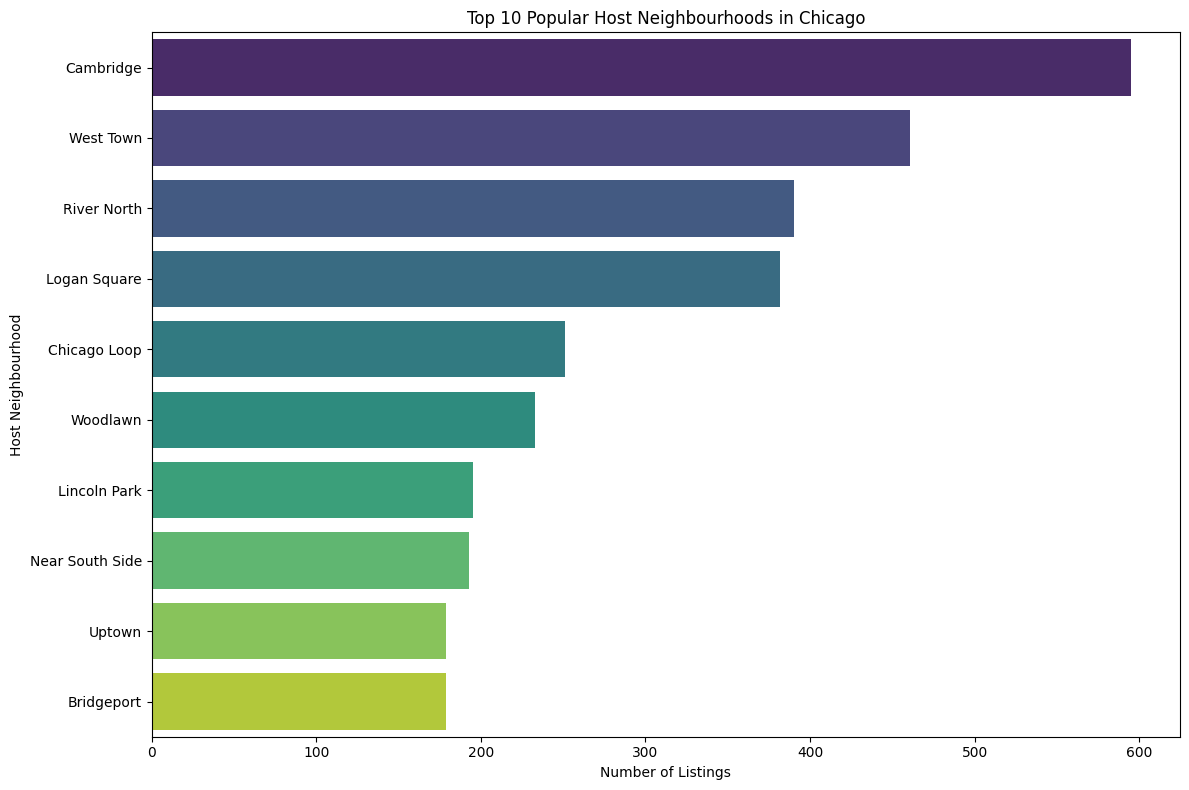

In [871]:
# Chart - 1 visualization code

plt.figure(figsize = (12, 8))
sns.barplot(x = 'Count', y = 'host_neighbourhood', data = anb_df_chic_1_ngb_pop.head(10), hue = 'host_neighbourhood', palette = 'viridis')
plt.title('Top 10 Popular Host Neighbourhoods in Chicago')
plt.xlabel('Number of Listings')
plt.ylabel('Host Neighbourhood')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A Bar Chart displays categorical data with rectangular bars. It helps compare different groups by showing the frequency or value of each category, making trends and differences easy to identify.

##### 2. What is/are the insight(s) found from the chart?

With Almost 600 Listings, Cambridge Neighbourhood has the Highest Number of Listings in Chicago. The other 9 in the Top 10 are 400 and below.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this will create a Positive Business Impact.

Because, Hosts now know where are the places with high amount of listings, which indicate to Opportunities or Market Saturation.  

#### Chart - 2 - Bar Chart - Average Price by Host Neighbourhood and Room Type in Chicago

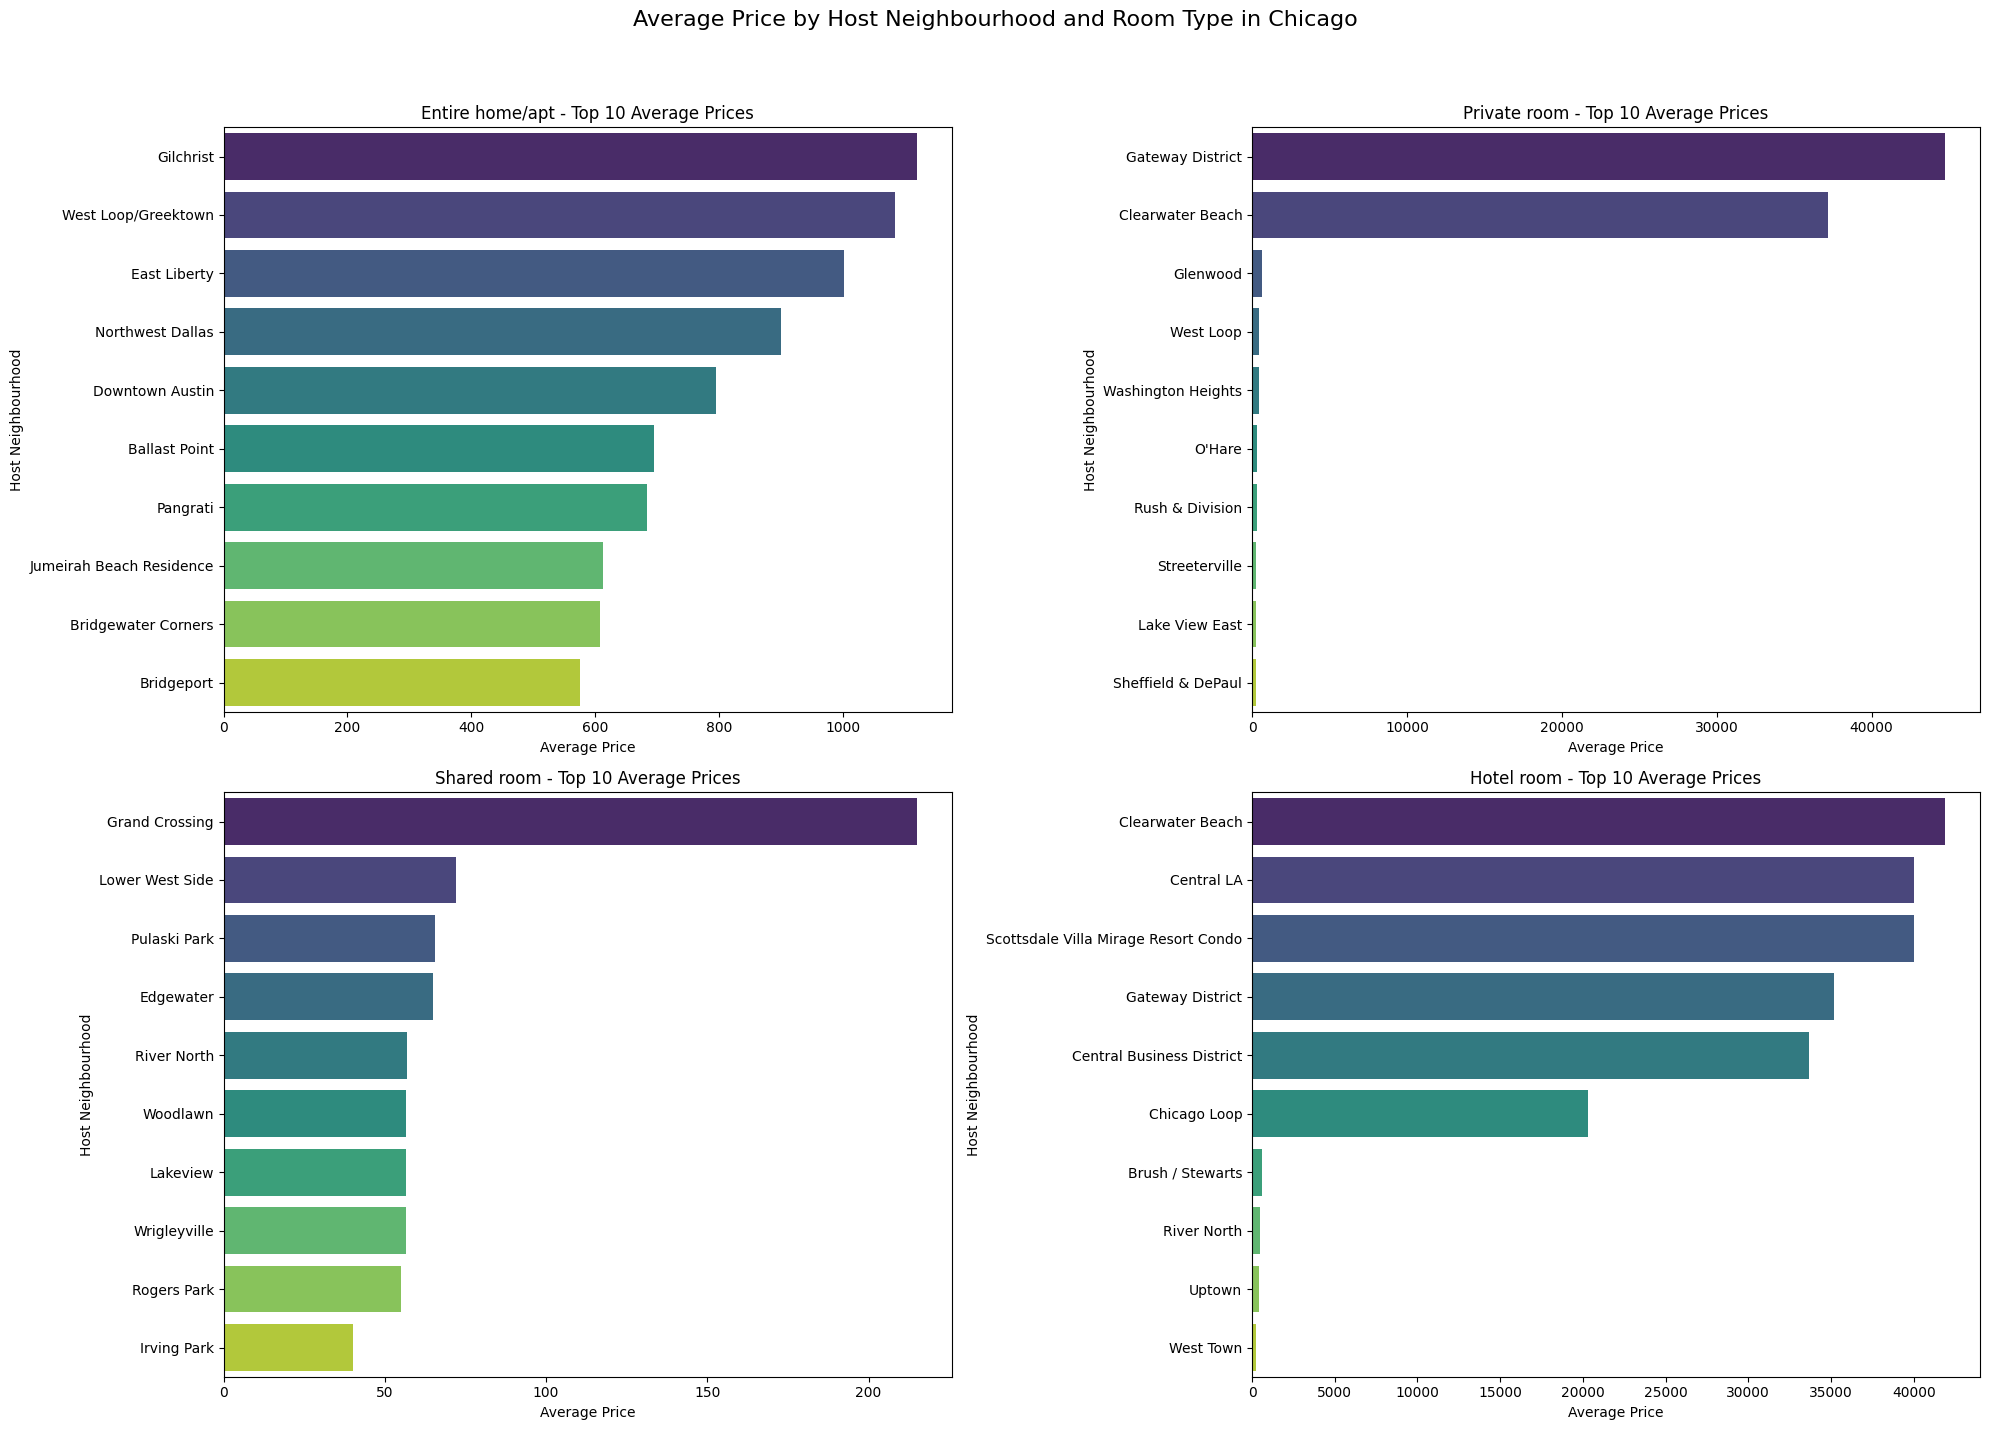

In [872]:
# Chart - 2 visualization code

fig, axes = plt.subplots(2, 2, figsize = (20, 15))
fig.suptitle('Average Price by Host Neighbourhood and Room Type in Chicago', fontsize = 16)

# Entire home/apt
sns.barplot(ax = axes[0, 0], x = 'Average Price', y = 'host_neighbourhood', data = anb_df_chic_1_ngb_apt_avgprice.head(10), hue = 'host_neighbourhood', palette = 'viridis')
axes[0, 0].set_title('Entire home/apt - Top 10 Average Prices')
axes[0, 0].set_xlabel('Average Price')
axes[0, 0].set_ylabel('Host Neighbourhood')

# Private room
sns.barplot(ax = axes[0, 1], x = 'Average Price', y = 'host_neighbourhood', data = anb_df_chic_1_ngb_pvt_avgprice.head(10), hue = 'host_neighbourhood', palette = 'viridis')
axes[0, 1].set_title('Private room - Top 10 Average Prices')
axes[0, 1].set_xlabel('Average Price')
axes[0, 1].set_ylabel('Host Neighbourhood')

# Shared room
sns.barplot(ax = axes[1, 0], x = 'Average Price', y = 'host_neighbourhood', data = anb_df_chic_1_ngb_shr_avgprice.head(10), hue = 'host_neighbourhood', palette = 'viridis')
axes[1, 0].set_title('Shared room - Top 10 Average Prices')
axes[1, 0].set_xlabel('Average Price')
axes[1, 0].set_ylabel('Host Neighbourhood')

# Hotel room
sns.barplot(ax = axes[1, 1], x = 'Average Price', y = 'host_neighbourhood', data = anb_df_chic_1_ngb_hot_avgprice.head(10), hue = 'host_neighbourhood', palette = 'viridis')
axes[1, 1].set_title('Hotel room - Top 10 Average Prices')
axes[1, 1].set_xlabel('Average Price')
axes[1, 1].set_ylabel('Host Neighbourhood')

# Adjusting layout to prevent title overlap
plt.tight_layout(rect = [0, 0.03, 1, 0.95])
plt.show()

##### 1. Why did you pick the specific chart?

A Bar Chart displays categorical data with rectangular bars. It helps compare different groups by showing the frequency or value of each category, making trends and differences easy to identify.

##### 2. What is/are the insight(s) found from the chart?

Entire home/apt:- Gilchrist, Westloop and East Liberty neighbourhoods have over 1000 as average price, rest are below it.

Private room:- Gateway District and Clear Water Beach have 40,000 and above as the average price, rest are barely upto 1000.

Shared room:- Only Grand Crossing is above 200, rest are all below 100.

Hotel room:- 6 Neighbourhoods from, Clearwater Beach at above 40,000 to Chicago Loop at 20,000, the rest of them are all 1000 or less.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this will create a Positive Business Impact.

Because, Hosts now know where are the places with high average priced listings, which indicate to Opportunities by offerring cheaper alternatives to capture the market or craft other strategies.

#### Chart - 3 - Bar Chart - Number of Listings by Host Neighbourhood and Room Type in Chicago

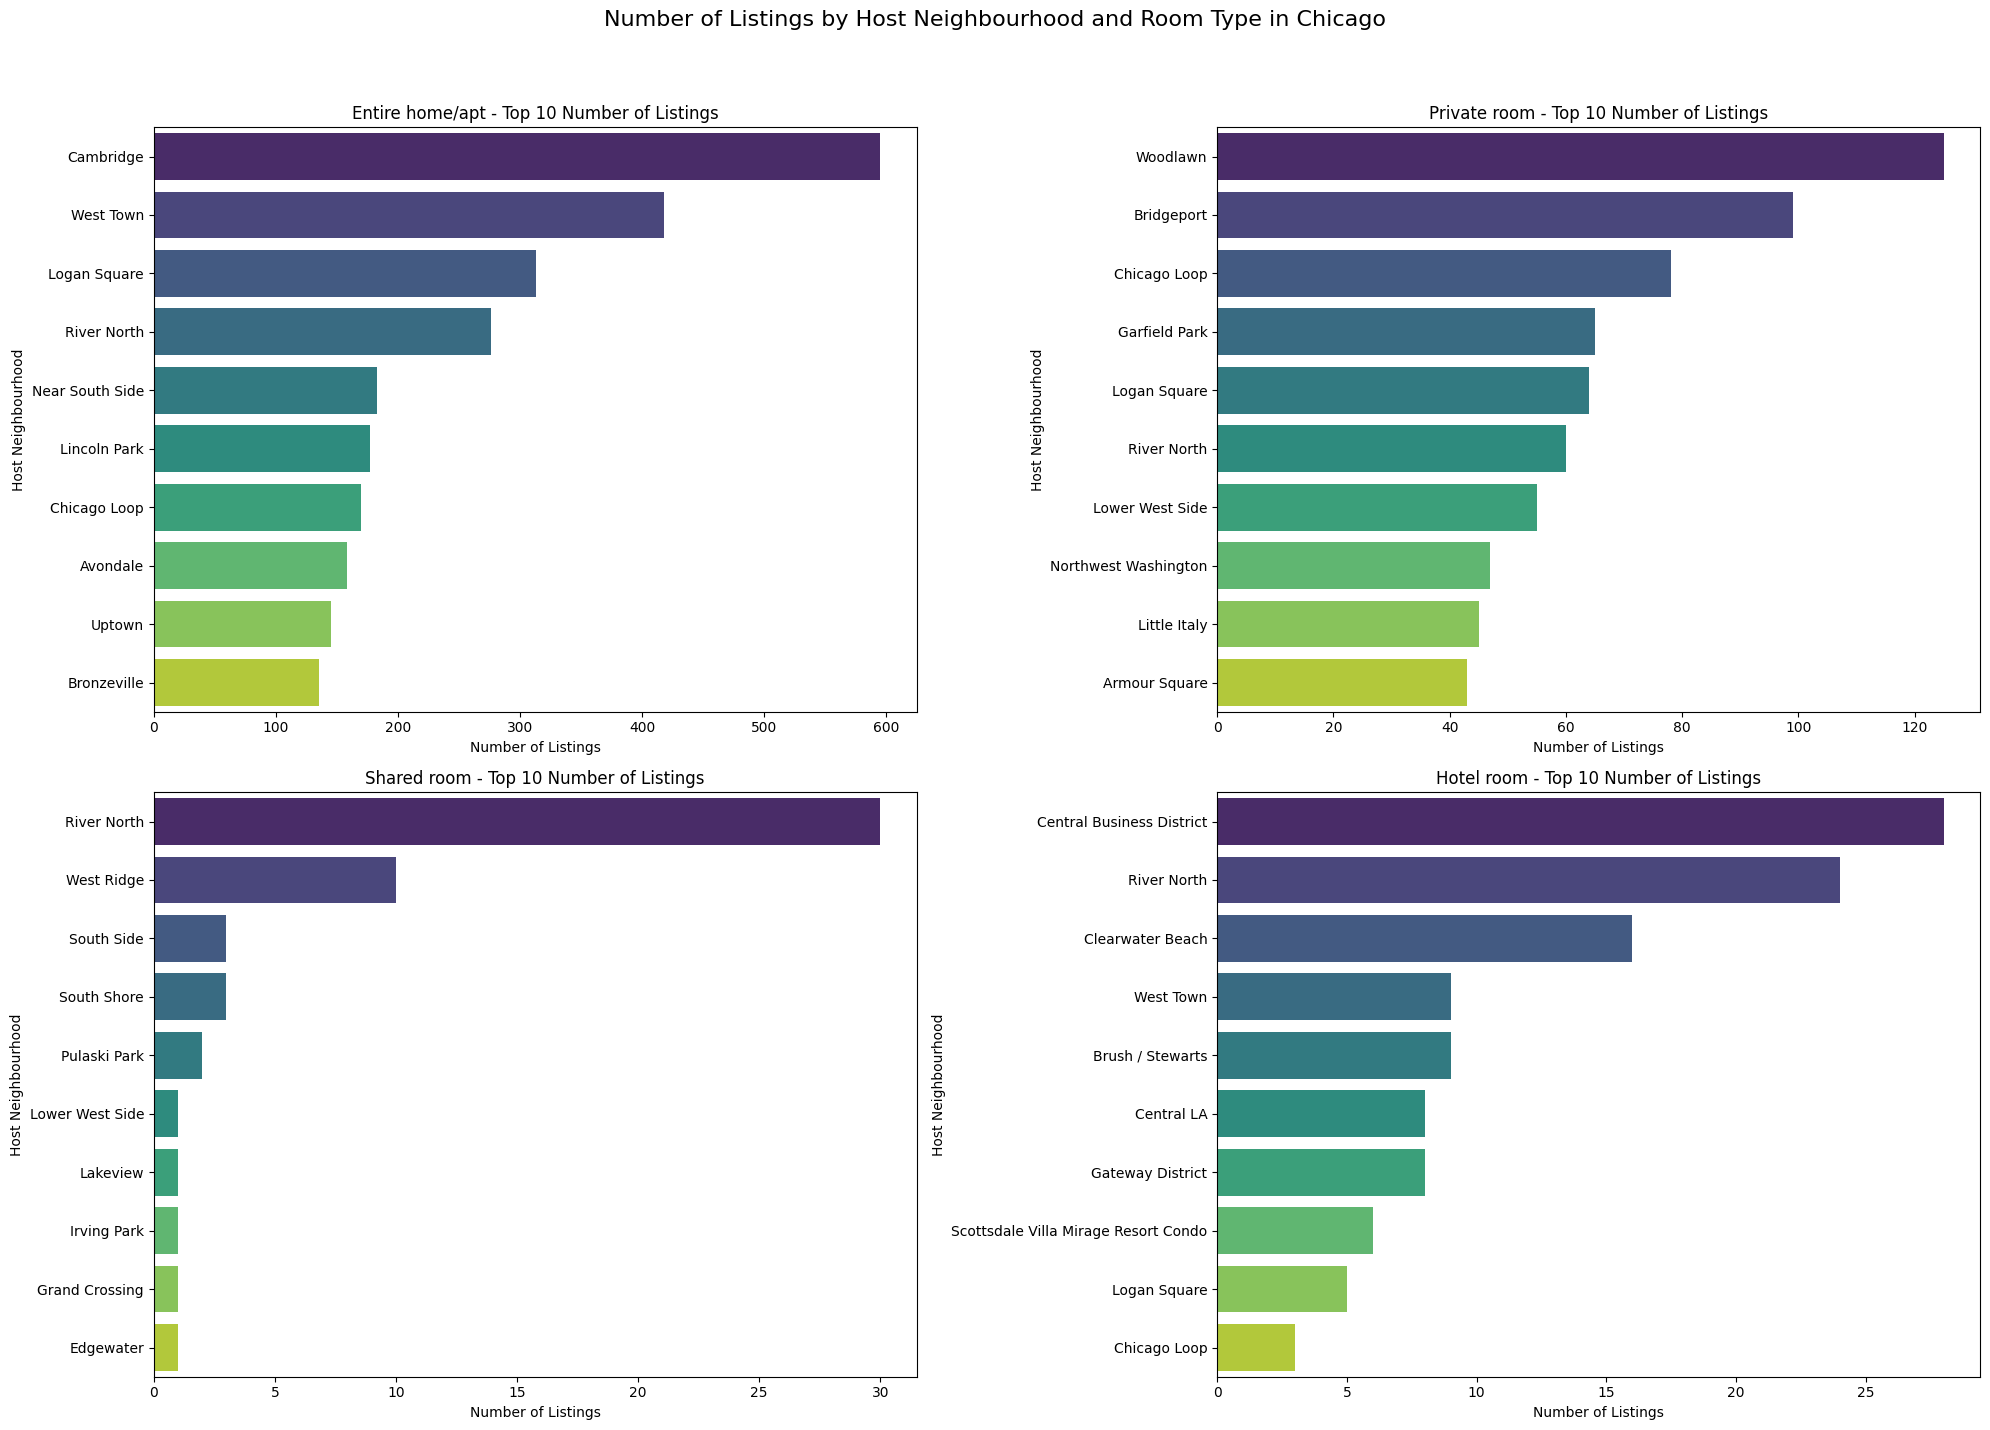

In [873]:
# Chart - 3 visualization code

fig, axes = plt.subplots(2, 2, figsize = (20, 15))
fig.suptitle('Number of Listings by Host Neighbourhood and Room Type in Chicago', fontsize = 16)

# Entire home/apt
sns.barplot(ax = axes[0, 0], x = 'Number of Listings', y = 'host_neighbourhood', data = anb_df_chic_1_ngb_apt_listcnt.head(10), hue = 'host_neighbourhood', palette = 'viridis')
axes[0, 0].set_title('Entire home/apt - Top 10 Number of Listings')
axes[0, 0].set_xlabel('Number of Listings')
axes[0, 0].set_ylabel('Host Neighbourhood')

# Private room
sns.barplot(ax = axes[0, 1], x = 'Number of Listings', y = 'host_neighbourhood', data = anb_df_chic_1_ngb_pvt_listcnt.head(10), hue = 'host_neighbourhood', palette = 'viridis')
axes[0, 1].set_title('Private room - Top 10 Number of Listings')
axes[0, 1].set_xlabel('Number of Listings')
axes[0, 1].set_ylabel('Host Neighbourhood')

# Shared room
sns.barplot(ax = axes[1, 0], x = 'Number of Listings', y = 'host_neighbourhood', data = anb_df_chic_1_ngb_shr_listcnt.head(10), hue = 'host_neighbourhood', palette = 'viridis')
axes[1, 0].set_title('Shared room - Top 10 Number of Listings')
axes[1, 0].set_xlabel('Number of Listings')
axes[1, 0].set_ylabel('Host Neighbourhood')

# Hotel room
sns.barplot(ax = axes[1, 1], x = 'Number of Listings', y = 'host_neighbourhood', data = anb_df_chic_1_ngb_hot_listcnt.head(10), hue = 'host_neighbourhood', palette = 'viridis')
axes[1, 1].set_title('Hotel room - Top 10 Number of Listings')
axes[1, 1].set_xlabel('Number of Listings')
axes[1, 1].set_ylabel('Host Neighbourhood')

# Adjusting layout to prevent title overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

##### 1. Why did you pick the specific chart?

A Bar Chart displays categorical data with rectangular bars. It helps compare different groups by showing the frequency or value of each category, making trends and differences easy to identify.

##### 2. What is/are the insight(s) found from the chart?

Entire home/apt:- Cambridge neighbourhood has over 600 listings, rest are below it.

Private room:- Woodlawn has over 120 listings, rest are barely upto 100.

Shared room:- River North has 30 listings and West Ridge has 15, rest are all 5 or below.

Hotel room:- Central business District over 30, River North at 25 and Clearwater Beach at 15, rest are all 10 or below.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this will create a Positive Business Impact.

Because, Hosts now know where are the places with high amount of listings, which indicate to Opportunities or Market Saturation.

#### Chart - 4 - Pie Chart - Share of Property Types in Chicago

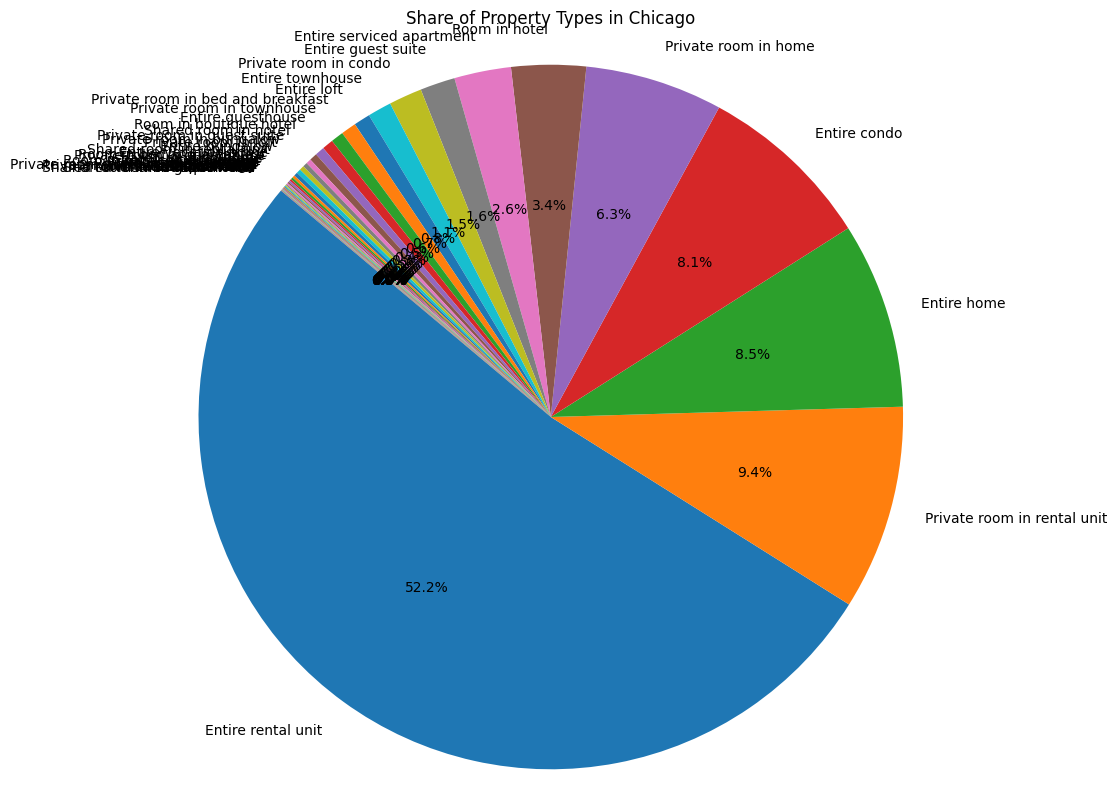

In [874]:
# Chart - 4 visualization code

plt.figure(figsize = (10, 10))
plt.pie(anb_df_chic_1_propt_pop['Count'], labels = anb_df_chic_1_propt_pop['property_type'], autopct = '%1.1f%%', startangle = 140)
plt.title('Share of Property Types in Chicago')
plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

A Pie Chart shows proportions of a whole by dividing a circle into slices. Each slice represents a category's contribution, allowing quick visual comparison of parts to the total.

##### 2. What is/are the insight(s) found from the chart?

More than 52% is the Entire rental unit property type, follwed by Private room in rental unit at 9.5% and all the others with lesser and lesser portions. this, shows the dominance of the Entire rental unit property type in Chicago.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this will create a Positive Business Impact.

Because, Hosts now know which are the dominant property types, with high amount of listings, which indicate to Opportunities or Market Saturation.

#### Chart - 5 - Pie Chart - Share of Room Types in Chicago

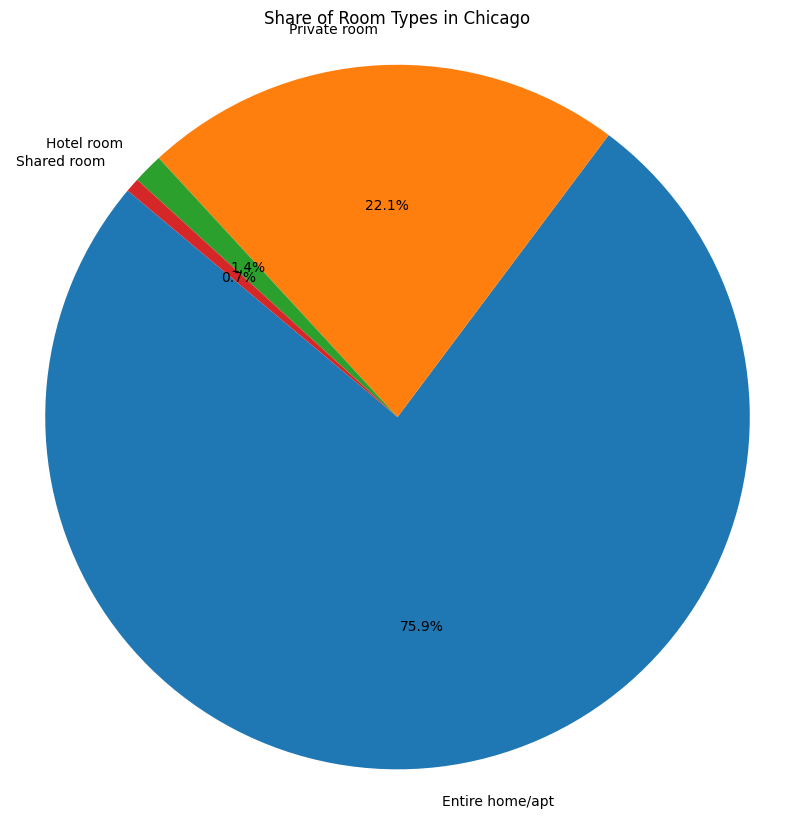

In [875]:
# Chart - 5 visualization code

plt.figure(figsize = (10, 10))
plt.pie(anb_df_chic_1_rmt_pop['Count'], labels = anb_df_chic_1_rmt_pop['room_type'], autopct = '%1.1f%%', startangle = 140)
plt.title('Share of Room Types in Chicago')
plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

A Pie Chart shows proportions of a whole by dividing a circle into slices. Each slice represents a category's contribution, allowing quick visual comparison of parts to the total.

##### 2. What is/are the insight(s) found from the chart?

Over 75% Entire home/apt room type is there, follwed by Private room at 22% and the Hotel room at 1.4% and Shared room at 0.7%. We can see clearly which is the dominant room type.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this will create a Positive Business Impact.

Because, Hosts now know which are the dominant room types, with high amount of listings, which indicate to Opportunities or Market Saturation.

#### Chart - 6 - Bubble Chart - Price vs Location by Room Type in Chicago

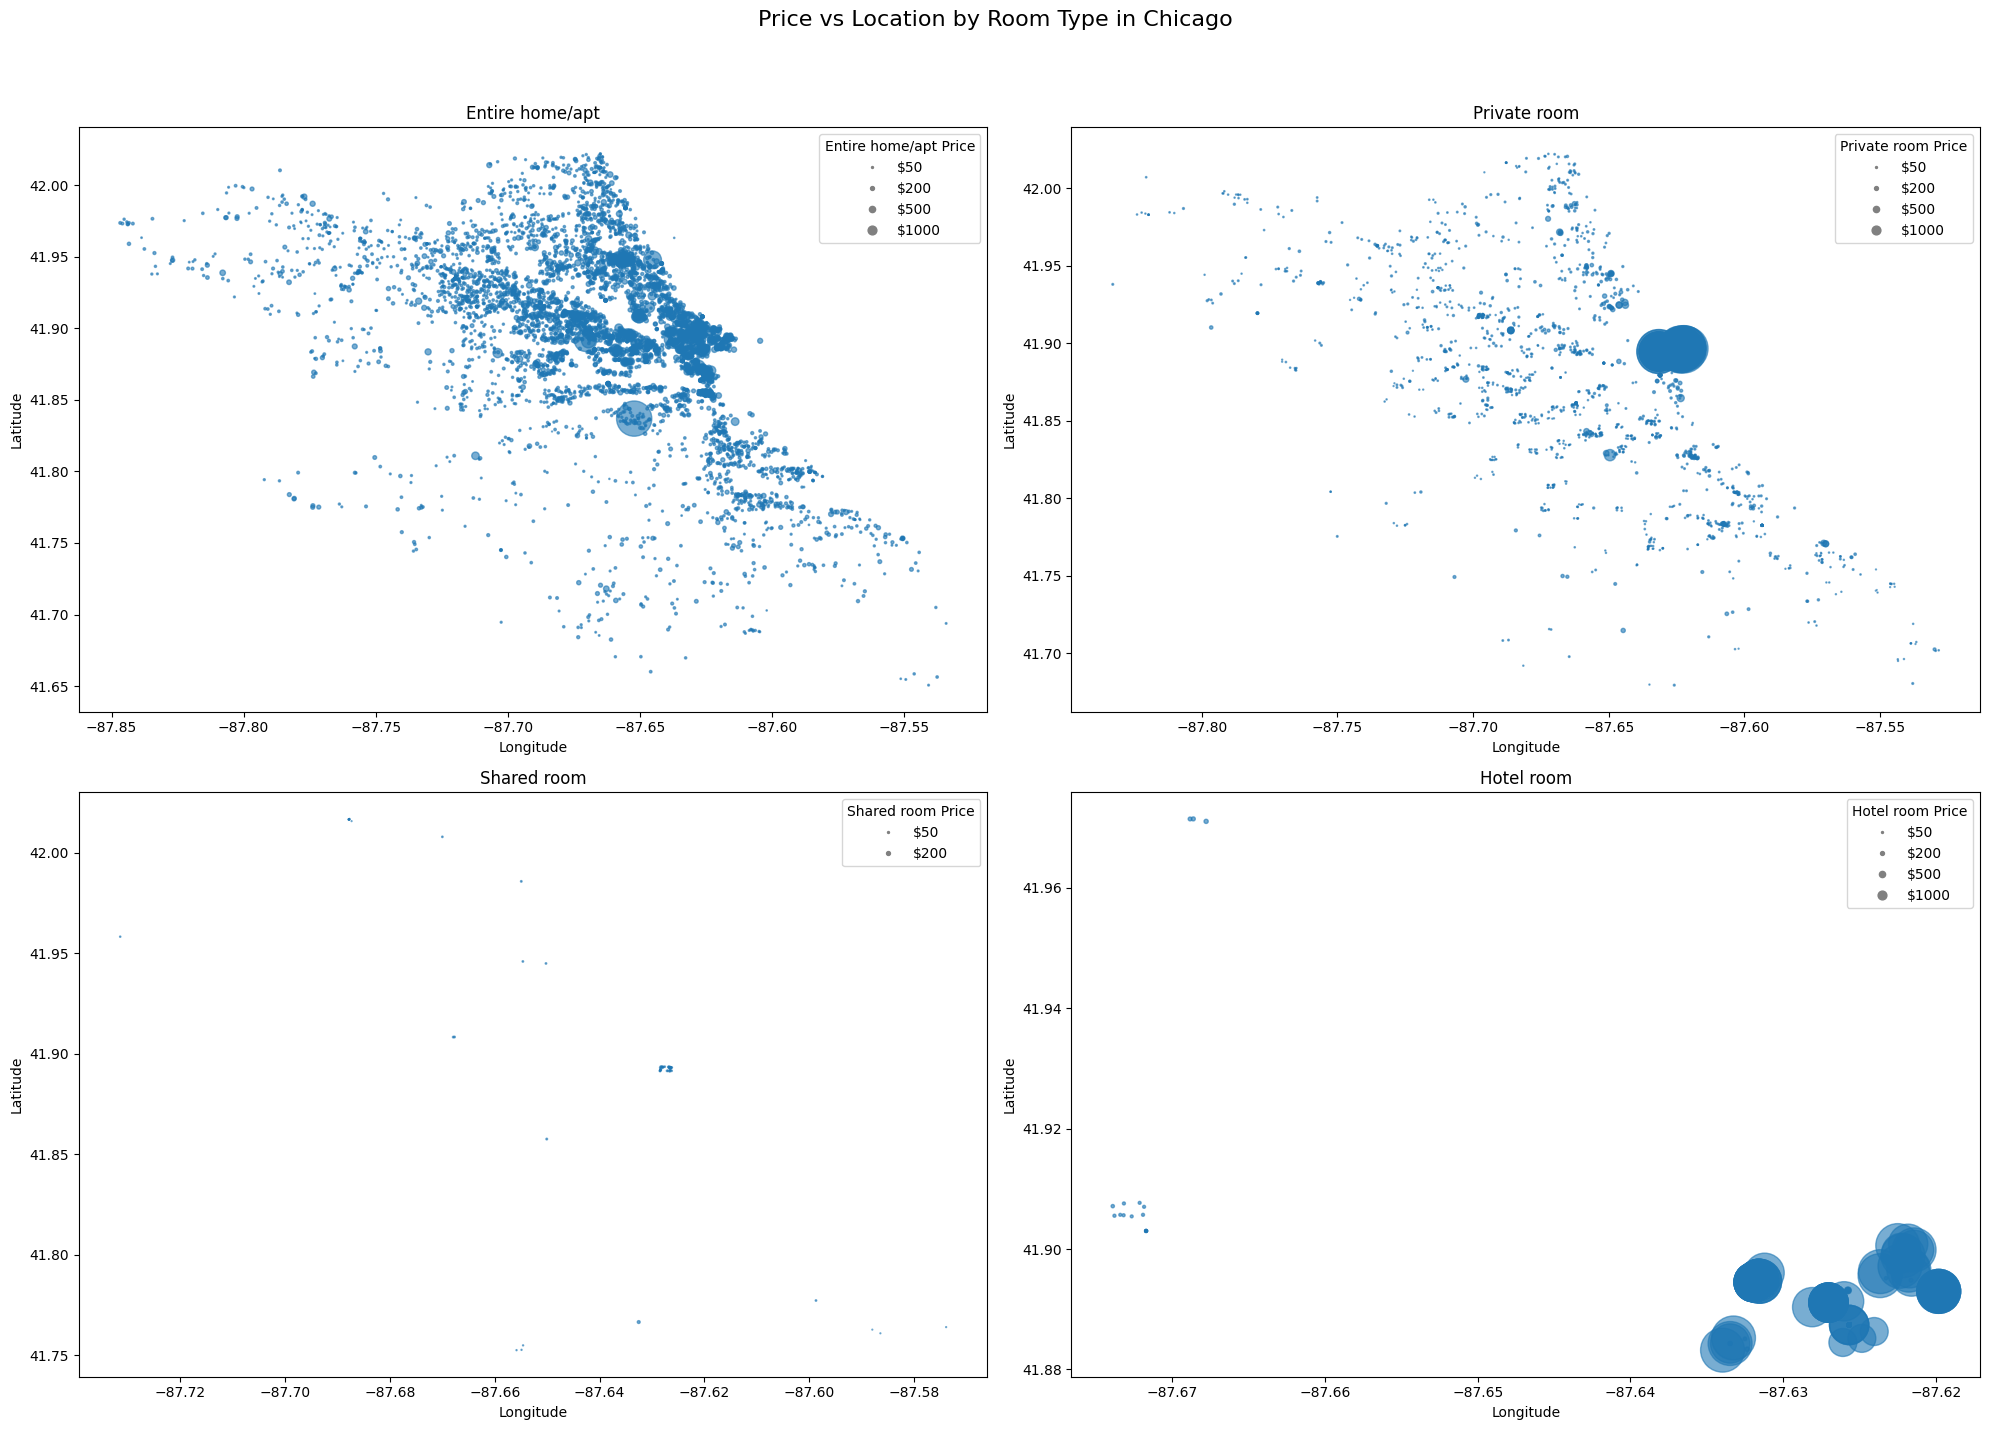

In [876]:
# Chart - 6 visualization code

# Filtering data for each room type
entire_home_apt_df = anb_df_chic_1_rmt_loc_price[anb_df_chic_1_rmt_loc_price['room_type'] == 'Entire home/apt']
private_room_df = anb_df_chic_1_rmt_loc_price[anb_df_chic_1_rmt_loc_price['room_type'] == 'Private room']
shared_room_df = anb_df_chic_1_rmt_loc_price[anb_df_chic_1_rmt_loc_price['room_type'] == 'Shared room']
hotel_room_df = anb_df_chic_1_rmt_loc_price[anb_df_chic_1_rmt_loc_price['room_type'] == 'Hotel room']

# Creating bubble charts as subplots using matplotlib
fig, axes = plt.subplots(2, 2, figsize = (20, 15))
fig.suptitle('Price vs Location by Room Type in Chicago', fontsize = 16)

# Defining a scaling factor for bubble size (adjust as needed)
size_scale = 50

# Function to add bubble size legend
def add_size_legend(ax, prices, size_scale, label):

    legend_elements = []

    # Choosing some representative prices for the legend
    representative_prices = [50, 200, 500, 1000]

    for price in representative_prices:

        if price <= prices.max():

            legend_elements.append(plt.Line2D([0], [0], marker = 'o', color = 'gray', label =f'${price:.0f}', markersize = np.sqrt(price/size_scale * 2), linestyle = ''))

    if legend_elements:

        ax.legend(handles = legend_elements, title = f'{label} Price', loc = 'upper right')


# Entire home/apt
scatter00 = axes[0, 0].scatter(entire_home_apt_df['longitude'], entire_home_apt_df['latitude'], s = entire_home_apt_df['price'] / size_scale, alpha = 0.6)
axes[0, 0].set_title('Entire home/apt')
axes[0, 0].set_xlabel('Longitude')
axes[0, 0].set_ylabel('Latitude')
add_size_legend(axes[0, 0], entire_home_apt_df['price'], size_scale, 'Entire home/apt')


# Private room
scatter01 = axes[0, 1].scatter(private_room_df['longitude'], private_room_df['latitude'], s = private_room_df['price'] / size_scale, alpha = 0.6)
axes[0, 1].set_title('Private room')
axes[0, 1].set_xlabel('Longitude')
axes[0, 1].set_ylabel('Latitude')
add_size_legend(axes[0, 1], private_room_df['price'], size_scale, 'Private room')


# Shared room
scatter10 = axes[1, 0].scatter(shared_room_df['longitude'], shared_room_df['latitude'], s = shared_room_df['price'] / size_scale, alpha = 0.6)
axes[1, 0].set_title('Shared room')
axes[1, 0].set_xlabel('Longitude')
axes[1, 0].set_ylabel('Latitude')
add_size_legend(axes[1, 0], shared_room_df['price'], size_scale, 'Shared room')


# Hotel room
scatter11 = axes[1, 1].scatter(hotel_room_df['longitude'], hotel_room_df['latitude'], s = hotel_room_df['price'] / size_scale, alpha = 0.6)
axes[1, 1].set_title('Hotel room')
axes[1, 1].set_xlabel('Longitude')
axes[1, 1].set_ylabel('Latitude')
add_size_legend(axes[1, 1], hotel_room_df['price'], size_scale, 'Hotel room')


# Adjusting layout to prevent title overlap
plt.tight_layout(rect = [0, 0.03, 1, 0.95])
plt.show()

##### 1. Why did you pick the specific chart?

A Bubble Chart visualizes three dimensions of data, using the x and y axes for two variables and bubble size for a third. It helps illustrate complex relationships in data.

##### 2. What is/are the insight(s) found from the chart?

Entire home/apt:- Typically Spread out across the city, with most listings at upto 1000 as their price, at around slightly west of the centre we have a bubble with a significantly high price.

Private room:- With significantly lower density as compared to the spread of the Entire home/apt, they are still spread all throughout the city, with typical maximum price ranging at 1000, but slightly to the north east from the centre of the city, there are listings with significantly high price.  

Shared room:- Very few in number and are mostly concentrated near the centre of the city with maximum price at upto 200.

Hotel room:- Few in number but mostly concentrated at the south west portion of the city with maximum price at 200, and the other concentration at south east with price being 1000 and significantly above 1000.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this will create a Positive Business Impact.

Because, Hosts now know which are the saturated geographical zones and what are the prevailing prices in those locations, also how they vary geospatially because of the mapping of latiudes and longitudes with location prices reflected with the size of the marker as a bubble.

#### Chart - 7 - Box Plot - Price Distribution by Property Type in Chicago

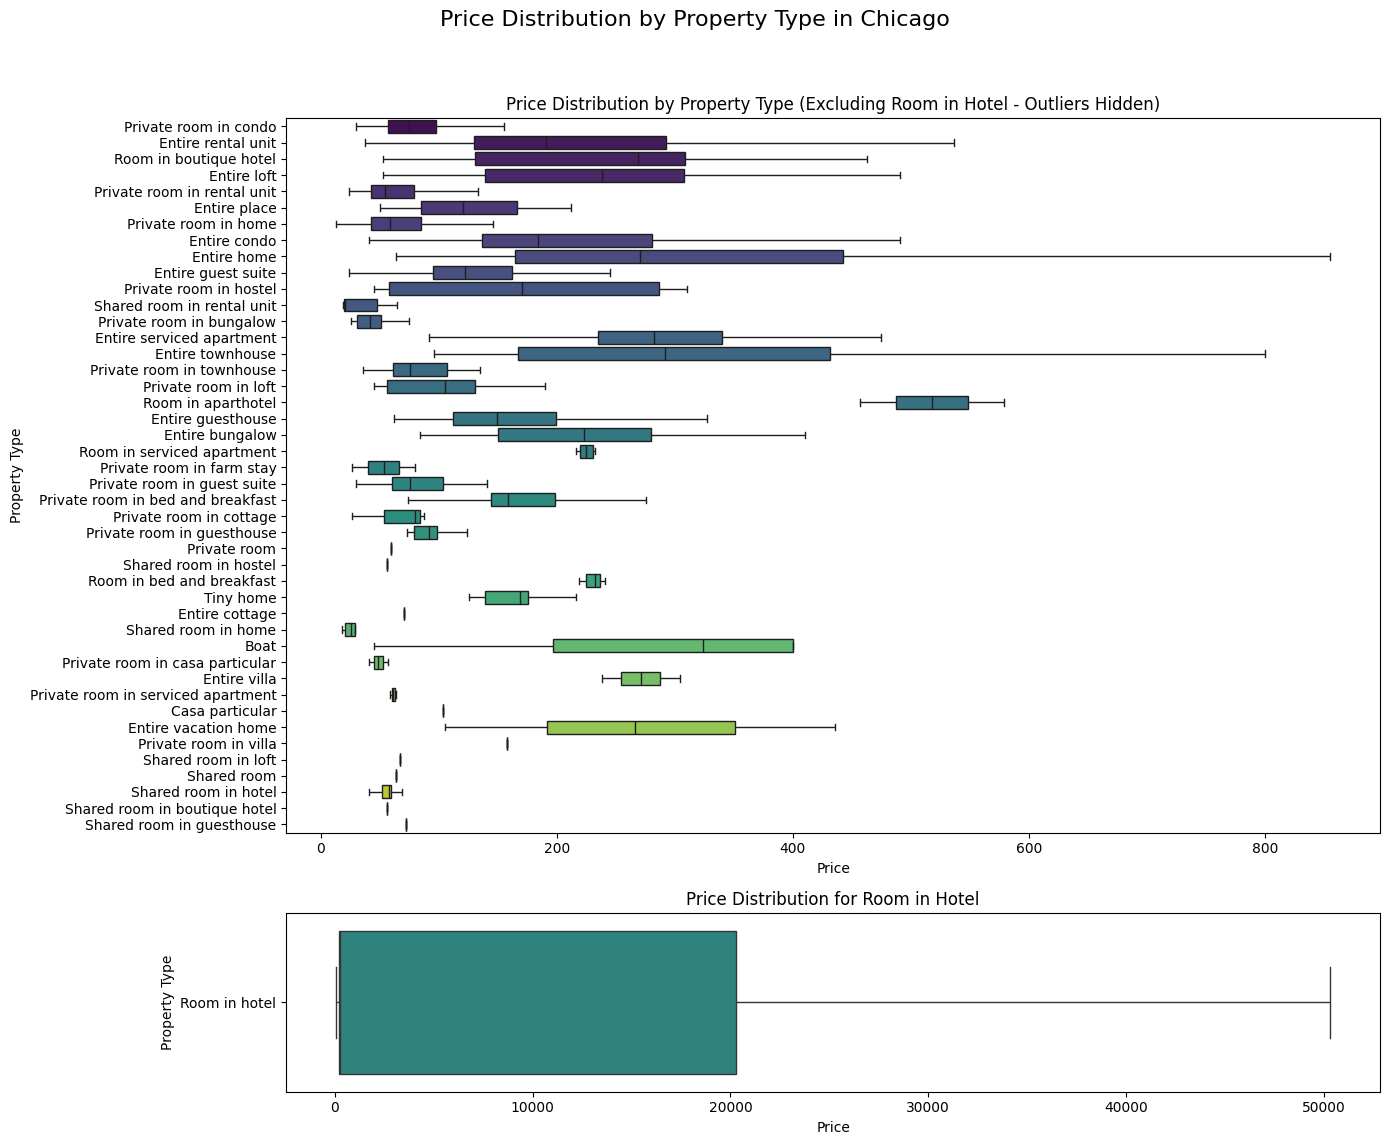

In [877]:
# Chart - 7 visualization code

# Filtering data for 'Room in hotel' and other property types
hotel_room_property_df = anb_df_chic_1_propt_price[anb_df_chic_1_propt_price['property_type'] == 'Room in hotel']
other_property_types_df = anb_df_chic_1_propt_price[anb_df_chic_1_propt_price['property_type'] != 'Room in hotel']

fig, axes = plt.subplots(2, 1, figsize = (14, 12), gridspec_kw = {'height_ratios': [4, 1]})
fig.suptitle('Price Distribution by Property Type in Chicago', fontsize = 16)

# Box plot for other property types (excluding 'Room in hotel'), hiding outliers
sns.boxplot(ax = axes[0], x = 'price', y = 'property_type', data = other_property_types_df, hue = 'property_type', palette = 'viridis', showfliers = False)
axes[0].set_title('Price Distribution by Property Type (Excluding Room in Hotel - Outliers Hidden)')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Property Type')

# Box plot for 'Room in hotel' separately
sns.boxplot(ax = axes[1], x = 'price', y = 'property_type', data = hotel_room_property_df, hue = 'property_type', palette = 'viridis')
axes[1].set_title('Price Distribution for Room in Hotel')
axes[1].set_xlabel('Price')
axes[1].set_ylabel('Property Type')

# Adjusting layout to prevent title overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

##### 1. Why did you pick the specific chart?

A Box Plot summarizes data distribution through quartiles. It shows median, range, and outliers, enabling easy understanding of data spread and identifying potential anomalies in the dataset.

##### 2. What is/are the insight(s) found from the chart?

With the Median price at 500 for Room in aparthotel property type, it is the highest and with price at less than 50 at Shared room in home property type, it the lowest. The maximum prices are seen with Room in hotel property type, with maximum going beyond 50,000.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this will create a Positive Business Impact.

Because, Hosts now know how can they offer the prices of the property types they are trying to offer, and how to optimise the prices of their existing listings.

#### Chart - 8 - Scatter Plot - Price vs Number of Reviews by Room Type in Chicago

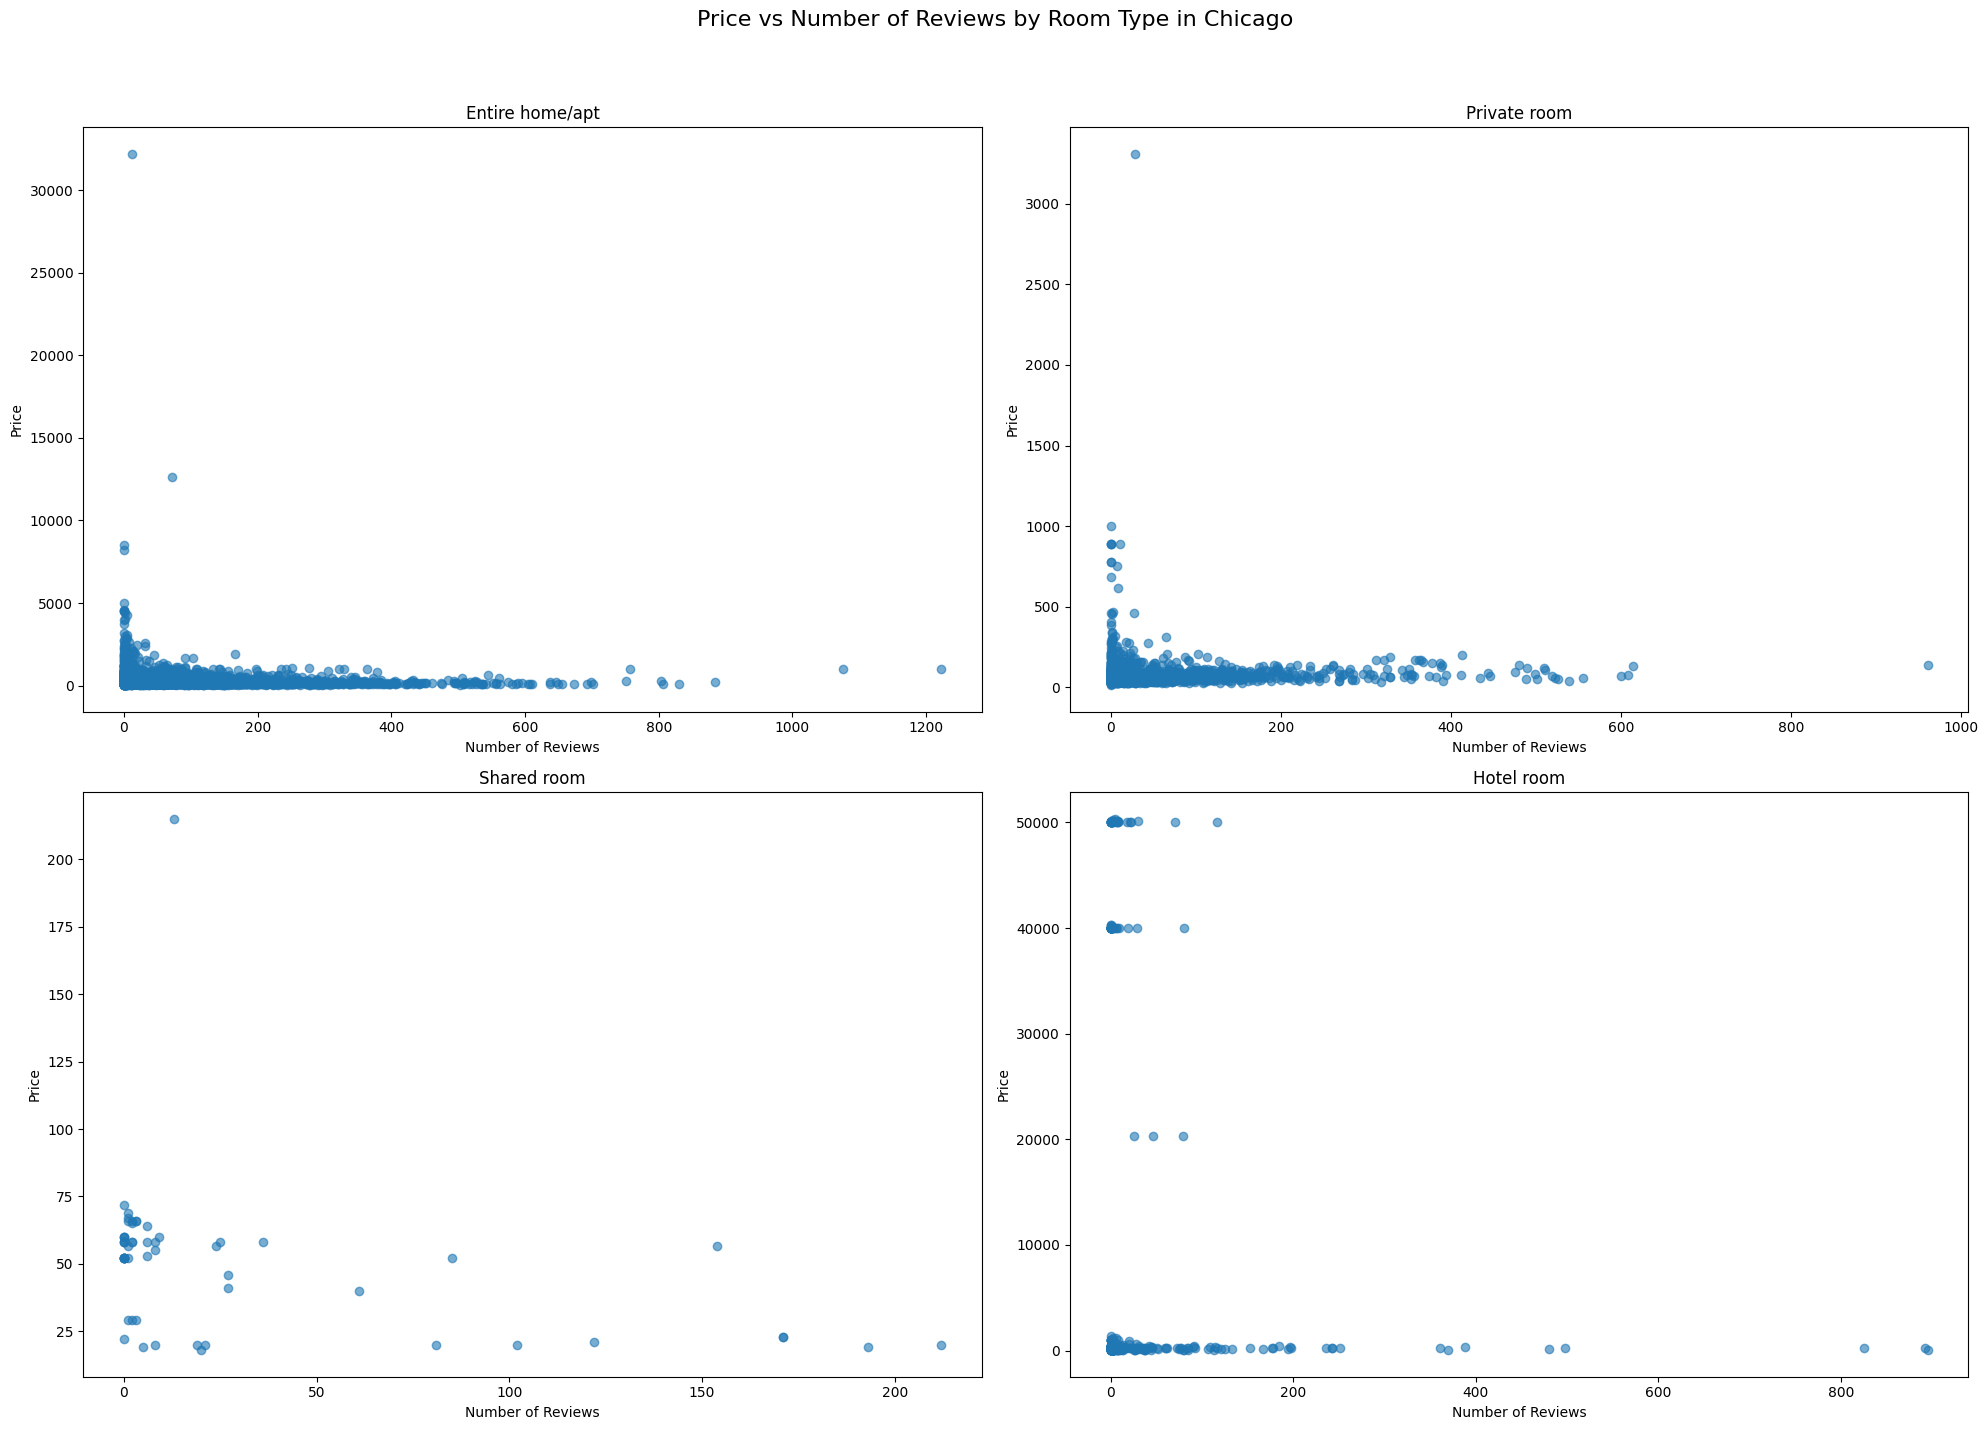

In [878]:
# Chart - 8 visualization code

# Filtering data for each room type
entire_home_apt_revs_price = anb_df_chic_1_rmt_revs_price[anb_df_chic_1_rmt_revs_price['property_type'].str.contains('Entire home/apt|Entire home|Entire condo|Entire rental unit|Entire serviced apartment|Entire guest suite|Entire loft|Entire townhouse|Entire bungalow|Entire vacation home|Entire villa|Entire cottage|Entire place', case = False, na = False)]
private_room_revs_price = anb_df_chic_1_rmt_revs_price[anb_df_chic_1_rmt_revs_price['property_type'].str.contains('Private room', case = False, na = False)]
shared_room_revs_price = anb_df_chic_1_rmt_revs_price[anb_df_chic_1_rmt_revs_price['property_type'].str.contains('Shared room', case = False, na = False)]
hotel_room_revs_price = anb_df_chic_1_rmt_revs_price[anb_df_chic_1_rmt_revs_price['property_type'].str.contains('Hotel room|Room in hotel|Room in boutique hotel|Room in aparthotel', case = False, na = False)]

fig, axes = plt.subplots(2, 2, figsize = (20, 15))
fig.suptitle('Price vs Number of Reviews by Room Type in Chicago', fontsize = 16)

# Entire home/apt
axes[0, 0].scatter(entire_home_apt_revs_price['number_of_reviews'], entire_home_apt_revs_price['price'], alpha = 0.6)
axes[0, 0].set_title('Entire home/apt')
axes[0, 0].set_xlabel('Number of Reviews')
axes[0, 0].set_ylabel('Price')

# Private room
axes[0, 1].scatter(private_room_revs_price['number_of_reviews'], private_room_revs_price['price'], alpha = 0.6)
axes[0, 1].set_title('Private room')
axes[0, 1].set_xlabel('Number of Reviews')
axes[0, 1].set_ylabel('Price')

# Shared room
axes[1, 0].scatter(shared_room_revs_price['number_of_reviews'], shared_room_revs_price['price'], alpha = 0.6)
axes[1, 0].set_title('Shared room')
axes[1, 0].set_xlabel('Number of Reviews')
axes[1, 0].set_ylabel('Price')

# Hotel room
axes[1, 1].scatter(hotel_room_revs_price['number_of_reviews'], hotel_room_revs_price['price'], alpha = 0.6)
axes[1, 1].set_title('Hotel room')
axes[1, 1].set_xlabel('Number of Reviews')
axes[1, 1].set_ylabel('Price')

# Adjusting layout to prevent title overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

##### 1. Why did you pick the specific chart?

A Scatter Plot displays individual data points on a two-axis grid, showing relationships between variables. It helps visualize correlations, trends, and data distributions, allowing outliers to be easily identified.

##### 2. What is/are the insight(s) found from the chart?

In all the room types we can clearly see that lower the prices mean higher number of reviews, indicating the price sensitive footfall in general.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this will create a Positive Business Impact.

Because, Hosts now know how to optimise their prices to attract more customers, and with more customers they will have more reviews and they can better manage and expand their businesses accordingly.

#### Chart - 9 - Correlation Heatmap - Numeric Variables for Normal Hosts in Chicago

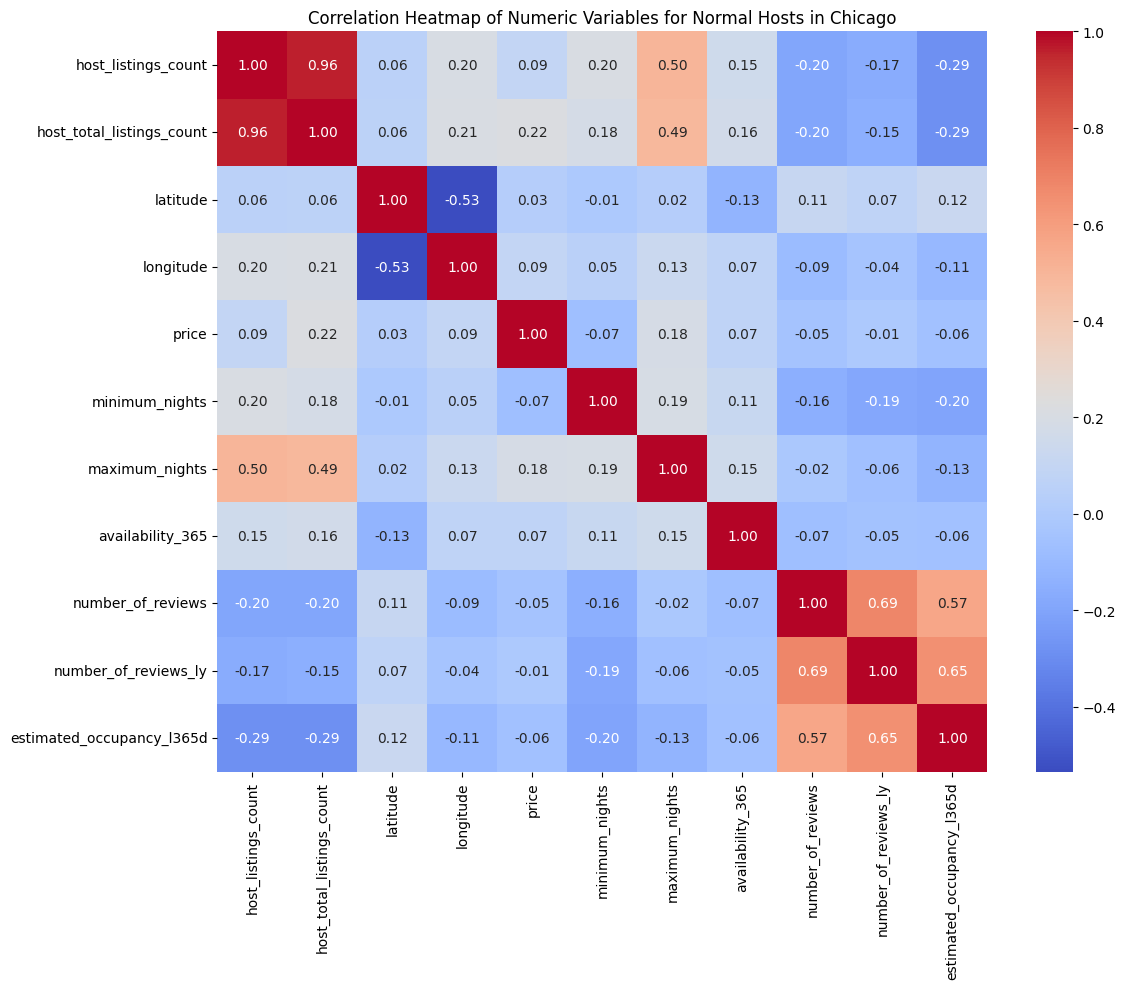

In [879]:
# Chart - 9 visualization code

# Selecting only numeric columns, excluding 'id' and 'host_id'
numeric_cols_norm_host = anb_df_chic_1_norm_host.select_dtypes(include = np.number).drop(columns = ['id', 'host_id'], errors = 'ignore')

# Calculating the correlation matrix
correlation_matrix = numeric_cols_norm_host.corr()

plt.figure(figsize = (12, 10))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title('Correlation Heatmap of Numeric Variables for Normal Hosts in Chicago')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A Correlation Heatmap visualizes relationships between multiple variables using color scales. It quickly identifies positive, negative, or no correlation, aiding in understanding the strength and direction of connections.

##### 2. What is/are the insight(s) found from the chart?

Among the Normal Hosts,

The Maximum Positive Correaltion is between host_listings_count and total_host_listings_count at 0.96, follwed by large positives in number_of_reviews_ly and number_of_reviews at 0.69, number_of_reviews_ly and estimated_occupancy_l365d at 0.63 and number_of_reviews and estimated_occupancy_l365d at 0.57

The Maximum Negative Correlation is between is longitude and latitude at -0.53 follwed by significant negatives at host_listings_count and estimated_occupancy_l365d at -0.29 and minimum_nights and number_of_reviews_ly at -0.18.

The price and number_of_reviews have small negative correlation at -0.05.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this will create a Positive Business Impact.

Because, Hosts now know how to optimise their businesses by looking at how the participating variables are correlated to each other.

#### Chart - 10 - Correlation Heatmap - Numeric Variables for Super Hosts in Chicago

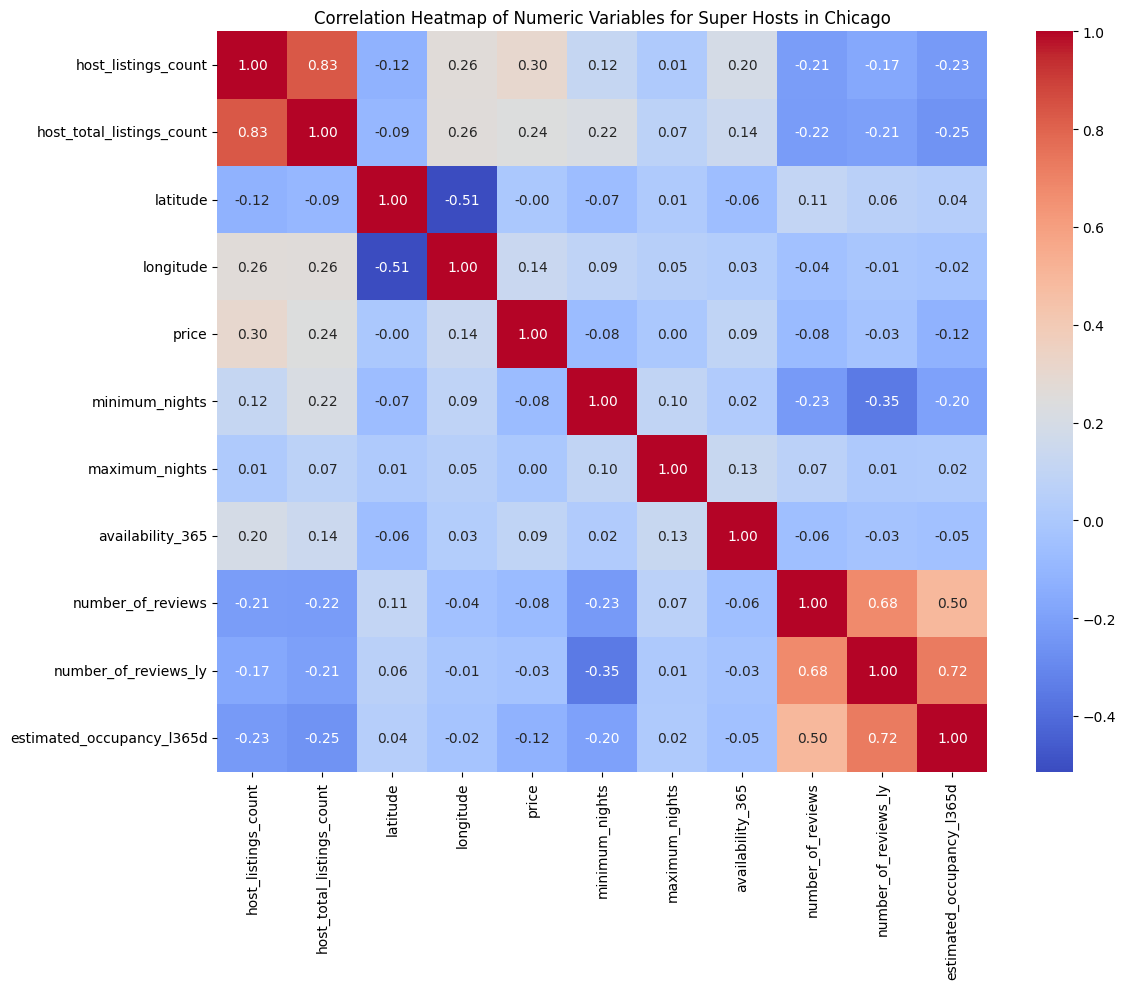

In [880]:
# Chart - 10 visualization code

# Selecting only numeric columns, excluding 'id' and 'host_id'
numeric_cols_sup_host = anb_df_chic_1_sup_host.select_dtypes(include = np.number).drop(columns = ['id', 'host_id'], errors = 'ignore')

# Calculating the correlation matrix
correlation_matrix = numeric_cols_sup_host.corr()

plt.figure(figsize = (12, 10))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title('Correlation Heatmap of Numeric Variables for Super Hosts in Chicago')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A Correlation Heatmap visualizes relationships between multiple variables using color scales. It quickly identifies positive, negative, or no correlation, aiding in understanding the strength and direction of connections.

##### 2. What is/are the insight(s) found from the chart?

Among the Super Hosts,

The Maximum Positive Correaltion is between host_listings_count and total_host_listings_count at 0.83, follwed by large positives in number_of_reviews_ly and number_of_reviews at 0.68, number_of_reviews_ly and estimated_occupancy_l365d at 0.72 and number_of_reviews and estimated_occupancy_l365d at 0.50.

The Maximum Negative Correlation is between is longitude and latitude at -0.51 follwed by significant negatives at host_listings_count and estimated_occupancy_l365d at -0.23 and minimum_nights and number_of_reviews_ly at -0.35.

The price and number_of_reviews have small negative correlation at -0.08.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this will create a Positive Business Impact.

Because, Super Hosts now know how to optimise their businesses by looking at how the participating variables are correlated to each other.

## ***5. New Orleans : Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Bar Char - Top 10 Popular Host Neighbourhoods in New Orleans

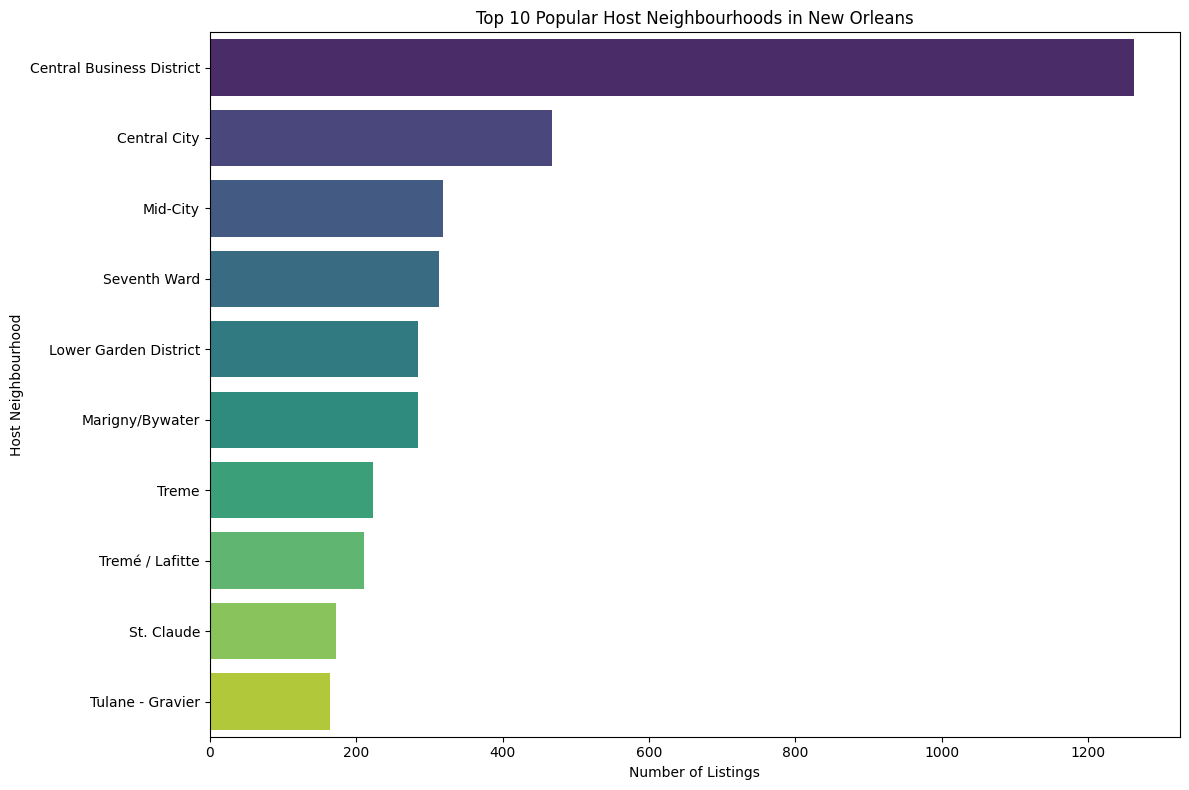

In [881]:
# Chart - 1 visualization code

plt.figure(figsize = (12, 8))
sns.barplot(x = 'Count', y = 'host_neighbourhood', data = anb_df_nwor_1_ngb_pop.head(10), hue = 'host_neighbourhood', palette = 'viridis')
plt.title('Top 10 Popular Host Neighbourhoods in New Orleans')
plt.xlabel('Number of Listings')
plt.ylabel('Host Neighbourhood')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A Bar Chart displays categorical data with rectangular bars. It helps compare different groups by showing the frequency or value of each category, making trends and differences easy to identify.

##### 2. What is/are the insight(s) found from the chart?

With Almost 1200 Listings, Central business District Neighbourhood has the Highest Number of Listings in New Orleans. The other 9 in the Top 10 are near 400 and below.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this will create a Positive Business Impact.

Because, Hosts now know where are the places with high amount of listings, which indicate to Opportunities or Market Saturation.  

#### Chart - 2 - Bar Chart - Average Price by Host Neighbourhood and Room Type in New Orleans

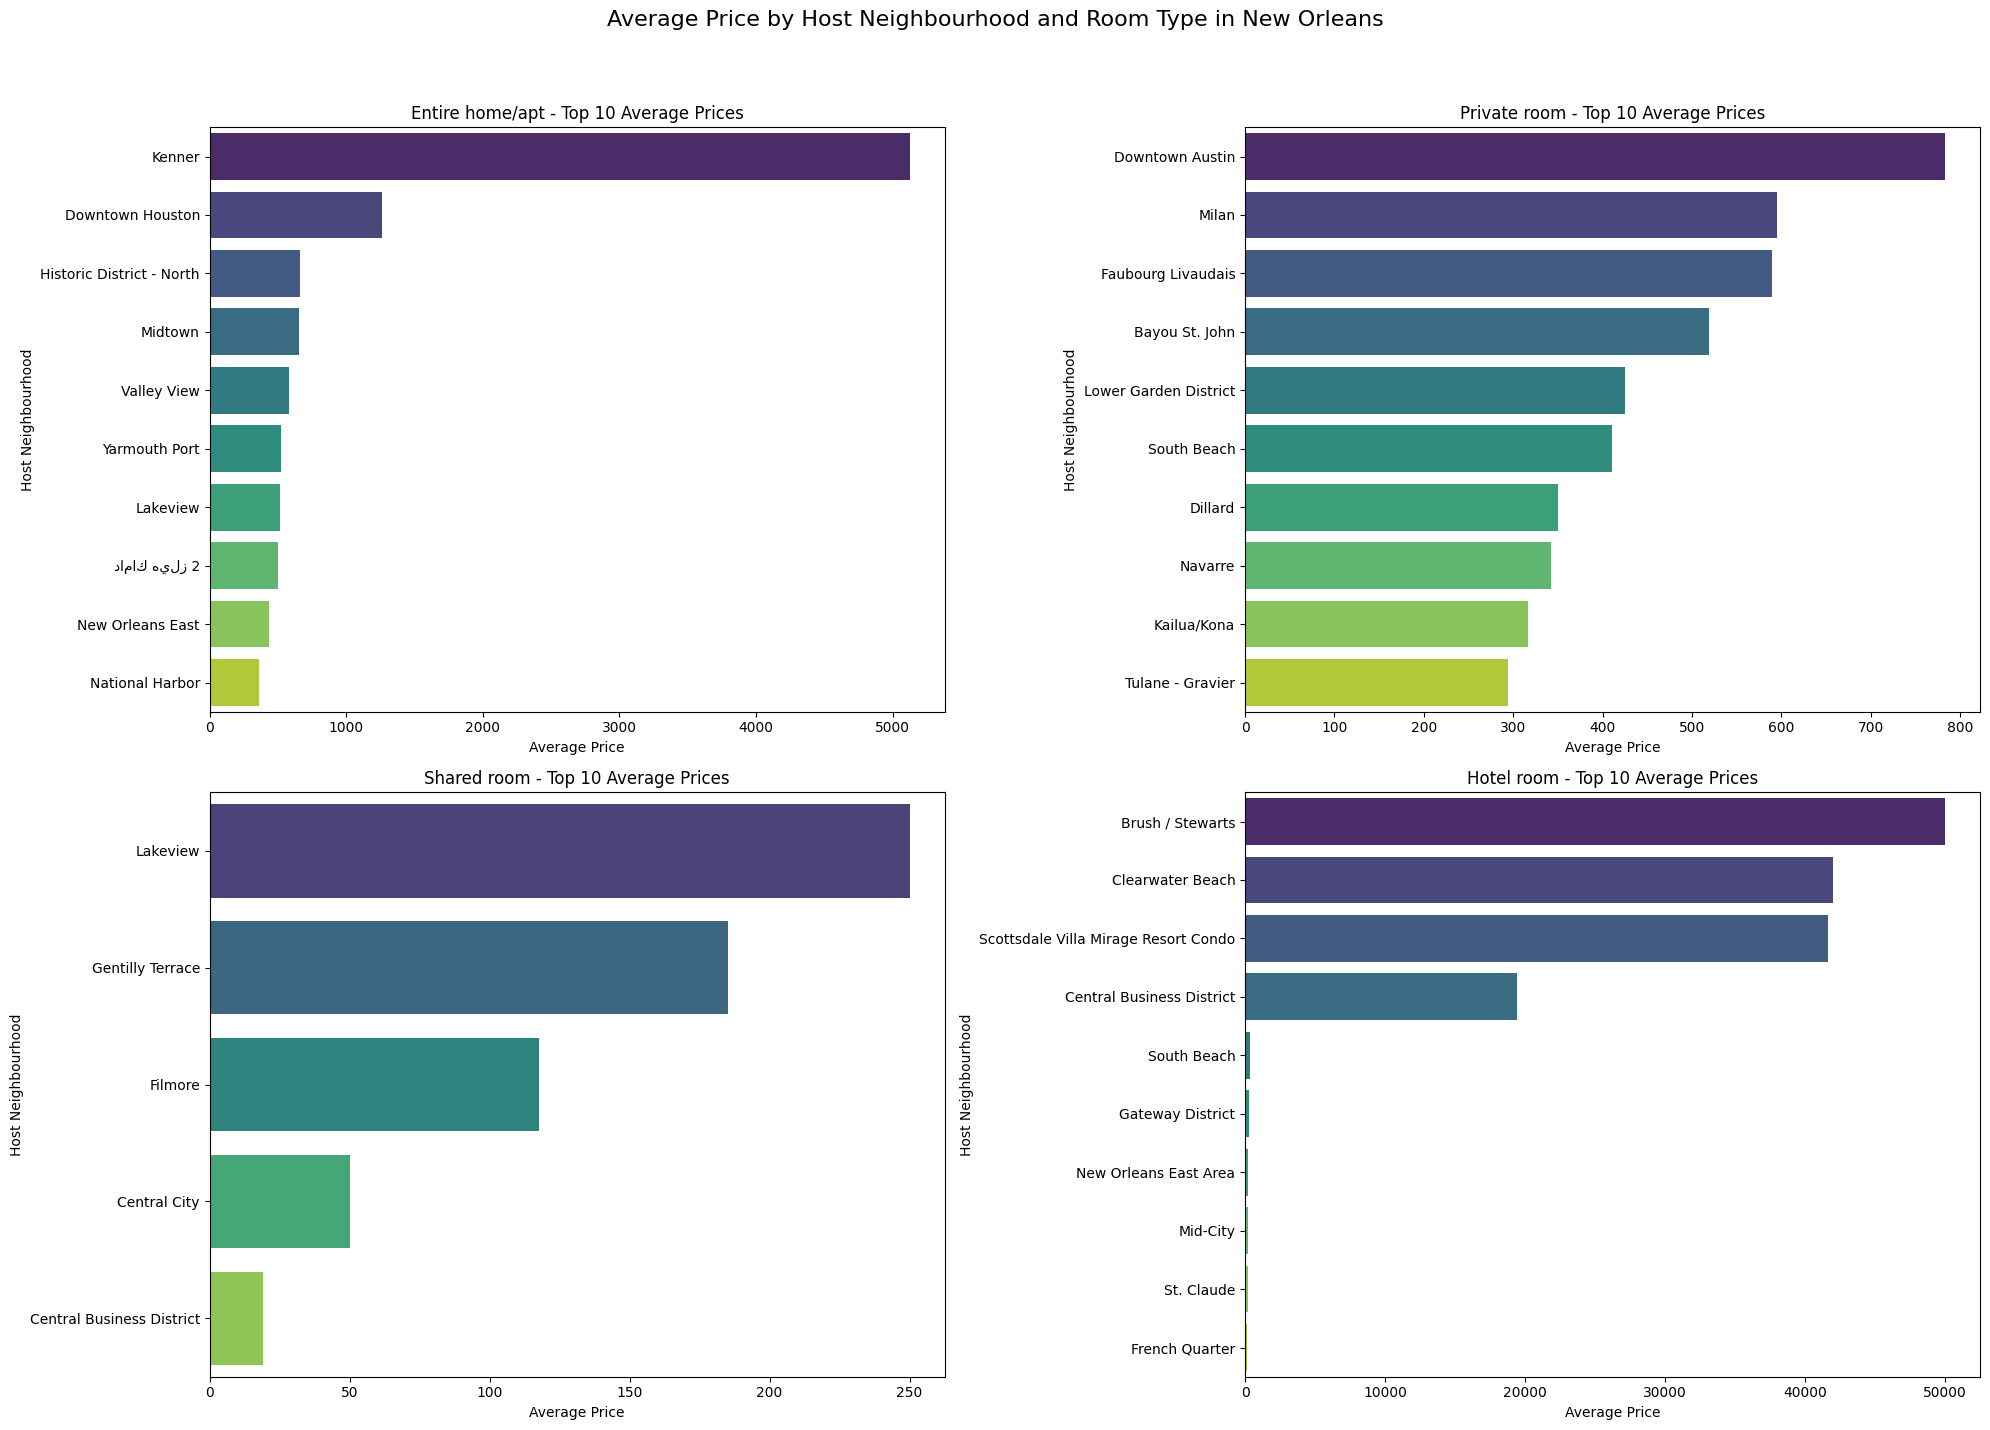

In [882]:
# Chart - 2 visualization code

fig, axes = plt.subplots(2, 2, figsize = (20, 15))
fig.suptitle('Average Price by Host Neighbourhood and Room Type in New Orleans', fontsize = 16)

# Entire home/apt
sns.barplot(ax = axes[0, 0], x = 'Average Price', y = 'host_neighbourhood', data = anb_df_nwor_1_ngb_apt_avgprice.head(10), hue = 'host_neighbourhood', palette = 'viridis')
axes[0, 0].set_title('Entire home/apt - Top 10 Average Prices')
axes[0, 0].set_xlabel('Average Price')
axes[0, 0].set_ylabel('Host Neighbourhood')

# Private room
sns.barplot(ax = axes[0, 1], x = 'Average Price', y = 'host_neighbourhood', data = anb_df_nwor_1_ngb_pvt_avgprice.head(10), hue = 'host_neighbourhood', palette = 'viridis')
axes[0, 1].set_title('Private room - Top 10 Average Prices')
axes[0, 1].set_xlabel('Average Price')
axes[0, 1].set_ylabel('Host Neighbourhood')

# Shared room
sns.barplot(ax = axes[1, 0], x = 'Average Price', y = 'host_neighbourhood', data = anb_df_nwor_1_ngb_shr_avgprice.head(10), hue = 'host_neighbourhood', palette = 'viridis')
axes[1, 0].set_title('Shared room - Top 10 Average Prices')
axes[1, 0].set_xlabel('Average Price')
axes[1, 0].set_ylabel('Host Neighbourhood')

# Hotel room
sns.barplot(ax = axes[1, 1], x = 'Average Price', y = 'host_neighbourhood', data = anb_df_nwor_1_ngb_hot_avgprice.head(10), hue = 'host_neighbourhood', palette = 'viridis')
axes[1, 1].set_title('Hotel room - Top 10 Average Prices')
axes[1, 1].set_xlabel('Average Price')
axes[1, 1].set_ylabel('Host Neighbourhood')

# Adjusting layout to prevent title overlap
plt.tight_layout(rect = [0, 0.03, 1, 0.95])
plt.show()

##### 1. Why did you pick the specific chart?

A Bar Chart displays categorical data with rectangular bars. It helps compare different groups by showing the frequency or value of each category, making trends and differences easy to identify.

##### 2. What is/are the insight(s) found from the chart?

Entire home/apt:- Kernar at 5000 and Downtown Houston at 2000, other neighbourhoods have below 1000 as average price

Private room:- Downtown Austin at 800 as the average price, rest are barely upto 600.

Shared room:- Only Lakeview is at 250, rest are all below 200.

Hotel room:-  Neighbourhoods from Brush / Stewarts at about 50,000 to Central Business District at 20,000, the rest of them are all 1000 or less.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this will create a Positive Business Impact.

Because, Hosts now know where are the places with high average priced listings, which indicate to Opportunities by offerring cheaper alternatives to capture the market or craft other strategies.

#### Chart - 3 - Bar Chart - Number of Listings by Host Neighbourhood and Room Type in New Orleans

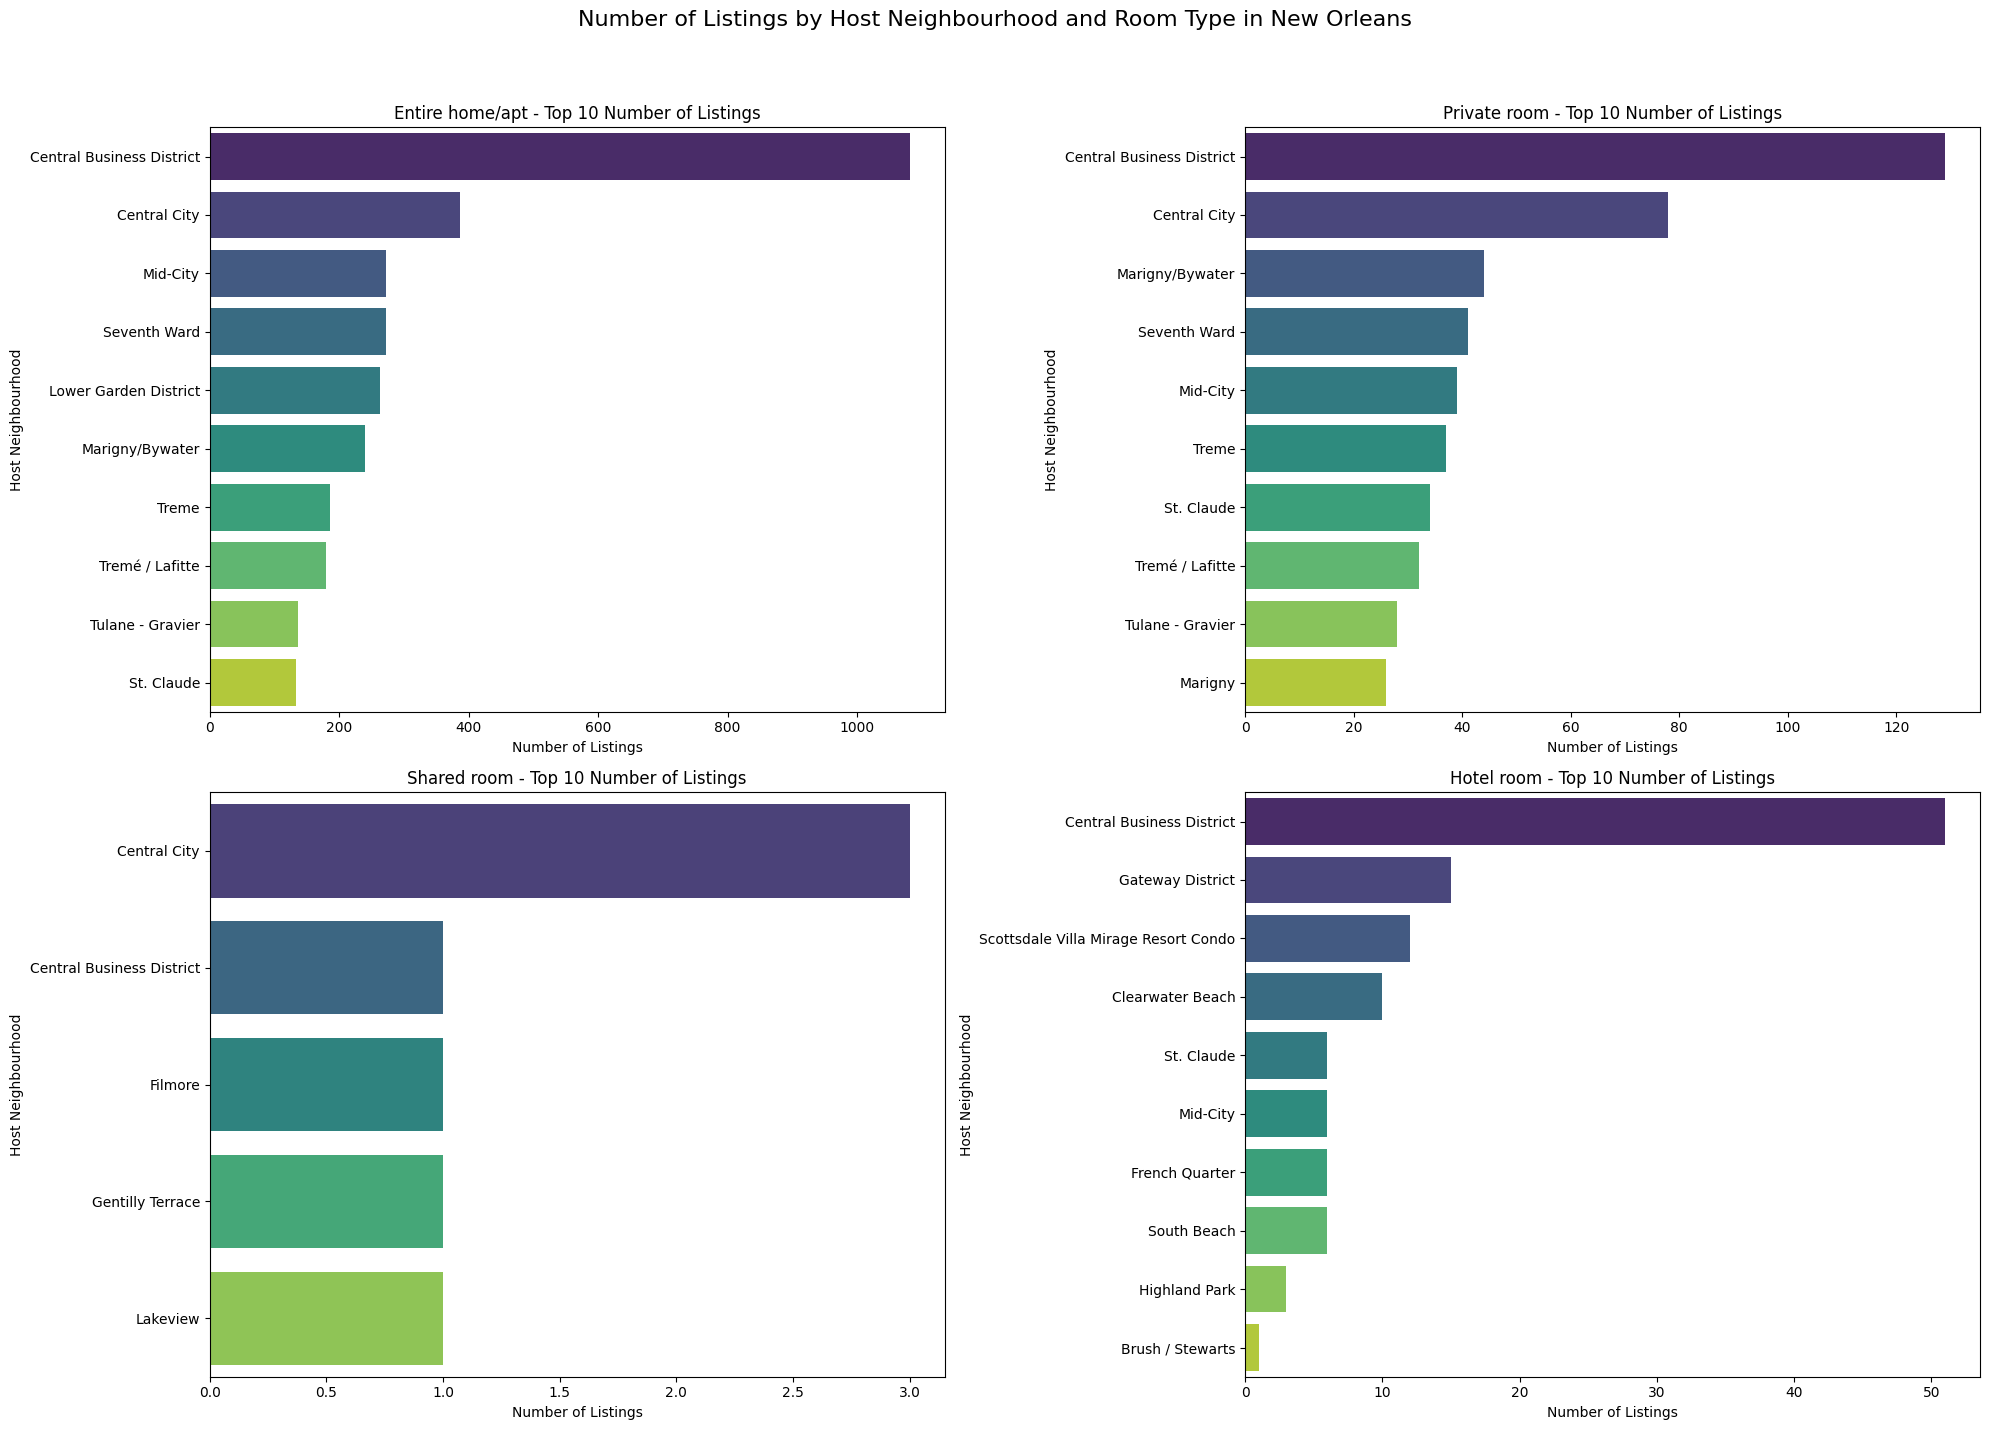

In [883]:
# Chart - 3 visualization code

fig, axes = plt.subplots(2, 2, figsize = (20, 15))
fig.suptitle('Number of Listings by Host Neighbourhood and Room Type in New Orleans', fontsize = 16)

# Entire home/apt
sns.barplot(ax = axes[0, 0], x = 'Number of Listings', y = 'host_neighbourhood', data = anb_df_nwor_1_ngb_apt_listcnt.head(10), hue = 'host_neighbourhood', palette = 'viridis')
axes[0, 0].set_title('Entire home/apt - Top 10 Number of Listings')
axes[0, 0].set_xlabel('Number of Listings')
axes[0, 0].set_ylabel('Host Neighbourhood')

# Private room
sns.barplot(ax = axes[0, 1], x = 'Number of Listings', y = 'host_neighbourhood', data = anb_df_nwor_1_ngb_pvt_listcnt.head(10), hue = 'host_neighbourhood', palette = 'viridis')
axes[0, 1].set_title('Private room - Top 10 Number of Listings')
axes[0, 1].set_xlabel('Number of Listings')
axes[0, 1].set_ylabel('Host Neighbourhood')

# Shared room
sns.barplot(ax = axes[1, 0], x = 'Number of Listings', y = 'host_neighbourhood', data = anb_df_nwor_1_ngb_shr_listcnt.head(10), hue = 'host_neighbourhood', palette = 'viridis')
axes[1, 0].set_title('Shared room - Top 10 Number of Listings')
axes[1, 0].set_xlabel('Number of Listings')
axes[1, 0].set_ylabel('Host Neighbourhood')

# Hotel room
sns.barplot(ax = axes[1, 1], x = 'Number of Listings', y = 'host_neighbourhood', data = anb_df_nwor_1_ngb_hot_listcnt.head(10), hue = 'host_neighbourhood', palette = 'viridis')
axes[1, 1].set_title('Hotel room - Top 10 Number of Listings')
axes[1, 1].set_xlabel('Number of Listings')
axes[1, 1].set_ylabel('Host Neighbourhood')

# Adjusting layout to prevent title overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

##### 1. Why did you pick the specific chart?

A Bar Chart displays categorical data with rectangular bars. It helps compare different groups by showing the frequency or value of each category, making trends and differences easy to identify.

##### 2. What is/are the insight(s) found from the chart?

Entire home/apt:- Central Business District neighbourhood has near 1000 listings, rest are below it.

Private room:- Central Business District has over 120 listings, rest are barely upto 80.

Shared room:- Central City has 3 listings rest are all 1 or none.

Hotel room:- Central Business District over 50, rest are all 15 or below.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this will create a Positive Business Impact.

Because, Hosts now know where are the places with high amount of listings, which indicate to Opportunities or Market Saturation.

#### Chart - 4 - Pie Chart - Share of Property Types in New Orleans

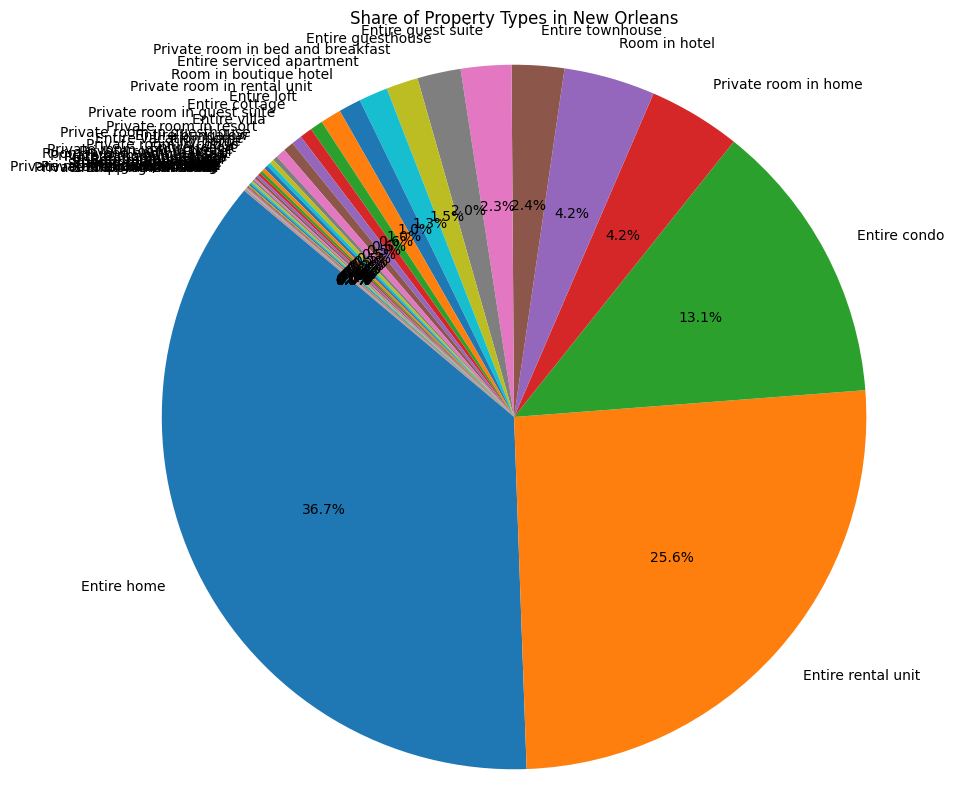

In [884]:
# Chart - 4 visualization code

plt.figure(figsize = (10, 10))
plt.pie(anb_df_nwor_1_propt_pop['Count'], labels = anb_df_nwor_1_propt_pop['property_type'], autopct = '%1.1f%%', startangle = 140)
plt.title('Share of Property Types in New Orleans')
plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

A Pie Chart shows proportions of a whole by dividing a circle into slices. Each slice represents a category's contribution, allowing quick visual comparison of parts to the total.

##### 2. What is/are the insight(s) found from the chart?

More than 36% is the Entire home property type, follwed by Entire rental unit at 25.4%, follwed by Entire condo at 13.4% and all the others with lesser and lesser portions. this, shows the dominance of the Entire rental unit property type in New Orleans.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this will create a Positive Business Impact.

Because, Hosts now know which are the dominant property types, with high amount of listings, which indicate to Opportunities or Market Saturation.

#### Chart - 5 - Pie Chart - Share of Room Types in New Orleans

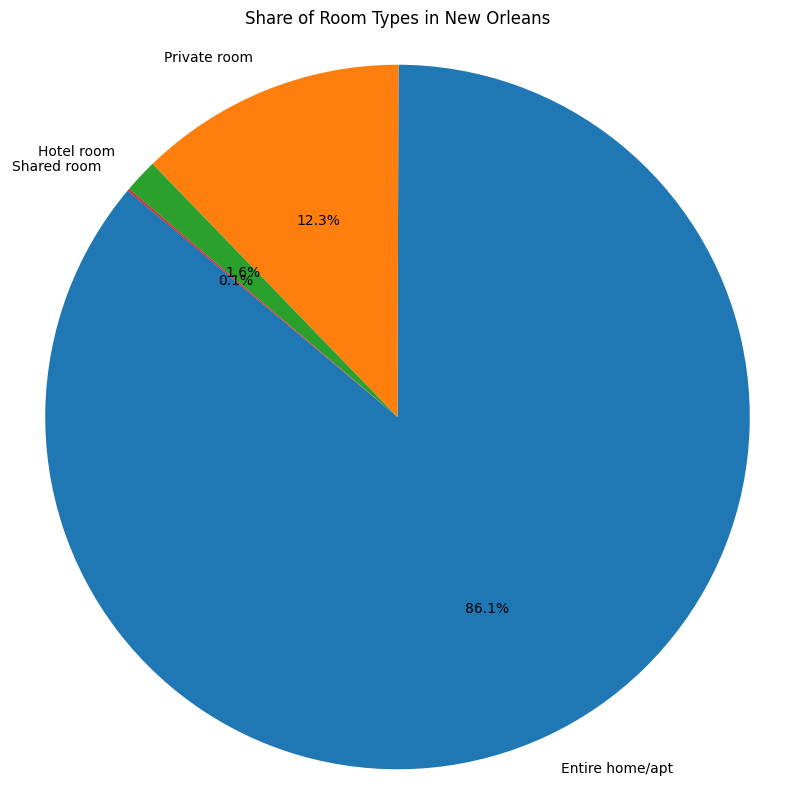

In [885]:
# Chart - 5 visualization code

plt.figure(figsize = (10, 10))
plt.pie(anb_df_nwor_1_rmt_pop['Count'], labels = anb_df_nwor_1_rmt_pop['room_type'], autopct = '%1.1f%%', startangle = 140)
plt.title('Share of Room Types in New Orleans')
plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

A Pie Chart shows proportions of a whole by dividing a circle into slices. Each slice represents a category's contribution, allowing quick visual comparison of parts to the total.

##### 2. What is/are the insight(s) found from the chart?

Over 85% Entire home/apt room type is there, follwed by Private room at 12% and the Hotel room at 1.6% and Shared room at 0.1%. We can see clearly which is the dominant room type.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this will create a Positive Business Impact.

Because, Hosts now know which are the dominant room types, with high amount of listings, which indicate to Opportunities or Market Saturation.

#### Chart - 6 - Bubble Chart - Price vs Location by Room Type in New Orleans

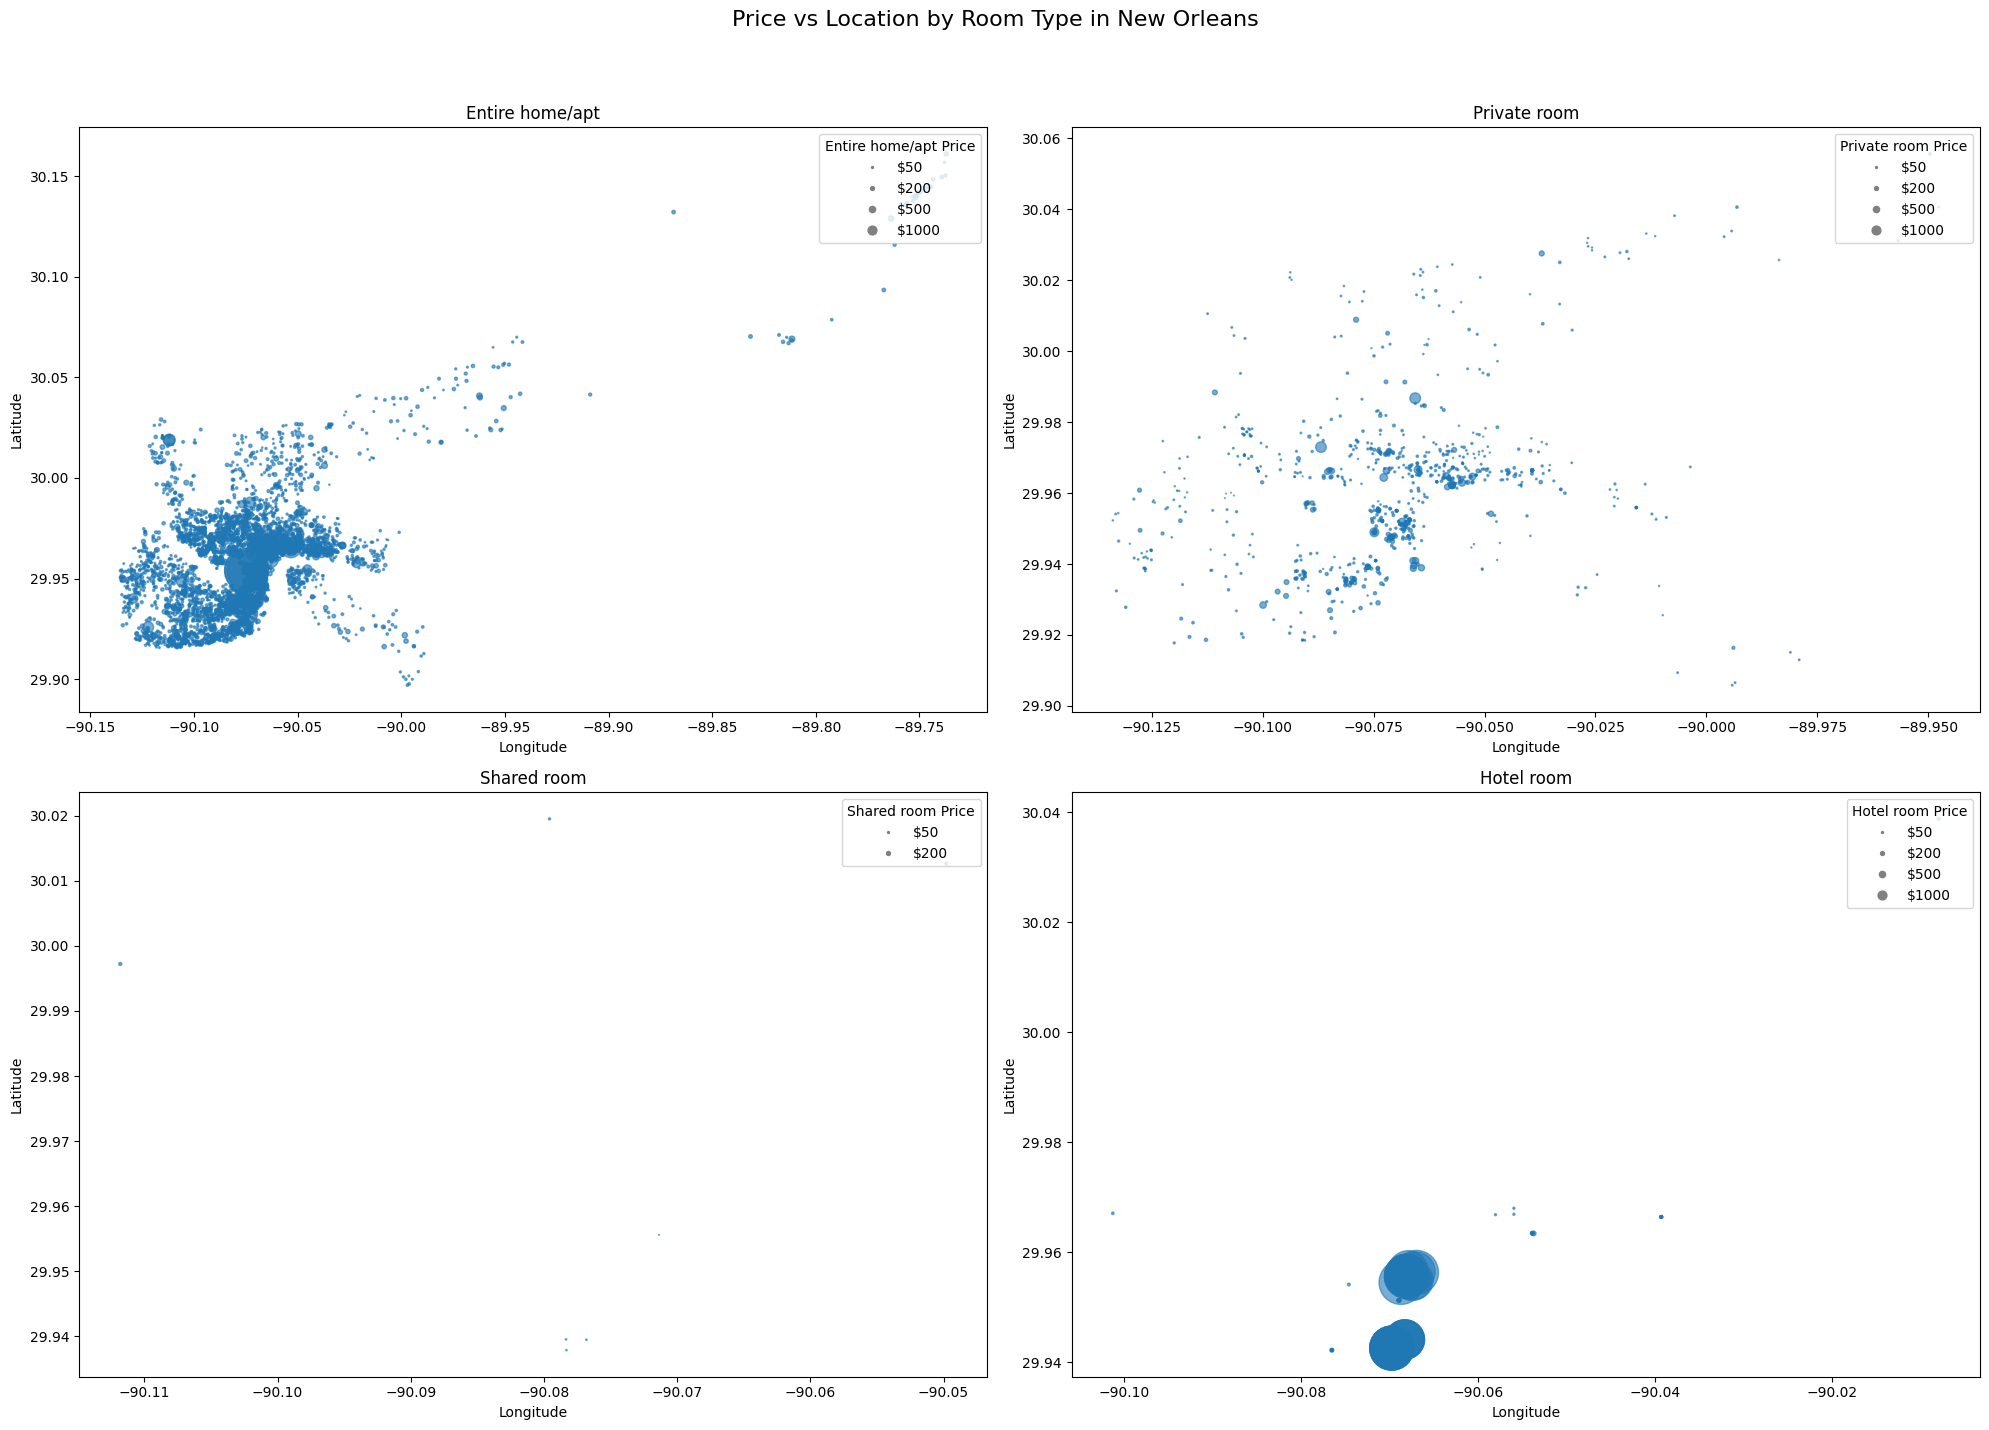

In [886]:
# Chart - 6 visualization code

# Filtering data for each room type
entire_home_apt_df = anb_df_nwor_1_rmt_loc_price[anb_df_nwor_1_rmt_loc_price['room_type'] == 'Entire home/apt']
private_room_df = anb_df_nwor_1_rmt_loc_price[anb_df_nwor_1_rmt_loc_price['room_type'] == 'Private room']
shared_room_df = anb_df_nwor_1_rmt_loc_price[anb_df_nwor_1_rmt_loc_price['room_type'] == 'Shared room']
hotel_room_df = anb_df_nwor_1_rmt_loc_price[anb_df_nwor_1_rmt_loc_price['room_type'] == 'Hotel room']

# Creating bubble charts as subplots using matplotlib
fig, axes = plt.subplots(2, 2, figsize = (20, 15))
fig.suptitle('Price vs Location by Room Type in New Orleans', fontsize = 16)

# Defining a scaling factor for bubble size (adjust as needed)
size_scale = 50

# Function to add bubble size legend
def add_size_legend(ax, prices, size_scale, label):

    legend_elements = []

    # Choosing some representative prices for the legend
    representative_prices = [50, 200, 500, 1000]

    for price in representative_prices:

        if price <= prices.max():

            legend_elements.append(plt.Line2D([0], [0], marker = 'o', color = 'gray', label =f'${price:.0f}', markersize = np.sqrt(price/size_scale * 2), linestyle = ''))

    if legend_elements:

        ax.legend(handles = legend_elements, title = f'{label} Price', loc = 'upper right')


# Entire home/apt
scatter00 = axes[0, 0].scatter(entire_home_apt_df['longitude'], entire_home_apt_df['latitude'], s = entire_home_apt_df['price'] / size_scale, alpha = 0.6)
axes[0, 0].set_title('Entire home/apt')
axes[0, 0].set_xlabel('Longitude')
axes[0, 0].set_ylabel('Latitude')
add_size_legend(axes[0, 0], entire_home_apt_df['price'], size_scale, 'Entire home/apt')


# Private room
scatter01 = axes[0, 1].scatter(private_room_df['longitude'], private_room_df['latitude'], s = private_room_df['price'] / size_scale, alpha = 0.6)
axes[0, 1].set_title('Private room')
axes[0, 1].set_xlabel('Longitude')
axes[0, 1].set_ylabel('Latitude')
add_size_legend(axes[0, 1], private_room_df['price'], size_scale, 'Private room')


# Shared room
scatter10 = axes[1, 0].scatter(shared_room_df['longitude'], shared_room_df['latitude'], s = shared_room_df['price'] / size_scale, alpha = 0.6)
axes[1, 0].set_title('Shared room')
axes[1, 0].set_xlabel('Longitude')
axes[1, 0].set_ylabel('Latitude')
add_size_legend(axes[1, 0], shared_room_df['price'], size_scale, 'Shared room')


# Hotel room
scatter11 = axes[1, 1].scatter(hotel_room_df['longitude'], hotel_room_df['latitude'], s = hotel_room_df['price'] / size_scale, alpha = 0.6)
axes[1, 1].set_title('Hotel room')
axes[1, 1].set_xlabel('Longitude')
axes[1, 1].set_ylabel('Latitude')
add_size_legend(axes[1, 1], hotel_room_df['price'], size_scale, 'Hotel room')


# Adjusting layout to prevent title overlap
plt.tight_layout(rect = [0, 0.03, 1, 0.95])
plt.show()

##### 1. Why did you pick the specific chart?

A Bubble Chart visualizes three dimensions of data, using the x and y axes for two variables and bubble size for a third. It helps illustrate complex relationships in data.

##### 2. What is/are the insight(s) found from the chart?

Entire home/apt:- Typically Spread out around the city's south west, with most listings at upto 1000 as their price, at around the centre we have a bubble with a significantly high price.

Private room:- With significantly lower density as compared to the spread of the Entire home/apt, they are still spread all throughout the city, with typical maximum price ranging at 1000.

Shared room:- Very few in number, because they barely exist.

Hotel room:- Few in number but mostly concentrated at the south portion of the city with maximum price at significantly above 1000.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this will create a Positive Business Impact.

Because, Hosts now know which are the saturated geographical zones and what are the prevailing prices in those locations, also how they vary geospatially because of the mapping of latiudes and longitudes with location prices reflected with the size of the marker as a bubble.

#### Chart - 7 - Box Plot - Price Distribution by Property Type in New Orleans

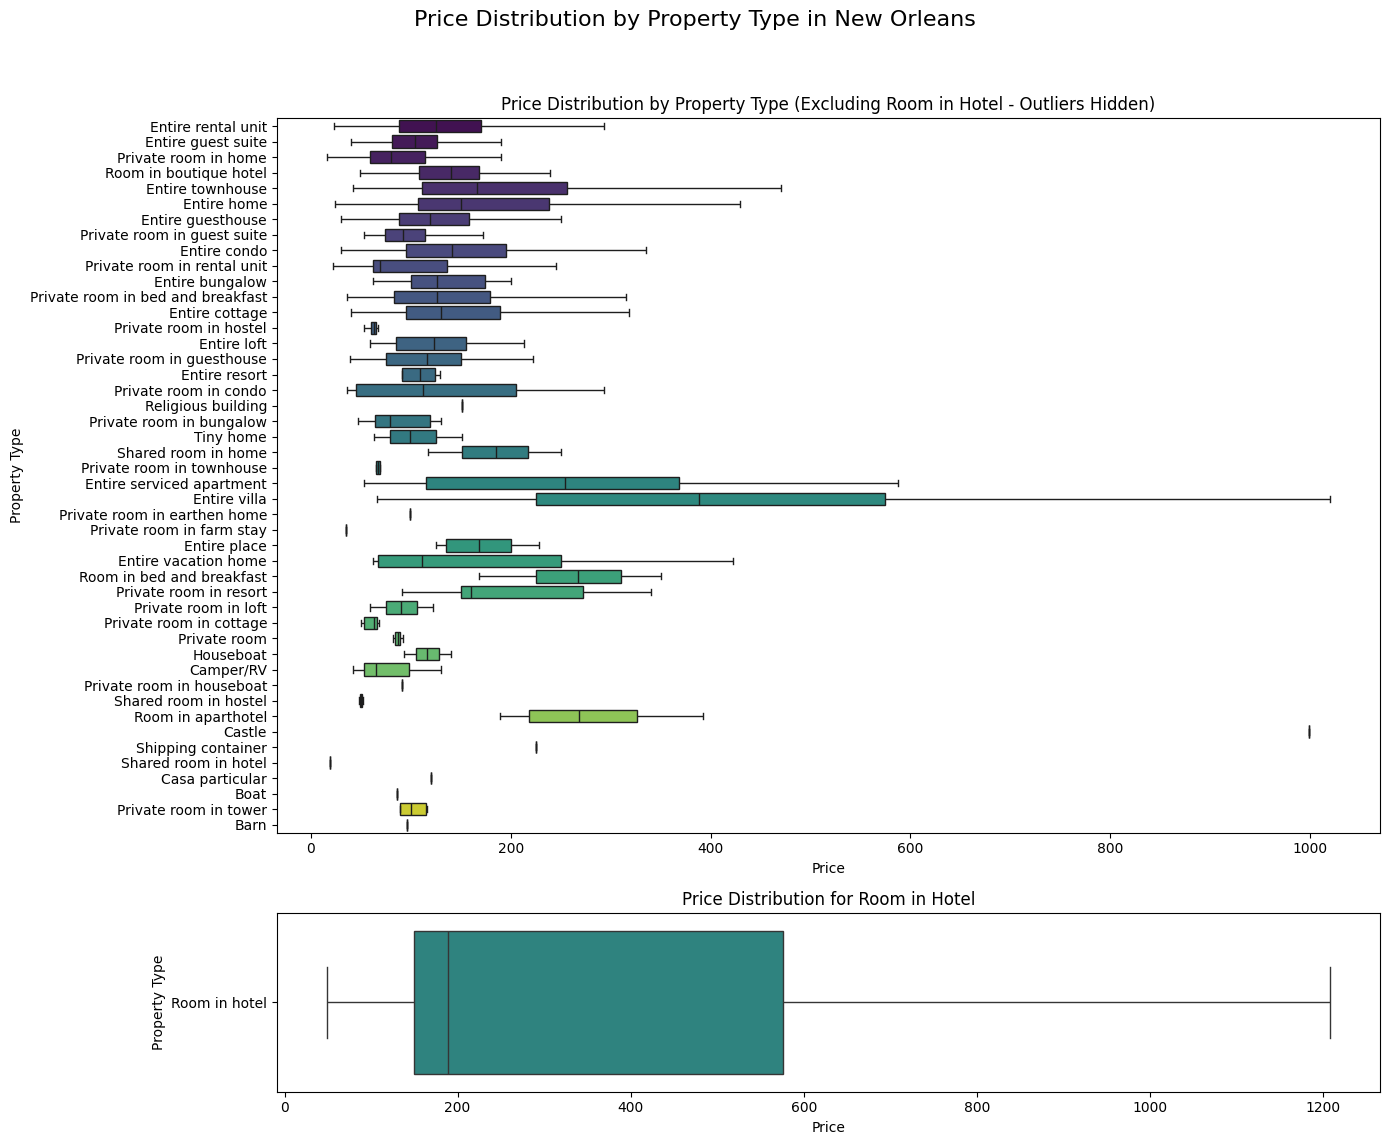

In [887]:
# Chart - 7 visualization code

# Filtering data for 'Room in hotel' and other property types
hotel_room_property_df = anb_df_nwor_1_propt_price[anb_df_nwor_1_propt_price['property_type'] == 'Room in hotel']
other_property_types_df = anb_df_nwor_1_propt_price[anb_df_nwor_1_propt_price['property_type'] != 'Room in hotel']

fig, axes = plt.subplots(2, 1, figsize = (14, 12), gridspec_kw = {'height_ratios': [4, 1]})
fig.suptitle('Price Distribution by Property Type in New Orleans', fontsize = 16)

# Box plot for other property types (excluding 'Room in hotel'), hiding outliers
sns.boxplot(ax = axes[0], x = 'price', y = 'property_type', data = other_property_types_df, hue = 'property_type', palette = 'viridis', showfliers = False)
axes[0].set_title('Price Distribution by Property Type (Excluding Room in Hotel - Outliers Hidden)')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Property Type')

# Box plot for 'Room in hotel' separately
sns.boxplot(ax = axes[1], x = 'price', y = 'property_type', data = hotel_room_property_df, hue = 'property_type', palette = 'viridis', showfliers = False)
axes[1].set_title('Price Distribution for Room in Hotel')
axes[1].set_xlabel('Price')
axes[1].set_ylabel('Property Type')

# Adjusting layout to prevent title overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

##### 1. Why did you pick the specific chart?

A Box Plot summarizes data distribution through quartiles. It shows median, range, and outliers, enabling easy understanding of data spread and identifying potential anomalies in the dataset.

##### 2. What is/are the insight(s) found from the chart?

With the Median price at 1000 for Castle property type, it is the highest and with price at less than 50 at Shared room in hotel property type, it the lowest. The maximum prices are seen with Room in hotel property type, with maximum going upto 1200.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this will create a Positive Business Impact.

Because, Hosts now know how can they offer the prices of the property types they are trying to offer, and how to optimise the prices of their existing listings.

#### Chart - 8 - Scatter Plot - Price vs Number of Reviews by Room Type in New Orleans

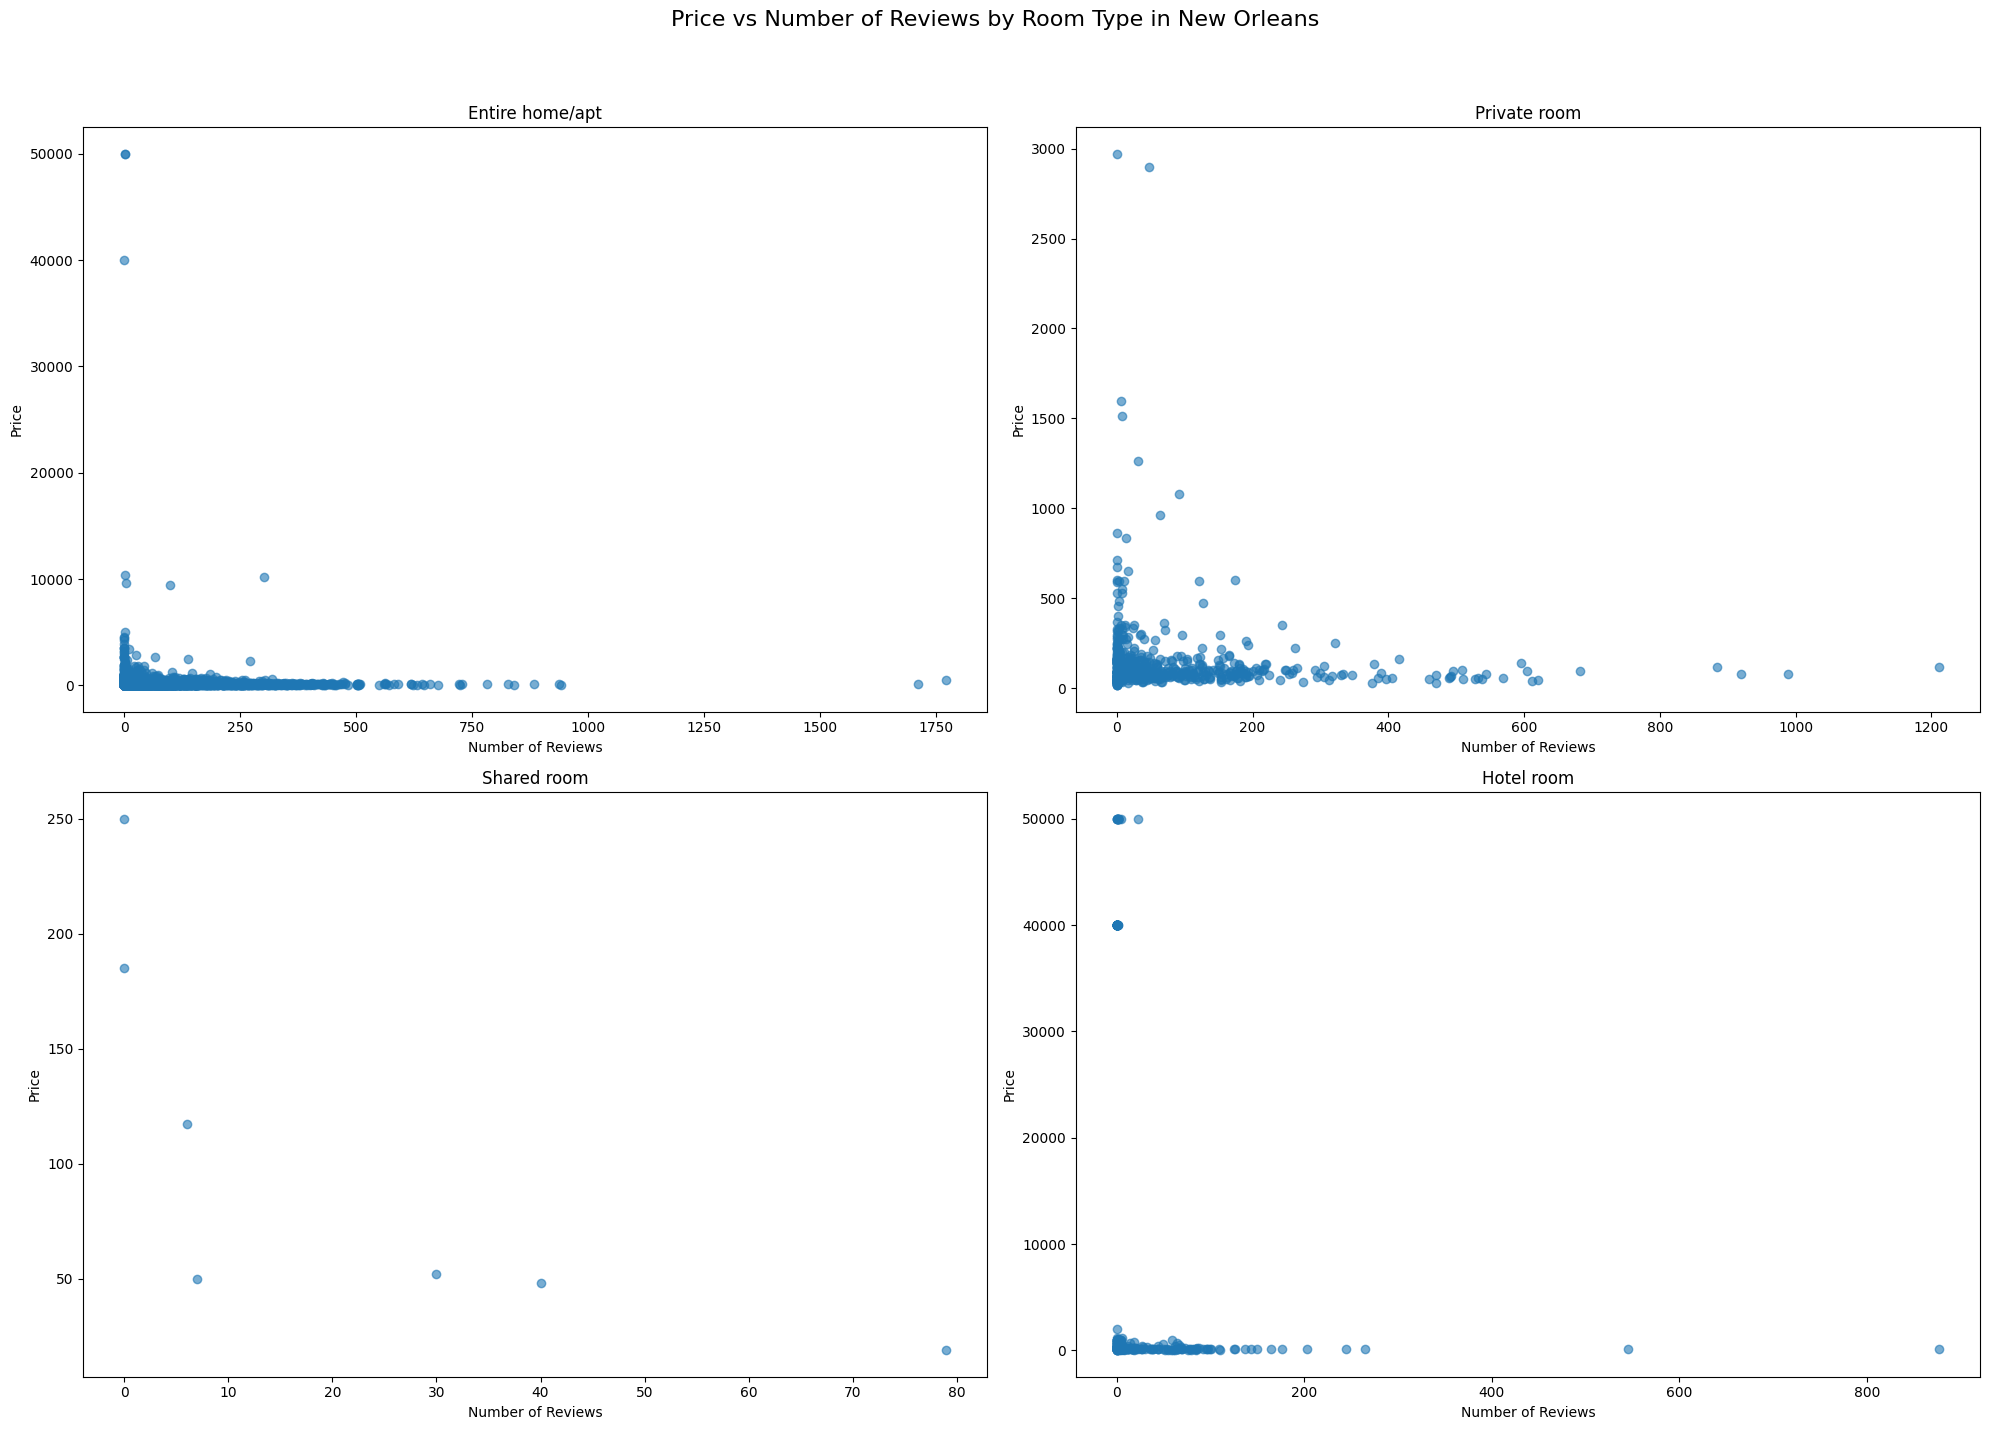

In [888]:
# Chart - 8 visualization code

# Filtering data for each room type
entire_home_apt_revs_price = anb_df_nwor_1_rmt_revs_price[anb_df_nwor_1_rmt_revs_price['property_type'].str.contains('Entire home/apt|Entire home|Entire condo|Entire rental unit|Entire serviced apartment|Entire guest suite|Entire loft|Entire townhouse|Entire bungalow|Entire vacation home|Entire villa|Entire cottage|Entire place', case = False, na = False)]
private_room_revs_price = anb_df_nwor_1_rmt_revs_price[anb_df_nwor_1_rmt_revs_price['property_type'].str.contains('Private room', case = False, na = False)]
shared_room_revs_price = anb_df_nwor_1_rmt_revs_price[anb_df_nwor_1_rmt_revs_price['property_type'].str.contains('Shared room', case = False, na = False)]
hotel_room_revs_price = anb_df_nwor_1_rmt_revs_price[anb_df_nwor_1_rmt_revs_price['property_type'].str.contains('Hotel room|Room in hotel|Room in boutique hotel|Room in aparthotel', case = False, na = False)]

fig, axes = plt.subplots(2, 2, figsize = (20, 15))
fig.suptitle('Price vs Number of Reviews by Room Type in New Orleans', fontsize = 16)

# Entire home/apt
axes[0, 0].scatter(entire_home_apt_revs_price['number_of_reviews'], entire_home_apt_revs_price['price'], alpha = 0.6)
axes[0, 0].set_title('Entire home/apt')
axes[0, 0].set_xlabel('Number of Reviews')
axes[0, 0].set_ylabel('Price')

# Private room
axes[0, 1].scatter(private_room_revs_price['number_of_reviews'], private_room_revs_price['price'], alpha = 0.6)
axes[0, 1].set_title('Private room')
axes[0, 1].set_xlabel('Number of Reviews')
axes[0, 1].set_ylabel('Price')

# Shared room
axes[1, 0].scatter(shared_room_revs_price['number_of_reviews'], shared_room_revs_price['price'], alpha = 0.6)
axes[1, 0].set_title('Shared room')
axes[1, 0].set_xlabel('Number of Reviews')
axes[1, 0].set_ylabel('Price')

# Hotel room
axes[1, 1].scatter(hotel_room_revs_price['number_of_reviews'], hotel_room_revs_price['price'], alpha = 0.6)
axes[1, 1].set_title('Hotel room')
axes[1, 1].set_xlabel('Number of Reviews')
axes[1, 1].set_ylabel('Price')

# Adjusting layout to prevent title overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

##### 1. Why did you pick the specific chart?

A Scatter Plot displays individual data points on a two-axis grid, showing relationships between variables. It helps visualize correlations, trends, and data distributions, allowing outliers to be easily identified.

##### 2. What is/are the insight(s) found from the chart?

In all the room types we can clearly see that lower the prices mean higher number of reviews, indicating the price sensitive footfall in general.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this will create a Positive Business Impact.

Because, Hosts now know how to optimise their prices to attract more customers, and with more customers they will have more reviews and they can better manage and expand their businesses accordingly.

#### Chart - 9 - Correlation Heatmap - Numeric Variables for Normal Hosts in New Orleans

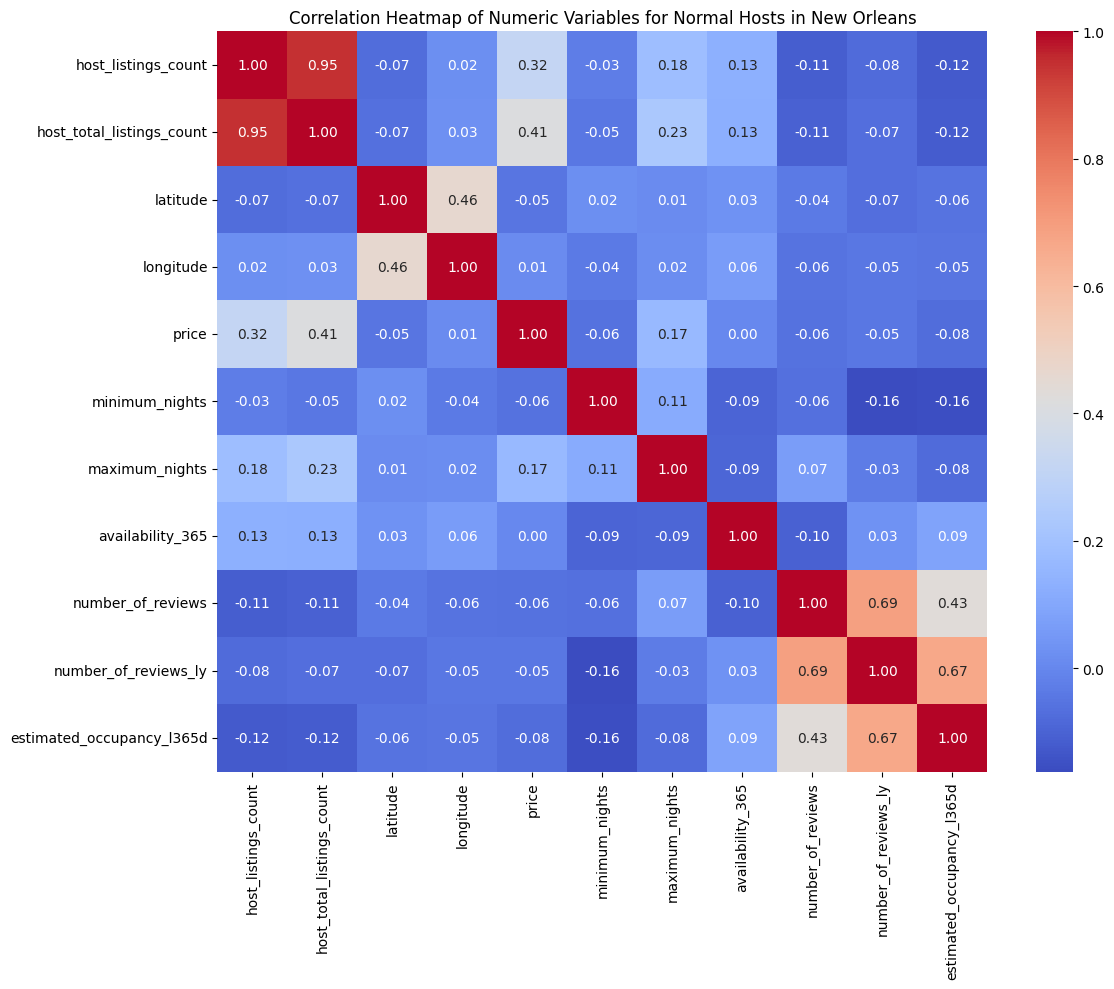

In [889]:
# Chart - 9 visualization code

# Selecting only numeric columns, excluding 'id' and 'host_id'
numeric_cols_norm_host = anb_df_nwor_1_norm_host.select_dtypes(include = np.number).drop(columns = ['id', 'host_id'], errors = 'ignore')

# Calculating the correlation matrix
correlation_matrix = numeric_cols_norm_host.corr()

plt.figure(figsize = (12, 10))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title('Correlation Heatmap of Numeric Variables for Normal Hosts in New Orleans')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A Correlation Heatmap visualizes relationships between multiple variables using color scales. It quickly identifies positive, negative, or no correlation, aiding in understanding the strength and direction of connections.

##### 2. What is/are the insight(s) found from the chart?

Among the Normal Hosts,

The Maximum Positive Correaltion is between host_listings_count and total_host_listings_count at 0.95, follwed by large positives in number_of_reviews_ly and number_of_reviews at 0.69, number_of_reviews_ly and estimated_occupancy_l365d at 0.67 and number_of_reviews and estimated_occupancy_l365d at 0.43.

The Maximum Negative Correlation is between minimum_nights and number_of_reviews_ly at -0.18, with other being lesser and lesser negatives.

The price and number_of_reviews have small negative correlation at -0.06.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this will create a Positive Business Impact.

Because, Hosts now know how to optimise their businesses by looking at how the participating variables are correlated to each other.

#### Chart - 10 - Correlation Heatmap - Numeric Variables for Super Hosts in New Orleans

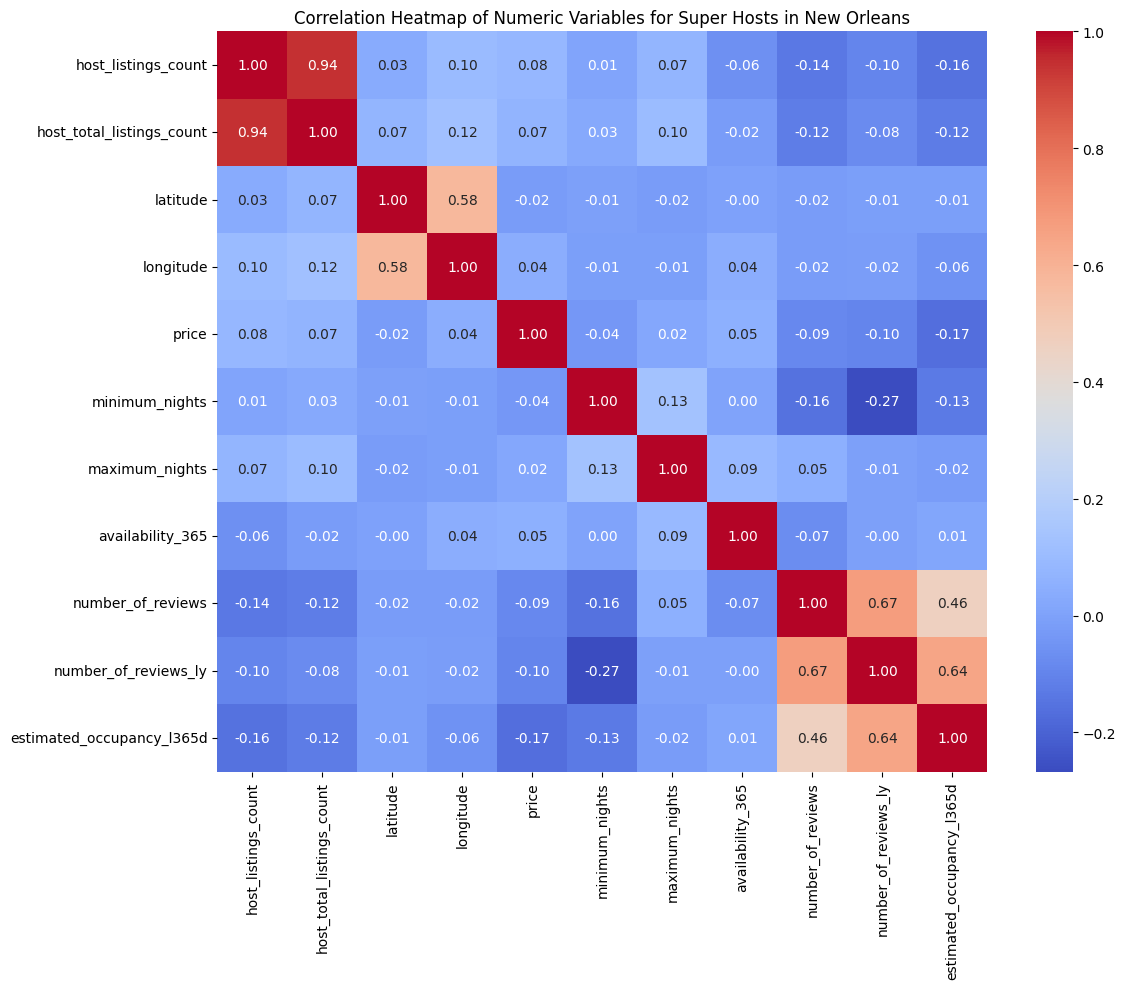

In [890]:
# Chart - 10 visualization code

# Selecting only numeric columns, excluding 'id' and 'host_id'
numeric_cols_sup_host = anb_df_nwor_1_sup_host.select_dtypes(include = np.number).drop(columns = ['id', 'host_id'], errors = 'ignore')

# Calculating the correlation matrix
correlation_matrix = numeric_cols_sup_host.corr()

plt.figure(figsize = (12, 10))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title('Correlation Heatmap of Numeric Variables for Super Hosts in New Orleans')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A Correlation Heatmap visualizes relationships between multiple variables using color scales. It quickly identifies positive, negative, or no correlation, aiding in understanding the strength and direction of connections.

##### 2. What is/are the insight(s) found from the chart?

Among the Super Hosts,

The Maximum Positive Correaltion is between host_listings_count and total_host_listings_count at 0.94, follwed by large positives in number_of_reviews_ly and number_of_reviews at 0.67, number_of_reviews_ly and estimated_occupancy_l365d at 0.64 and number_of_reviews and estimated_occupancy_l365d at 0.46.

The Maximum Negative Correlation is between minimum_nights and number_of_reviews_ly at -0.27, with other being lesser and lesser negatives.

The price and number_of_reviews have small negative correlation at -0.09.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this will create a Positive Business Impact.

Because, Super Hosts now know how to optimise their businesses by looking at how the participating variables are correlated to each other.

## **6. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Here are targeted **solutions for each business objective** based on the insights from the Chicago and New Orleans Airbnb analysis:


**Objective 1:** Popular neighbourhoods, average prices, and number of listings

**Solution:**

a) **Chicago:** Focus on Cambridge and other high-demand neighbourhoods by creating premium listings with competitive pricing to attract sustained bookings. For less popular neighbourhoods, implement targeted marketing campaigns and discounts to draw traffic.

b) **New Orleans:** Leverage the dominance of the Central Business District by optimising property presentation (high-quality photos, amenities) and using dynamic pricing to stay competitive. Promote lesser-known areas to reduce dependency on a single district and tap into untapped demand.


**Objective 2:** Percent share of different property types and room types

**Solution:**

a) With **Entire homes/apartments** dominating both markets, hosts should differentiate by offering unique stays (e.g., themed apartments, heritage homes) and targeting underrepresented property types such as boutique hotel rooms or shared accommodations.

b) For cities with a high concentration in a single property type, create tailored promotional strategies for rarer room types to appeal to budget travellers and solo visitors.


**Objective 3:** Pricing variation with location, property type, and reviews

**Solution:**

a) Implement **location-based dynamic pricing**: high-demand zones can sustain premium pricing, while lower-demand zones can benefit from seasonal discounts and special offers.

b) Use review-driven pricing adjustments: listings with higher reviews can justify a modest price increase; low-review properties should be priced competitively until reputation builds.

c) In high-priced zones (e.g., Gilchrist in Chicago, Kernar in New Orleans), offer value-add services (free breakfast, guided tours) to justify pricing and attract bookings.


**Objective 4:** Correlation between host type (normal vs. superhost) and factors like reviews & price

**Solution:**

a) **Normal hosts:** Focus on optimising review counts by delivering excellent customer service, offering welcome gifts, and ensuring accurate listing descriptions. Lower initial prices can help boost early reviews and booking frequency.

b) **Superhosts:** Capitalise on reputation by slightly increasing prices while maintaining high service standards. Introduce loyalty offers for repeat guests to encourage brand-like trust.

c) Both host types should reduce minimum night requirements if correlations indicate it negatively affects bookings, especially in competitive zones.


**Overall Strategic Recommendations:**

**For both cities:**

a) Use Power BI dashboard continuously to monitor occupancy trends, seasonal demand shifts, and price competitiveness.

b) Segment marketing strategies based on neighbourhood demand and property type saturation.

c) Test promotional campaigns in underperforming areas to capture market share without competing head-to-head in oversaturated zones.


# **Conclusion**

Following this Analysis and Recommendations, Hosts will be able to better enter the Air bnb Market and better manage their Businesses, increasing their profits and expansion.